<a href="https://colab.research.google.com/github/szeyu/UMDatathon-24/blob/main/improved_of_Datathon_2024_HMIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
print(sklearn.__version__)

1.6.0


In [3]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 42.5 MB/s eta 0:00:00


`ctrl + M + .` to restart runtime

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

# Blockchain Metrics

## Mining Metrics
- **difficulty**  
  The mean difficulty of mining a new block on the blockchain.

- **blockreward**  
  The sum of block rewards (including mining or staking rewards and transaction fees).

- **blockreward_usd**  
  The sum of block rewards (including mining or staking rewards and transaction fees) in USD.

- **fees_transaction_mean**  
  The mean fees per transaction that are paid from executing transactions.

- **fees_transaction_mean_usd**  
  The mean fees per transaction that are paid from executing transactions in USD.

- **fees_transaction_median**  
  The median fees per transaction that are paid from executing transactions.

- **fees_transaction_median_usd**  
  The median fees per transaction that are paid from executing transactions in USD.

## Address Metrics
- **addresses_count_active**  
  The number of unique addresses active on the blockchain (sender or receiver) in a given window.

- **addresses_count_sender**  
  The number of addresses that were active as a sender.

- **addresses_count_receiver**  
  The number of addresses that were active as a receiver.

- **addresses_count_inflow**  
  The number of addresses involved in inflow transactions of BTC into mining pool wallets.

- **addresses_count_outflow**  
  The number of addresses involved in outflow transactions of BTC into mining pool wallets.

## Exchange Metrics
- **estimated_leverage_ratio**  
  The exchange's open interest divided by their coins reserve, showing average leverage used by users. An increase indicates higher leverage risk.

- **exchange_whale_ratio**  
  The relative size of the top 10 inflows to total inflows, revealing which exchanges whales use.

- **coinbase_premium_gap**  
  The gap between Coinbase price (BTCUSD) and Binance price (BTCUSDT). A higher premium indicates stronger spot buying pressure on Coinbase.

- **coinbase_premium_index**  
  The percent difference between Binance price (BTCUSDT) and Coinbase price (BTCUSD).

- **coinbase_premium_gap_usdt_adjusted**  
  The coinbase_premium_gap adjusted for USDT-specific liquidity or exchange rate factors.

- **coinbase_premium_index_usdt_adjusted**  
  The coinbase_premium_index adjusted for USDT-specific liquidity or exchange rate factors, expressed as a percentage.

- **exchange_supply_ratio**  
  The ratio of an exchange's BTC reserve compared to the total supply of BTC.

## Transaction Metrics
- **transactions_count_inflow**  
  The number of transactions flowing into Bitcoin miners.

- **transactions_count_outflow**  
  The number of transactions flowing out of Bitcoin miners.

- **transactions_count_inflow.1**  
  The number of transactions flowing into Bitcoin exchanges.

- **transactions_count_outflow.1**  
  The number of transactions flowing out of Bitcoin exchanges.

- **tokens_transferred_total**  
  The total number of tokens transferred (transaction volume).

- **tokens_transferred_mean**  
  The mean number of transferred tokens per transaction.

- **tokens_transferred_median**  
  The median number of tokens transferred per transaction.

## Liquidation Metrics
- **long_liquidations**  
  The sum of forced market orders to exit leveraged long positions caused by price volatility.

- **short_liquidations**  
  The sum of forced market orders to exit leveraged short positions caused by price volatility.

- **long_liquidations_usd**  
  Long liquidations in USD.

- **short_liquidations_usd**  
  Short liquidations in USD.

## Price Metrics
- **open_price**  
  The price of the first trade of the hour.

- **high_price**  
  The highest price of the hour.

- **low_price**  
  The lowest price of the hour.

- **close_price**  
  The price of the last trade of the hour.

- **volume**  
  The total volume of the hour.

## Derivative Metrics
- **open_interest**  
  The total number of outstanding derivative contracts that have not been settled. It measures the flow of money into the futures market.

- **taker_buy_volume**  
  The volume that takers buy.

- **taker_sell_volume**  
  The volume that takers sell.

- **taker_buy_ratio**  
  The ratio of taker_buy_volume divided by taker_total_volume.

- **taker_sell_ratio**  
  The ratio of taker_sell_volume divided by taker_total_volume.

- **taker_buy_sell_ratio**  
  The ratio of taker_buy_volume divided by taker_sell_volume.

## Miner Metrics
- **miner_supply_ratio**  
  The ratio of miner reserve divided by the total supply, measuring the proportion of tokens reserved by miners relative to the total supply.


In [ ]:
df = pd.read_csv('UM_datathon_2024.csv')
df.head()

time    difficulty  estimated_leverage_ratio  \
0  2020-03-25 10:00:00  1.655292e+13                  0.070577   
1  2020-03-25 11:00:00  1.655292e+13                  0.071966   
2  2020-03-25 12:00:00  1.655292e+13                  0.072686   
3  2020-03-25 13:00:00           NaN                  0.070549   
4  2020-03-25 14:00:00  1.655292e+13                  0.071959   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                   30656                   12888                     21617   
1                   21379                    8467                     14875   
2                   29164                   13292                     19201   
3                       0                       0                         0   
4                   25234                   10221                     18363   

   exchange_whale_ratio  coinbase_premium_gap  coinbase_premium_index  \
0              0.940847                 12.50                0.189479   
1              0.885981                 18.64                0.285830   
2              0.884669                 17.17                0.260595   
3              0.000000                 16.12                0.245213   
4              0.867330                 14.46                0.218125   

   coinbase_premium_gap_usdt_adjusted  ...  long_liquidations  \
0                            1.125713  ...            425.717   
1                            2.369076  ...            385.434   
2                            7.388429  ...              6.060   
3                            4.339870  ...            106.667   
4                           -2.762051  ...            124.720   

   short_liquidations  long_liquidations_usd  short_liquidations_usd  \
0               8.770           2.831061e+06             58055.69835   
1              21.699           2.499324e+06            142518.22527   
2              35.155           3.950575e+04            230609.80208   
3             134.954           7.070354e+05            898106.41361   
4              52.400           8.154464e+05            347108.26236   

   open_price  high_price  low_price  close_price   volume  open_interest  
0      6500.0      6591.5     6500.0       6591.5    0.004   1.198203e+08  
1      6591.5      6628.5     6457.5       6511.5  438.873   1.211306e+08  
2      6511.5      6588.5     6502.0       6583.5  529.318   1.236765e+08  
3      6583.5      6745.5     6562.0       6585.0  449.162   1.197917e+08  
4      6585.0      6640.0     6516.0       6590.0  258.831   1.228579e+08  

[5 rows x 43 columns]

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df.head()

difficulty  estimated_leverage_ratio  \
time                                                          
2020-03-25 10:00:00  1.655292e+13                  0.070577   
2020-03-25 11:00:00  1.655292e+13                  0.071966   
2020-03-25 12:00:00  1.655292e+13                  0.072686   
2020-03-25 13:00:00           NaN                  0.070549   
2020-03-25 14:00:00  1.655292e+13                  0.071959   

                     addresses_count_active  addresses_count_sender  \
time                                                                  
2020-03-25 10:00:00                   30656                   12888   
2020-03-25 11:00:00                   21379                    8467   
2020-03-25 12:00:00                   29164                   13292   
2020-03-25 13:00:00                       0                       0   
2020-03-25 14:00:00                   25234                   10221   

                     addresses_count_receiver  exchange_whale_ratio  \
time                                                                  
2020-03-25 10:00:00                     21617              0.940847   
2020-03-25 11:00:00                     14875              0.885981   
2020-03-25 12:00:00                     19201              0.884669   
2020-03-25 13:00:00                         0              0.000000   
2020-03-25 14:00:00                     18363              0.867330   

                     coinbase_premium_gap  coinbase_premium_index  \
time                                                                
2020-03-25 10:00:00                 12.50                0.189479   
2020-03-25 11:00:00                 18.64                0.285830   
2020-03-25 12:00:00                 17.17                0.260595   
2020-03-25 13:00:00                 16.12                0.245213   
2020-03-25 14:00:00                 14.46                0.218125   

                     coinbase_premium_gap_usdt_adjusted  \
time                                                      
2020-03-25 10:00:00                            1.125713   
2020-03-25 11:00:00                            2.369076   
2020-03-25 12:00:00                            7.388429   
2020-03-25 13:00:00                            4.339870   
2020-03-25 14:00:00                           -2.762051   

                     coinbase_premium_index_usdt_adjusted  ...  \
time                                                       ...   
2020-03-25 10:00:00                              0.017093  ...   
2020-03-25 11:00:00                              0.036419  ...   
2020-03-25 12:00:00                              0.112303  ...   
2020-03-25 13:00:00                              0.066135  ...   
2020-03-25 14:00:00                             -0.041773  ...   

                     long_liquidations  short_liquidations  \
time                                                         
2020-03-25 10:00:00            425.717               8.770   
2020-03-25 11:00:00            385.434              21.699   
2020-03-25 12:00:00              6.060              35.155   
2020-03-25 13:00:00            106.667             134.954   
2020-03-25 14:00:00            124.720              52.400   

                     long_liquidations_usd  short_liquidations_usd  \
time                                                                 
2020-03-25 10:00:00           2.831061e+06             58055.69835   
2020-03-25 11:00:00           2.499324e+06            142518.22527   
2020-03-25 12:00:00           3.950575e+04            230609.80208   
2020-03-25 13:00:00           7.070354e+05            898106.41361   
2020-03-25 14:00:00           8.154464e+05            347108.26236   

                     open_price  high_price  low_price  close_price   volume  \
time                                                                           
2020-03-25 10:00:00      6500.0      6591.5     6500.0       6591.5    0.004   
2020-03-25 11:00:00      6591.5      6628.5     6457.5    

## Data cleaning

Fills null and zero values in all columns of a DataFrame with the average of the preceding and succeeding non-null values.

In [ ]:
# Identify the number of null values in each column
null_counts = df.isnull().sum()

# Identify the number of zero values in each column
zero_counts = (df == 0).sum()

# Combine the results into a single DataFrame for better visualization
missing_zero_df = pd.DataFrame({
    'Null Values': null_counts,
    'Zero Values': zero_counts
})

# Display the result
print(missing_zero_df)

                                      Null Values  Zero Values
difficulty                                     93            0
estimated_leverage_ratio                        0            0
addresses_count_active                          0           93
addresses_count_sender                          0           93
addresses_count_receiver                        0           93
exchange_whale_ratio                            0           93
coinbase_premium_gap                           25           13
coinbase_premium_index                         25           13
coinbase_premium_gap_usdt_adjusted             25            0
coinbase_premium_index_usdt_adjusted           25            0
taker_buy_volume                                5            0
taker_sell_volume                               5            0
taker_buy_ratio                                 5            0
taker_sell_ratio                                5            1
taker_buy_sell_ratio                            6      

In [ ]:
def fill_all_columns_with_interpolation(df):
    """
    Fills null and zero values in all columns of a DataFrame using linear interpolation.
    It handles multiple consecutive missing or zero values by evenly distributing the values.

    Args:
        df: The pandas DataFrame.

    Returns:
        A new DataFrame with the filled values.
    """
    df_filled = df.copy()

    # Replace zeros with NaN to treat them as missing values
    df_filled.replace(0, np.nan, inplace=True)

    # Apply linear interpolation
    df_filled.interpolate(method='linear', inplace=True, limit_direction='both')

    return df_filled

In [ ]:
df = fill_all_columns_with_interpolation(df)

# Verify if there are still missing values
print("Remaining Missing Values:\n", df.isnull().sum().sum())

Remaining Missing Values:
 0


## Export the Cleaned Dataset

In [ ]:
df.tail()

difficulty  estimated_leverage_ratio  \
time                                                          
2023-01-20 16:00:00  3.759045e+13                  0.263559   
2023-01-20 17:00:00  3.759045e+13                  0.267636   
2023-01-20 18:00:00  3.759045e+13                  0.268026   
2023-01-20 19:00:00  3.759045e+13                  0.268435   
2023-01-20 20:00:00  3.759045e+13                  0.247237   

                     addresses_count_active  addresses_count_sender  \
time                                                                  
2023-01-20 16:00:00                 79982.0                 46245.0   
2023-01-20 17:00:00                 63851.0                 32129.0   
2023-01-20 18:00:00                 34639.0                 14913.0   
2023-01-20 19:00:00                 74633.0                 29571.0   
2023-01-20 20:00:00                 92618.0                 58092.0   

                     addresses_count_receiver  exchange_whale_ratio  \
time                                                                  
2023-01-20 16:00:00                   43782.0              0.933271   
2023-01-20 17:00:00                   39914.0              0.889580   
2023-01-20 18:00:00                   23019.0              0.963794   
2023-01-20 19:00:00                   55817.0              0.847646   
2023-01-20 20:00:00                   44773.0              0.797574   

                     coinbase_premium_gap  coinbase_premium_index  \
time                                                                
2023-01-20 16:00:00                  0.67                0.003144   
2023-01-20 17:00:00                  3.27                0.015314   
2023-01-20 18:00:00                  6.59                0.030817   
2023-01-20 19:00:00                  4.31                0.020050   
2023-01-20 20:00:00                 10.64                0.047738   

                     coinbase_premium_gap_usdt_adjusted  \
time                                                      
2023-01-20 16:00:00                           -8.449317   
2023-01-20 17:00:00                            3.549946   
2023-01-20 18:00:00                            6.395401   
2023-01-20 19:00:00                            4.724241   
2023-01-20 20:00:00                           24.460350   

                     coinbase_premium_index_usdt_adjusted  ...  \
time                                                       ...   
2023-01-20 16:00:00                             -0.039660  ...   
2023-01-20 17:00:00                              0.016624  ...   
2023-01-20 18:00:00                              0.029907  ...   
2023-01-20 19:00:00                              0.021976  ...   
2023-01-20 20:00:00                              0.109677  ...   

                     long_liquidations  short_liquidations  \
time                                                         
2023-01-20 16:00:00              2.040              63.902   
2023-01-20 17:00:00              2.644              20.472   
2023-01-20 18:00:00              1.228               9.262   
2023-01-20 19:00:00              0.011              28.794   
2023-01-20 20:00:00              0.011              28.794   

                     long_liquidations_usd  short_liquidations_usd  \
time                                                                 
2023-01-20 16:00:00            43265.94636            1.368190e+06   
2023-01-20 17:00:00            56072.30085            4.392757e+05   
2023-01-20 18:00:00            26072.40350            1.988531e+05   
2023-01-20 19:00:00              244.85635            6.203559e+05   
2023-01-20 20:00:00              244.85635            6.203559e+05   

                     open_price  high_price  low_price  close_price  \
time                                                                  
2023-01-20 16:00:00     21126.0     21407.0    21126.0      21299.5   
2023-01-20 17:00:00     21299.5     21400.0    21259.5      21337.5   
2023-01-20 18:

In [ ]:
# export the df to cleaned_um_datathon_24.csv
df.to_csv('cleaned_um_datathon_24.csv')

## Import the Cleaned Dataset

In [3]:
df = pd.read_csv('cleaned_um_datathon_24.csv')
df.head()

time    difficulty  estimated_leverage_ratio  \
0  2020-03-25 10:00:00  1.655292e+13                  0.070577   
1  2020-03-25 11:00:00  1.655292e+13                  0.071966   
2  2020-03-25 12:00:00  1.655292e+13                  0.072686   
3  2020-03-25 13:00:00  1.655292e+13                  0.070549   
4  2020-03-25 14:00:00  1.655292e+13                  0.071959   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                 30656.0                 12888.0                   21617.0   
1                 21379.0                  8467.0                   14875.0   
2                 29164.0                 13292.0                   19201.0   
3                 27199.0                 11756.5                   18782.0   
4                 25234.0                 10221.0                   18363.0   

   exchange_whale_ratio  coinbase_premium_gap  coinbase_premium_index  \
0              0.940847                 12.50                0.189479   
1              0.885981                 18.64                0.285830   
2              0.884669                 17.17                0.260595   
3              0.876000                 16.12                0.245213   
4              0.867330                 14.46                0.218125   

   coinbase_premium_gap_usdt_adjusted  ...  long_liquidations  \
0                            1.125713  ...            425.717   
1                            2.369076  ...            385.434   
2                            7.388429  ...              6.060   
3                            4.339870  ...            106.667   
4                           -2.762051  ...            124.720   

   short_liquidations  long_liquidations_usd  short_liquidations_usd  \
0               8.770           2.831061e+06             58055.69835   
1              21.699           2.499324e+06            142518.22527   
2              35.155           3.950575e+04            230609.80208   
3             134.954           7.070354e+05            898106.41361   
4              52.400           8.154464e+05            347108.26236   

   open_price  high_price  low_price  close_price   volume  open_interest  
0      6500.0      6591.5     6500.0       6591.5    0.004   1.198203e+08  
1      6591.5      6628.5     6457.5       6511.5  438.873   1.211306e+08  
2      6511.5      6588.5     6502.0       6583.5  529.318   1.236765e+08  
3      6583.5      6745.5     6562.0       6585.0  449.162   1.197917e+08  
4      6585.0      6640.0     6516.0       6590.0  258.831   1.228579e+08  

[5 rows x 43 columns]

# Creating new features for technical indicator

In [4]:
# pnl, price change, average gain, loss, rsi
df['price_change'] = df['close_price'].pct_change() * 100

# position = np.sign(df['close_price'].diff())
# df['position'] = np.sign(df['close_price'].diff())
# df['pnl'] = position.shift(1) * df['close_price'].pct_change()

# default period - 14, 7-short-term, 20-long-term
rsi_period = 14
delta = df['close_price'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(rsi_period).mean()
avg_loss = pd.Series(loss).rolling(rsi_period).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

# Moving Averages
df['SMA_20'] = df['close_price'].rolling(window=20).mean()
df['SMA_50'] = df['close_price'].rolling(window=50).mean()
df['EMA_20'] = df['close_price'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['close_price'].ewm(span=50, adjust=False).mean()

# MACD
df['EMA_12'] = df['close_price'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close_price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
df['Bollinger_Upper'] = df['SMA_20'] + (df['close_price'].rolling(window=20).std() * 2)
df['Bollinger_Lower'] = df['SMA_20'] - (df['close_price'].rolling(window=20).std() * 2)

# Average True Range (ATR)
df['high_low'] = df['high_price'] - df['low_price']
df['high_close_prev'] = abs(df['high_price'] - df['close_price'].shift())
df['low_close_prev'] = abs(df['low_price'] - df['close_price'].shift())
df['TR'] = df[['high_low', 'high_close_prev', 'low_close_prev']].max(axis=1)
df['ATR_14'] = df['TR'].rolling(window=14).mean()

# Volume Weighted Average Price (VWAP)
df['VWAP'] = (df['volume'] * (df['high_price'] + df['low_price'] + df['close_price']) / 3).cumsum() / df['volume'].cumsum()

# On-Balance Volume (OBV)
df['OBV'] = (np.sign(df['price_change']) * df['volume']).cumsum()

# Volatility Features
df['rolling_std_7'] = df['close_price'].rolling(window=7).std()
df['rolling_std_14'] = df['close_price'].rolling(window=14).std()

# Stochastic Oscillator
period = 14
df['lowest_low'] = df['low_price'].rolling(window=period).min()
df['highest_high'] = df['high_price'].rolling(window=period).max()
df['%K'] = ((df['close_price'] - df['lowest_low']) / (df['highest_high'] - df['lowest_low'])) * 100
df['%D'] = df['%K'].rolling(window=3).mean()

# Rate of Change
df['ROC'] = df['close_price'].pct_change(periods=12) * 100  # 12 hours ROC

# Money Flow Index
typical_price = (df['high_price'] + df['low_price'] + df['close_price']) / 3
raw_money_flow = typical_price * df['volume']
positive_flow = pd.Series(np.where(typical_price > typical_price.shift(1), raw_money_flow, 0)).rolling(window=14).sum()
negative_flow = pd.Series(np.where(typical_price < typical_price.shift(1), raw_money_flow, 0)).rolling(window=14).sum()
money_ratio = positive_flow / negative_flow
df['MFI'] = 100 - (100 / (1 + money_ratio))

# Whale Transaction Ratio (using existing features)
df['whale_volume_ratio'] = df['exchange_whale_ratio'] * df['volume']
df['whale_momentum'] = df['whale_volume_ratio'].pct_change() * 100

# Price Momentum (12-hour)
df['momentum'] = df['close_price'] - df['close_price'].shift(12)

df.dropna(inplace=True)

df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time').reset_index(drop=True)
df = df.set_index('time')

# Display the updated dataset with new features
df.head(50)

difficulty  estimated_leverage_ratio  \
time                                                          
2020-03-27 11:00:00  1.391252e+13                  0.079712   
2020-03-27 12:00:00  1.391252e+13                  0.081237   
2020-03-27 13:00:00  1.391252e+13                  0.082605   
2020-03-27 14:00:00  1.391252e+13                  0.083710   
2020-03-27 15:00:00  1.391252e+13                  0.083367   
2020-03-27 16:00:00  1.391252e+13                  0.082579   
2020-03-27 17:00:00  1.391252e+13                  0.083598   
2020-03-27 18:00:00  1.391252e+13                  0.082939   
2020-03-27 19:00:00  1.391252e+13                  0.082379   
2020-03-27 20:00:00  1.391252e+13                  0.081827   
2020-03-27 21:00:00  1.391252e+13                  0.081681   
2020-03-27 22:00:00  1.391252e+13                  0.081415   
2020-03-27 23:00:00  1.391252e+13                  0.079366   
2020-03-28 00:00:00  1.391252e+13                  0.080437   
2020-03-28 01:00:00  1.391252e+13                  0.082256   
2020-03-28 02:00:00  1.391252e+13                  0.083337   
2020-03-28 03:00:00  1.391252e+13                  0.084264   
2020-03-28 04:00:00  1.391252e+13                  0.085236   
2020-03-28 05:00:00  1.391252e+13                  0.084673   
2020-03-28 06:00:00  1.391252e+13                  0.085370   
2020-03-28 07:00:00  1.391252e+13                  0.086326   
2020-03-28 08:00:00  1.391252e+13                  0.088000   
2020-03-28 09:00:00  1.391252e+13                  0.088742   
2020-03-28 10:00:00  1.391252e+13                  0.090293   
2020-03-28 11:00:00  1.391252e+13                  0.091089   
2020-03-28 12:00:00  1.391252e+13                  0.091527   
2020-03-28 13:00:00  1.391252e+13                  0.091691   
2020-03-28 14:00:00  1.391252e+13                  0.092931   
2020-03-28 15:00:00  1.391252e+13                  0.092394   
2020-03-28 16:00:00  1.391252e+13                  0.092047   
2020-03-28 17:00:00  1.391252e+13                  0.090415   
2020-03-28 18:00:00  1.391252e+13                  0.088948   
2020-03-28 19:00:00  1.391252e+13                  0.089770   
2020-03-28 20:00:00  1.391252e+13                  0.090174   
2020-03-28 21:00:00  1.391252e+13                  0.090310   
2020-03-28 22:00:00  1.391252e+13                  0.089083   
2020-03-28 23:00:00  1.391252e+13                  0.089062   
2020-03-29 00:00:00  1.391252e+13                  0.088596   
2020-03-29 01:00:00  1.391252e+13                  0.088346   
2020-03-29 02:00:00  1.391252e+13                  0.088470   
2020-03-29 03:00:00  1.391252e+13                  0.089050   
2020-03-29 04:00:00  1.391252e+13                  0.089523   
2020-03-29 05:00:00  1.391252e+13                  0.089400   
2020-03-29 06:00:00  1.391252e+13                  0.091160   
2020-03-29 07:00:00  1.391252e+13                  0.091121   
2020-03-29 08:00:00  1.391252e+13                  0.090915   
2020-03-29 09:00:00  1.391252e+13                  0.091304   
2020-03-29 10:00:00  1.391252e+13                  0.091080   
2020-03-29 11:00:00  1.391252e+13                  0.092667   
2020-03-29 12:00:00  1.391252e+13                  0.093762   

                     addresses_count_active  addresses_count_sender  \
time                                                                  
2020-03-27 11:00:00                 47132.0                 26993.0   
2020-03-27 12:00:00                 42826.0                 22821.0   
2020-03-27 13:00:00                 31890.0                 14353.0   
2020-03-27 14:00:00                 31439.0                 14586.0   
2020-03-27 15:00:00                 20299.0                  9134.0   
2020-03-27 16:00:00                 59526.0                 28320.0   
2020-03-27 17:00:00                 39323.0                 19274.0   
2020-03-27 18:00:00                 71161.0                 37366.0   
2020-03-27 19:00:00                 

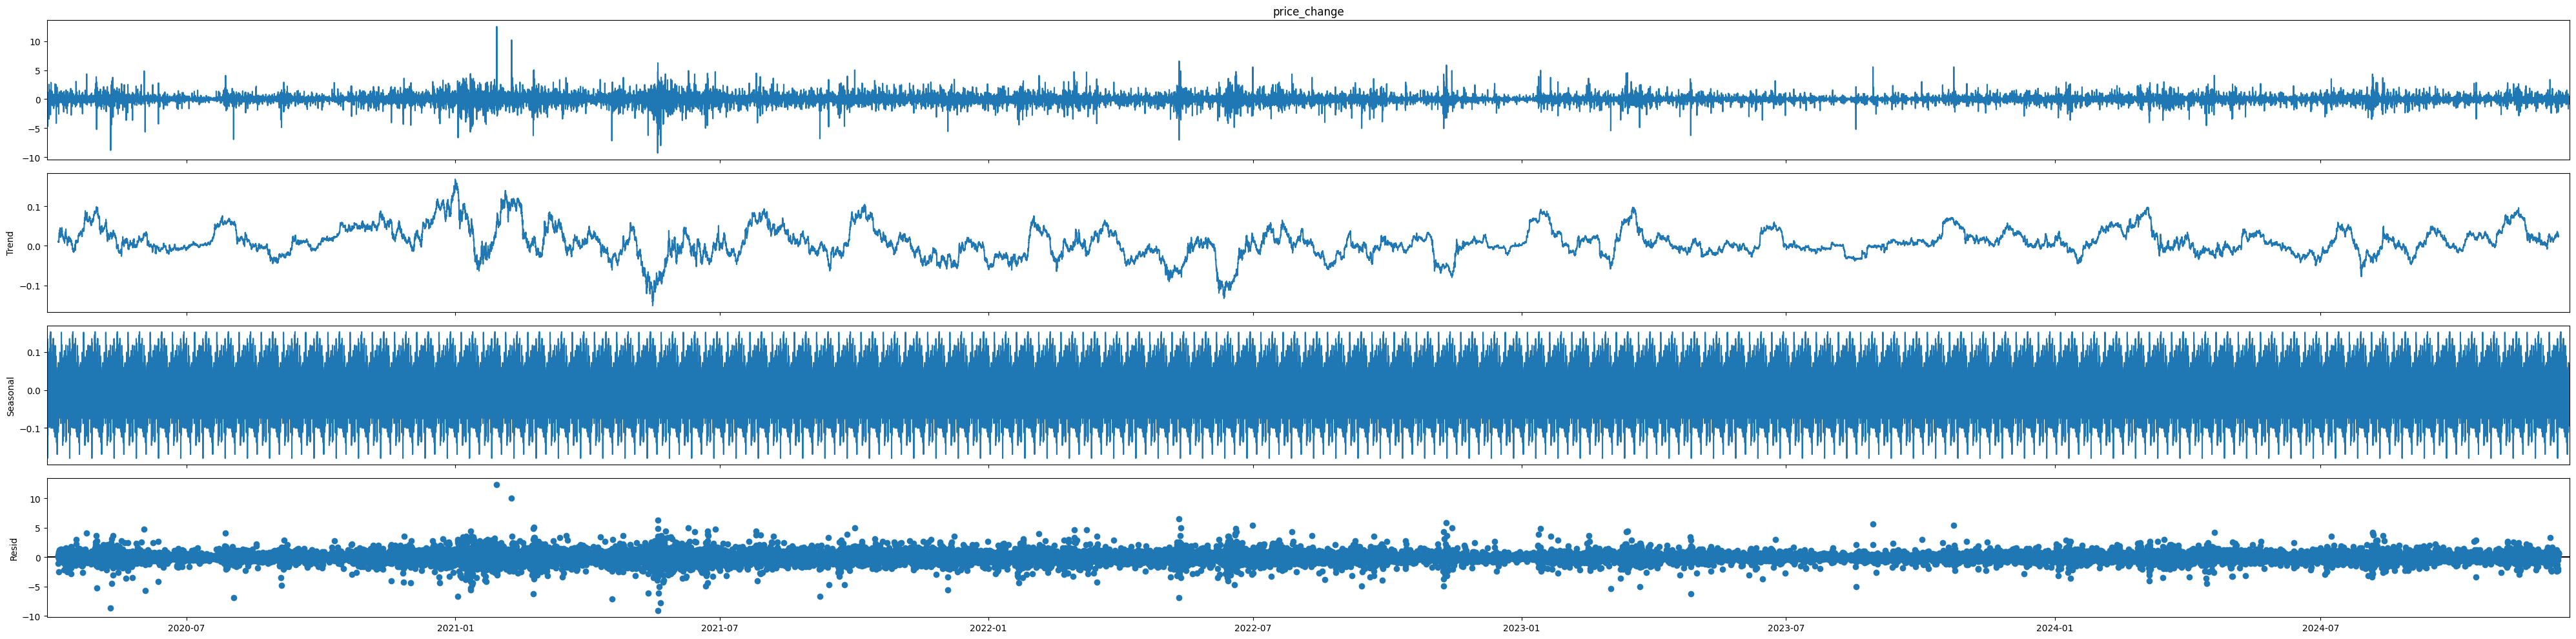

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (40,10) # Adjust the numbers for desired size

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['price_change'], model='additive', period=365)
decomposition.plot()
plt.show()

## Data Transformation

In [6]:
df.columns

Index(['difficulty', 'estimated_leverage_ratio', 'addresses_count_active',
       'addresses_count_sender', 'addresses_count_receiver',
       'exchange_whale_ratio', 'coinbase_premium_gap',
       'coinbase_premium_index', 'coinbase_premium_gap_usdt_adjusted',
       'coinbase_premium_index_usdt_adjusted', 'taker_buy_volume',
       'taker_sell_volume', 'taker_buy_ratio', 'taker_sell_ratio',
       'taker_buy_sell_ratio', 'blockreward', 'blockreward_usd',
       'fees_transaction_mean', 'fees_transaction_mean_usd',
       'fees_transaction_median', 'fees_transaction_median_usd',
       'miner_supply_ratio', 'addresses_count_inflow',
       'addresses_count_outflow', 'exchange_supply_ratio',
       'transactions_count_inflow', 'transactions_count_outflow',
       'tokens_transferred_total', 'tokens_transferred_mean',
       'tokens_transferred_median', 'transactions_count_inflow.1',
       'transactions_count_outflow.1', 'long_liquidations',
       'short_liquidations', 'long_liquidati

Skewness of numerical columns:
difficulty                   0.840943
estimated_leverage_ratio     0.662489
addresses_count_active       0.526708
addresses_count_sender       0.805729
addresses_count_receiver     0.694392
                              ...    
ROC                          0.049559
MFI                          0.044506
whale_volume_ratio           5.865512
whale_momentum              10.351313
momentum                    -0.188632
Length: 72, dtype: float64


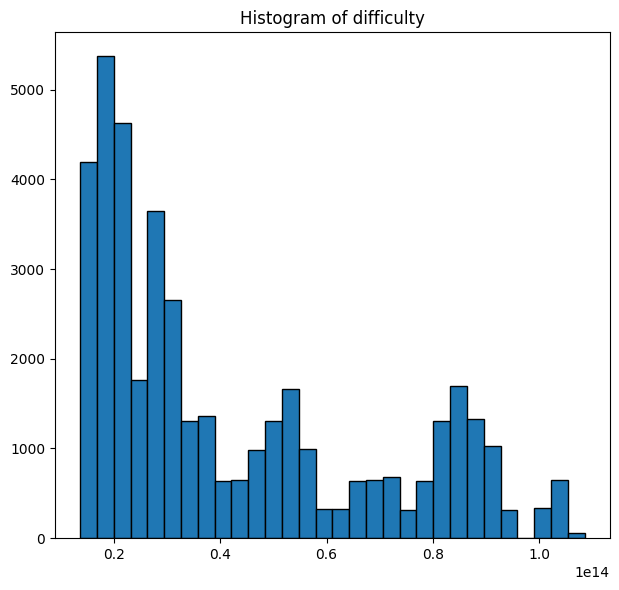

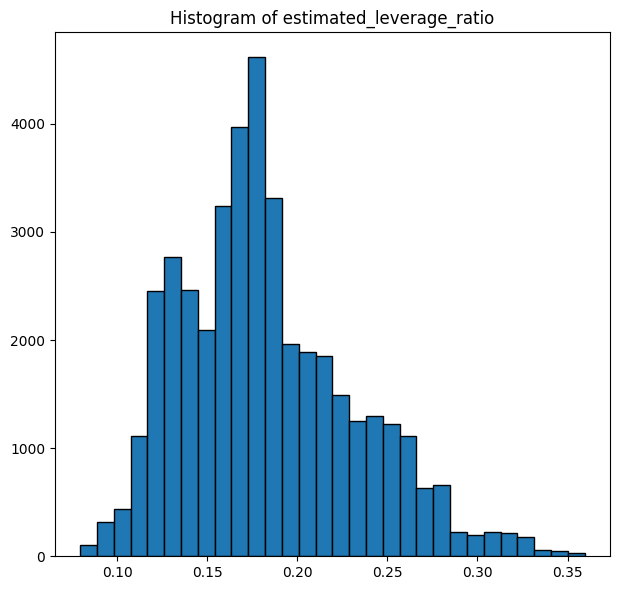

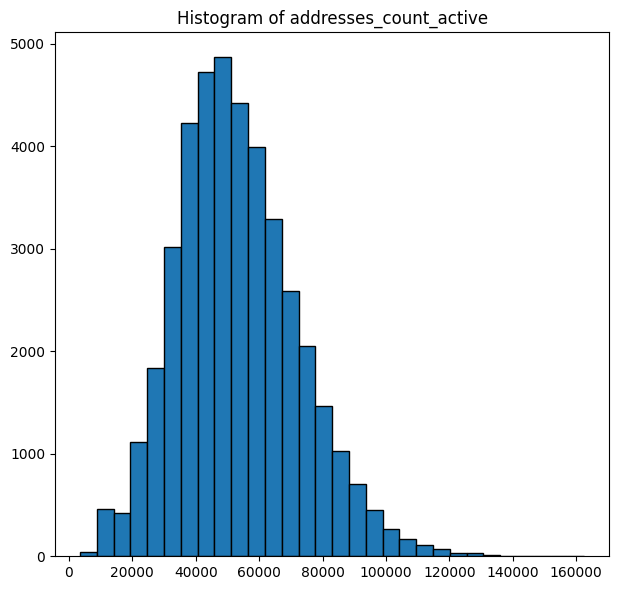

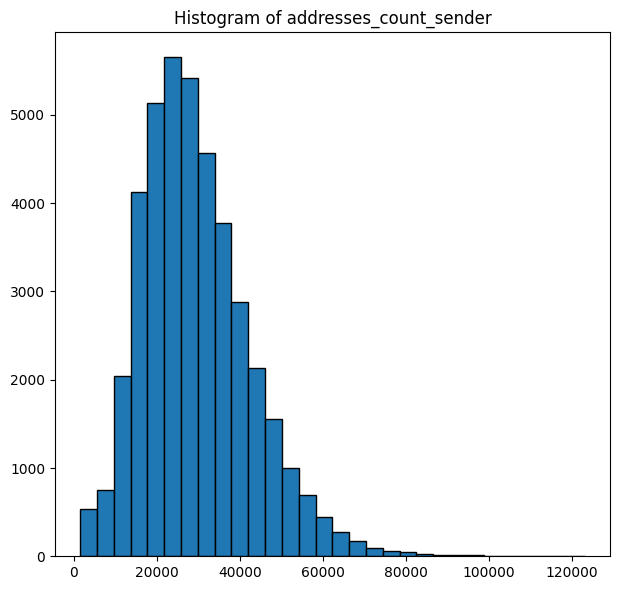

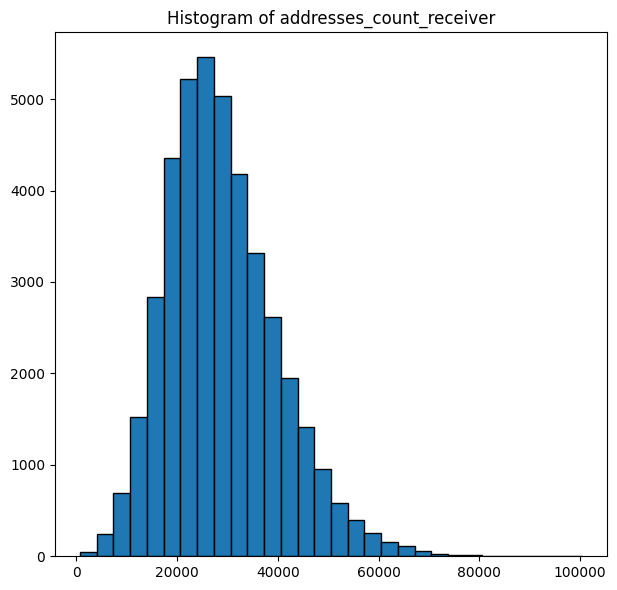

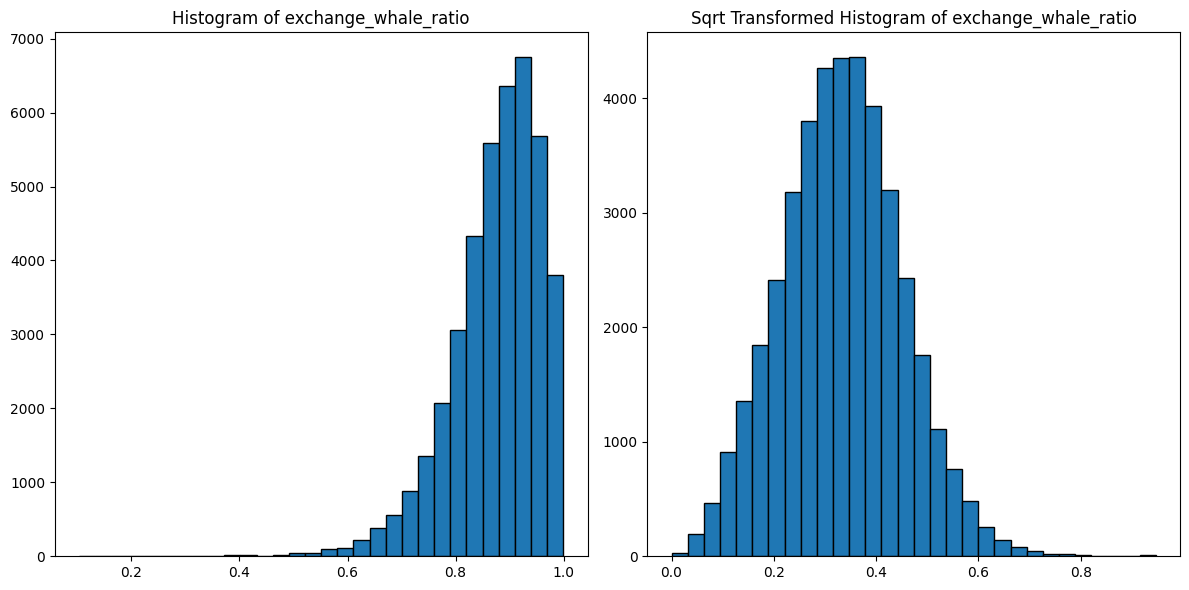

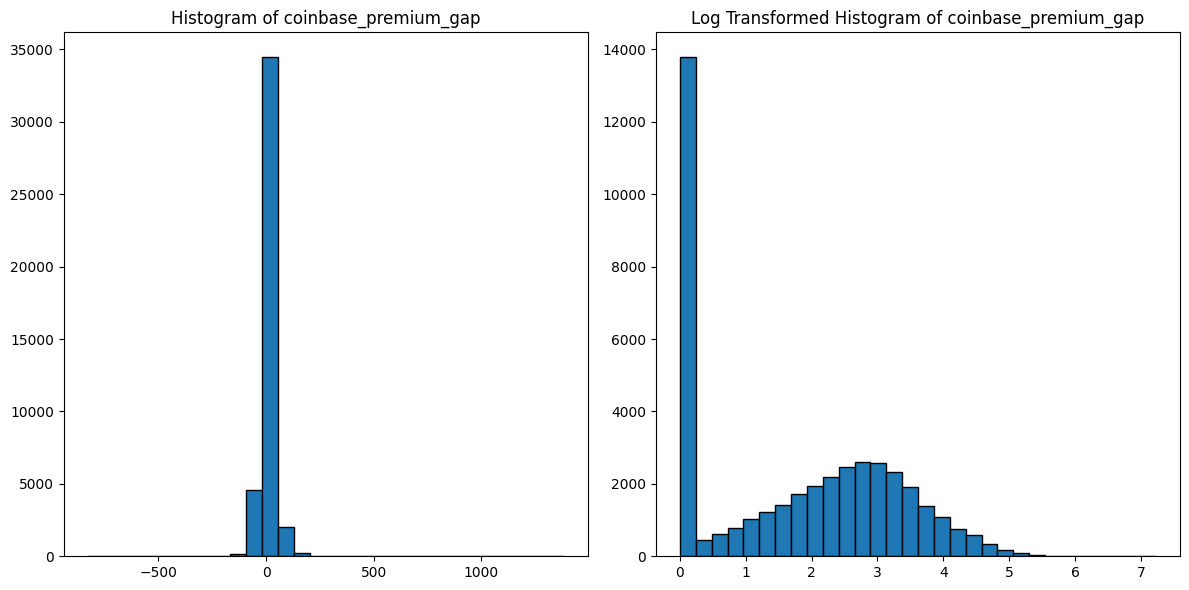

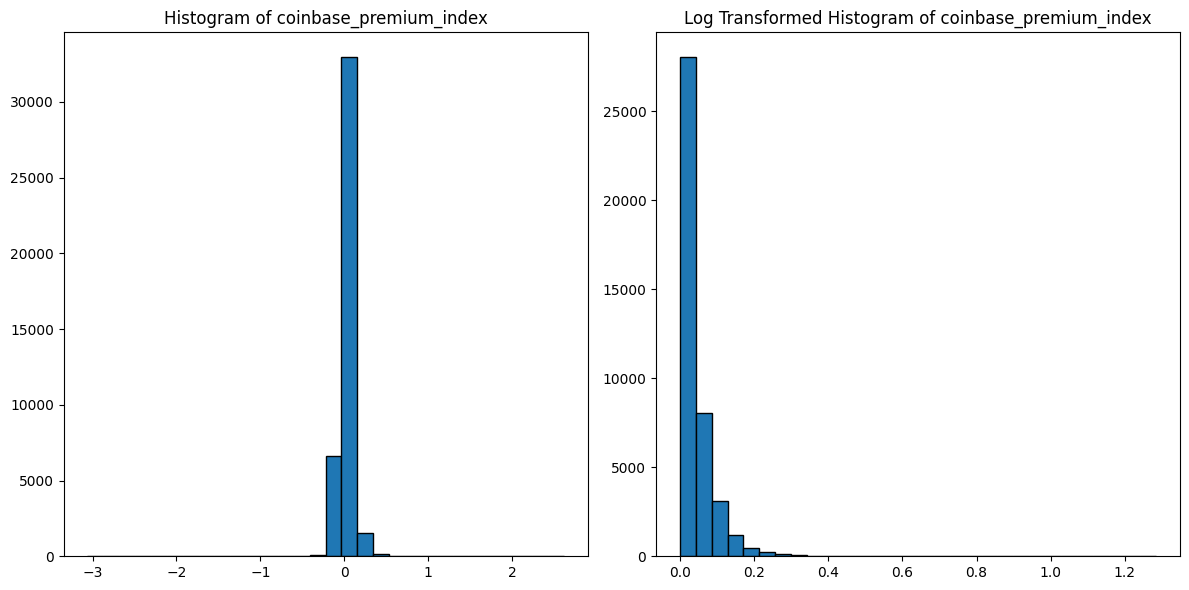

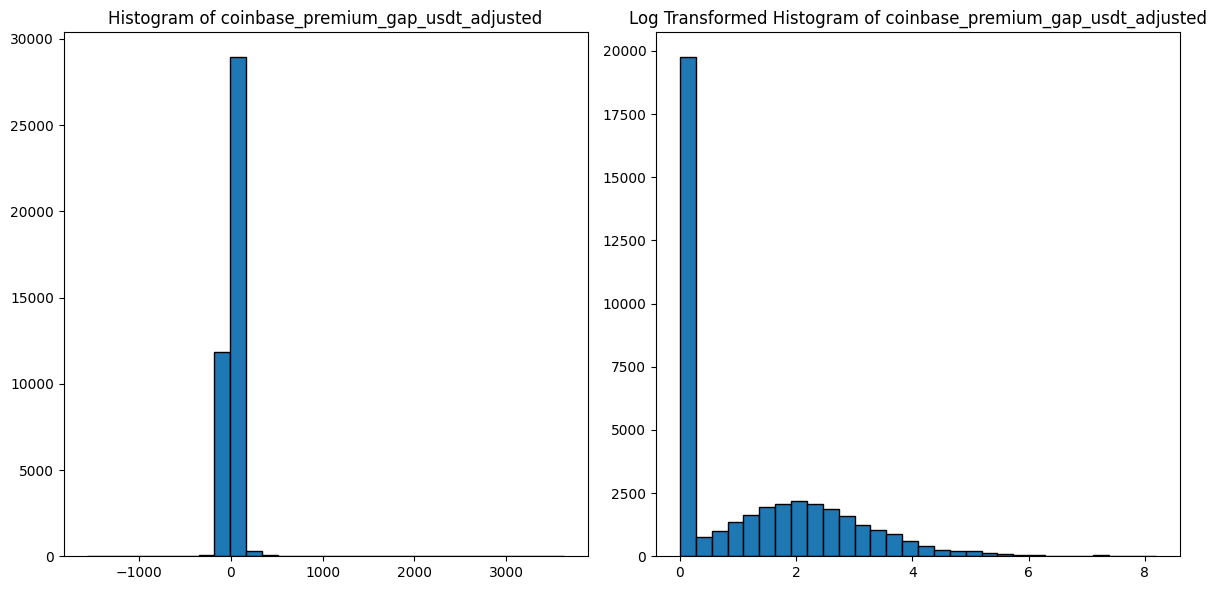

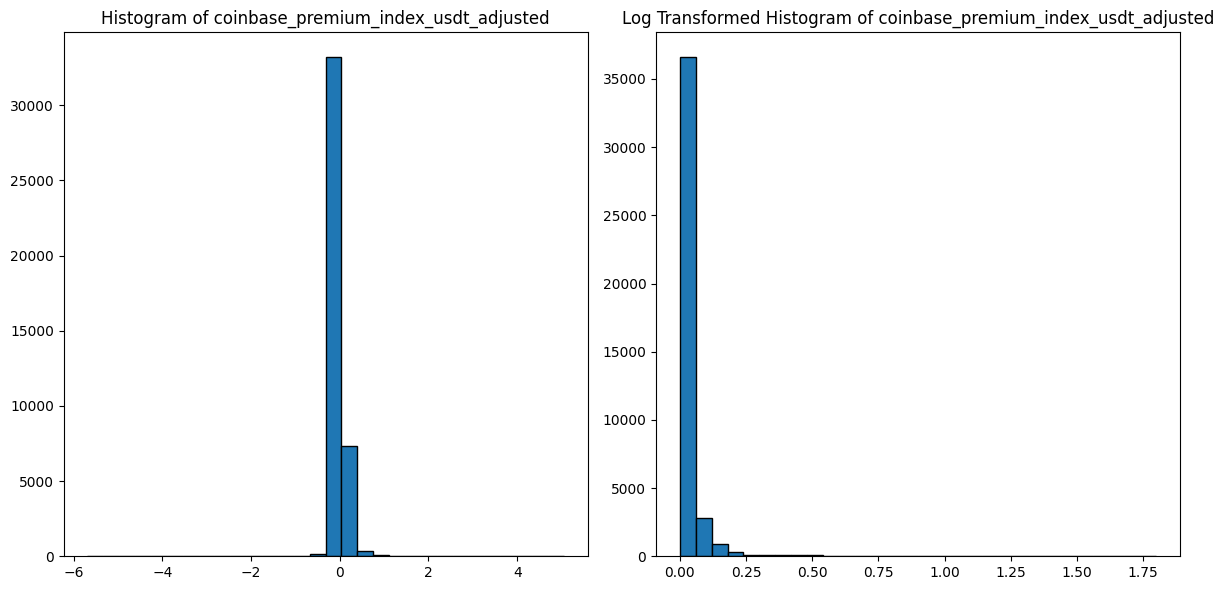

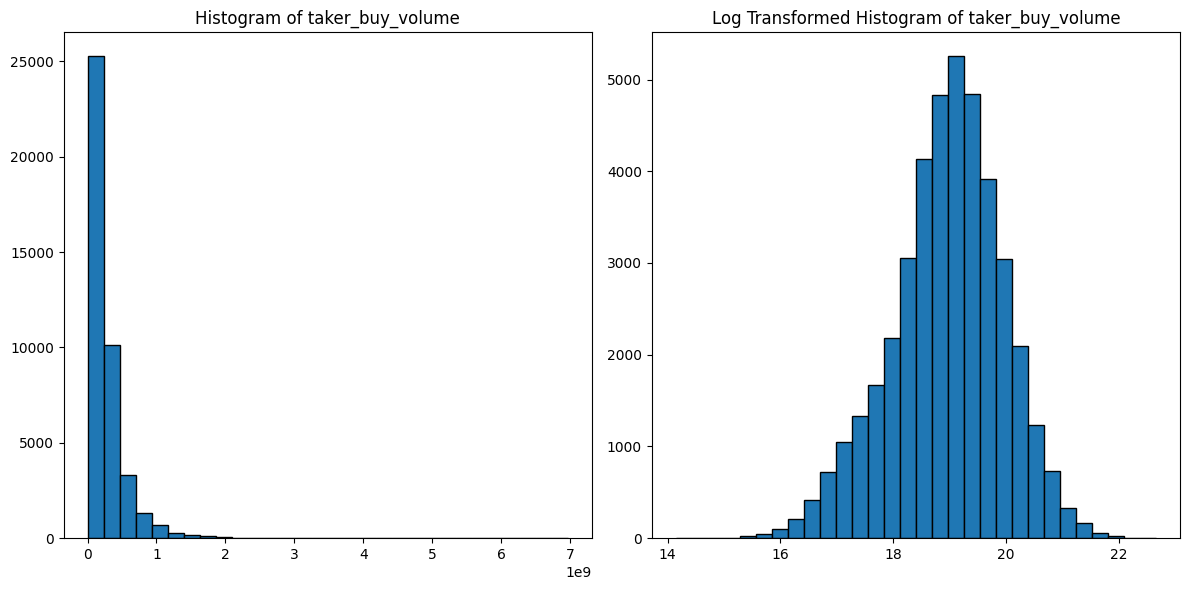

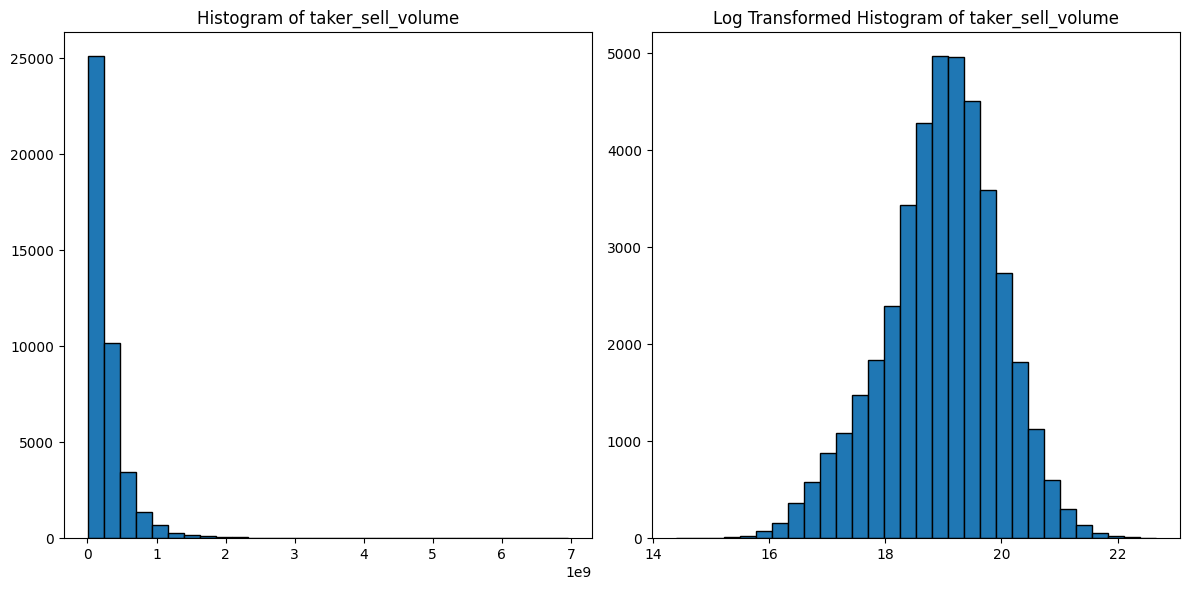

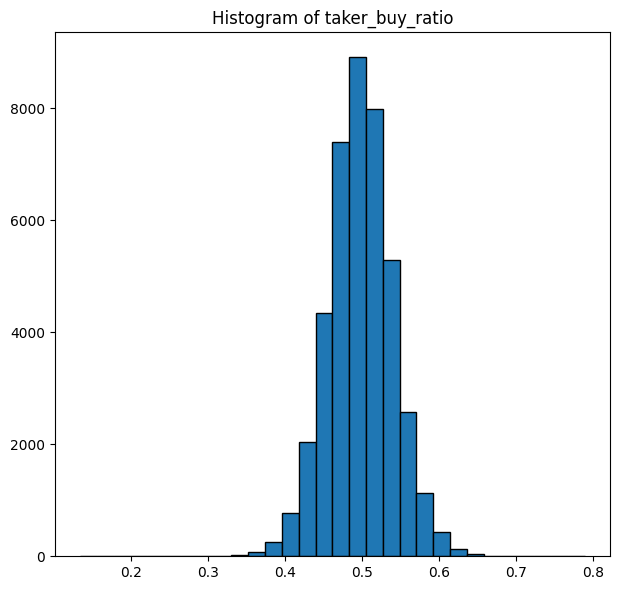

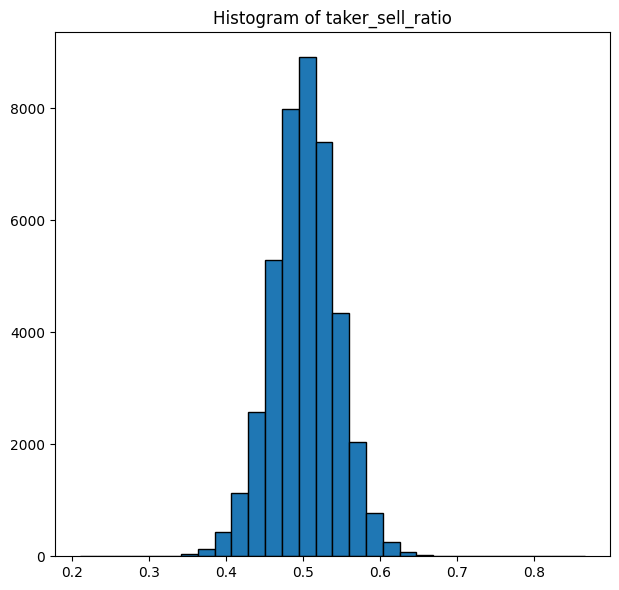

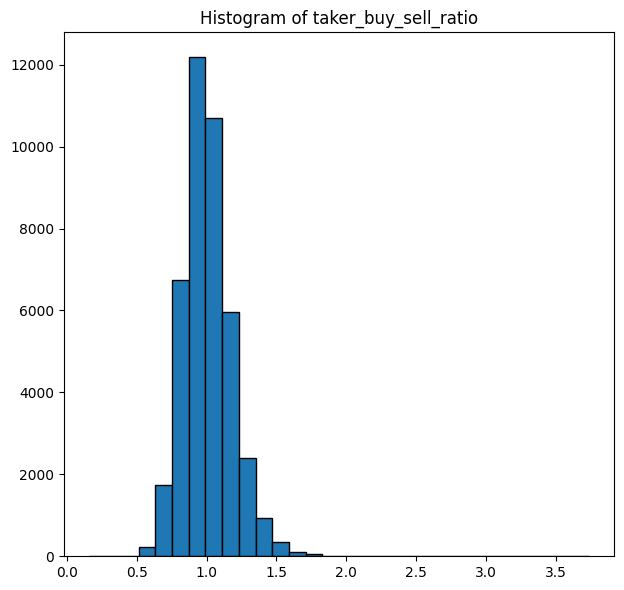

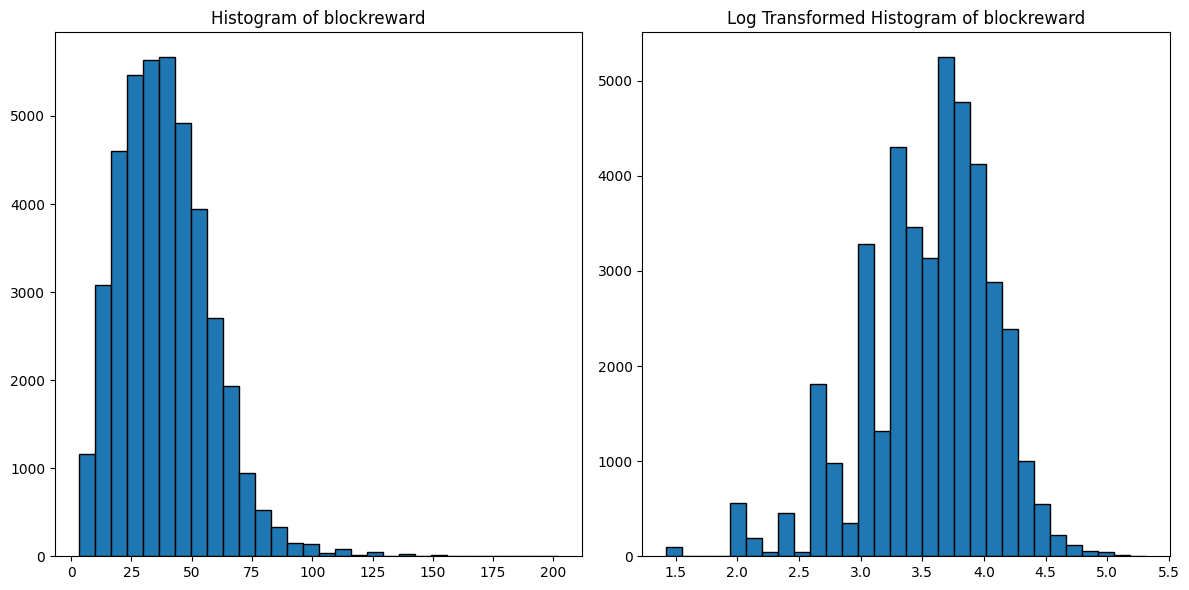

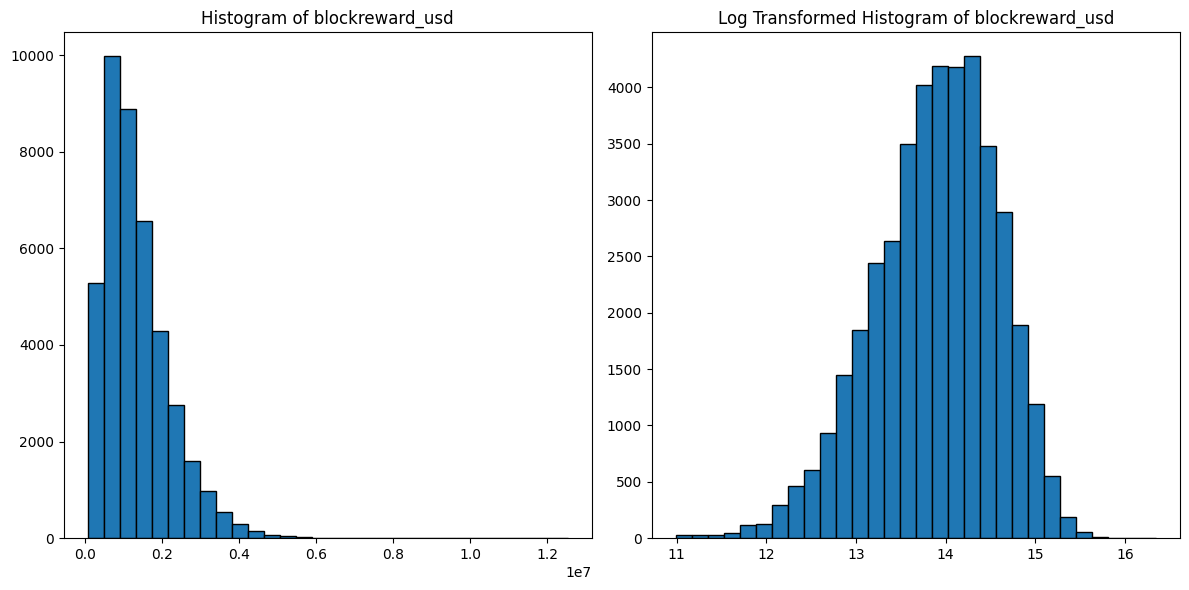

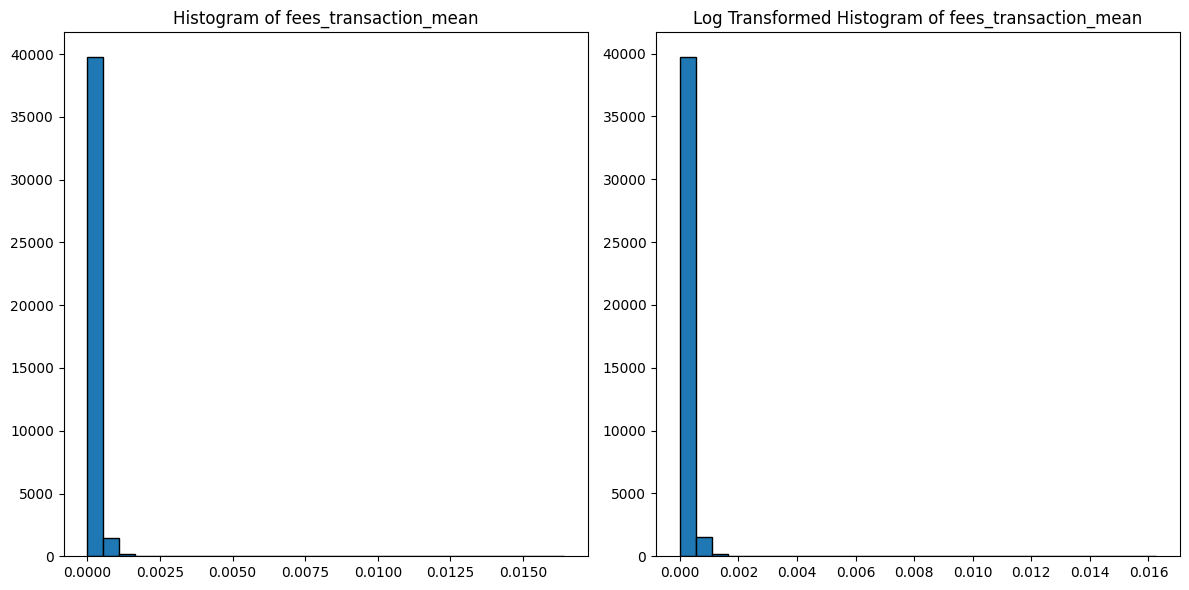

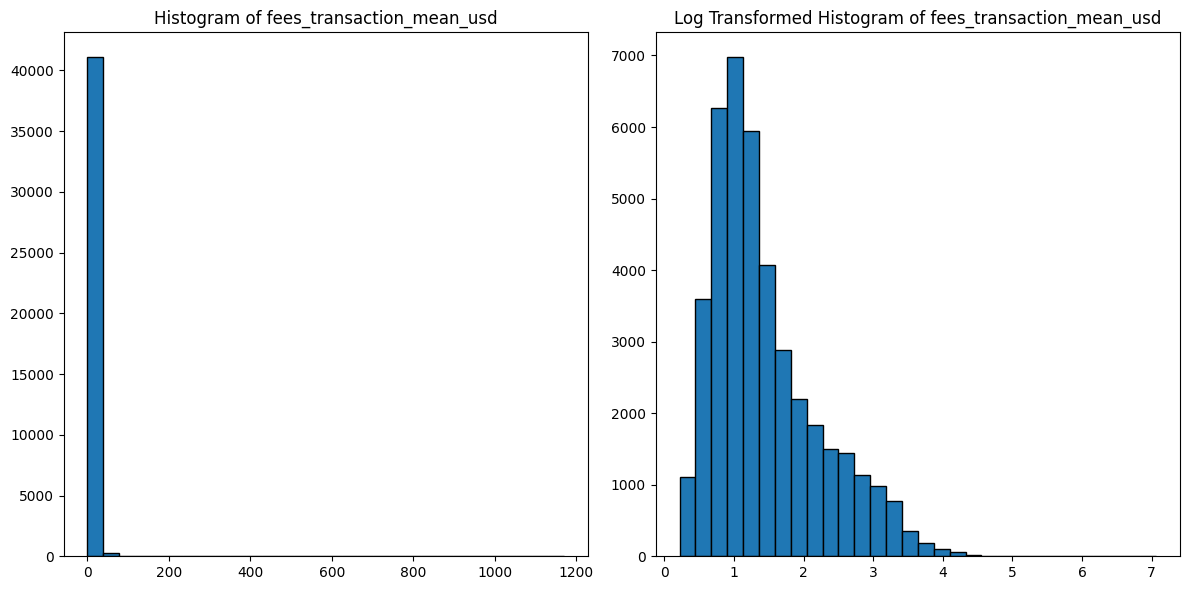

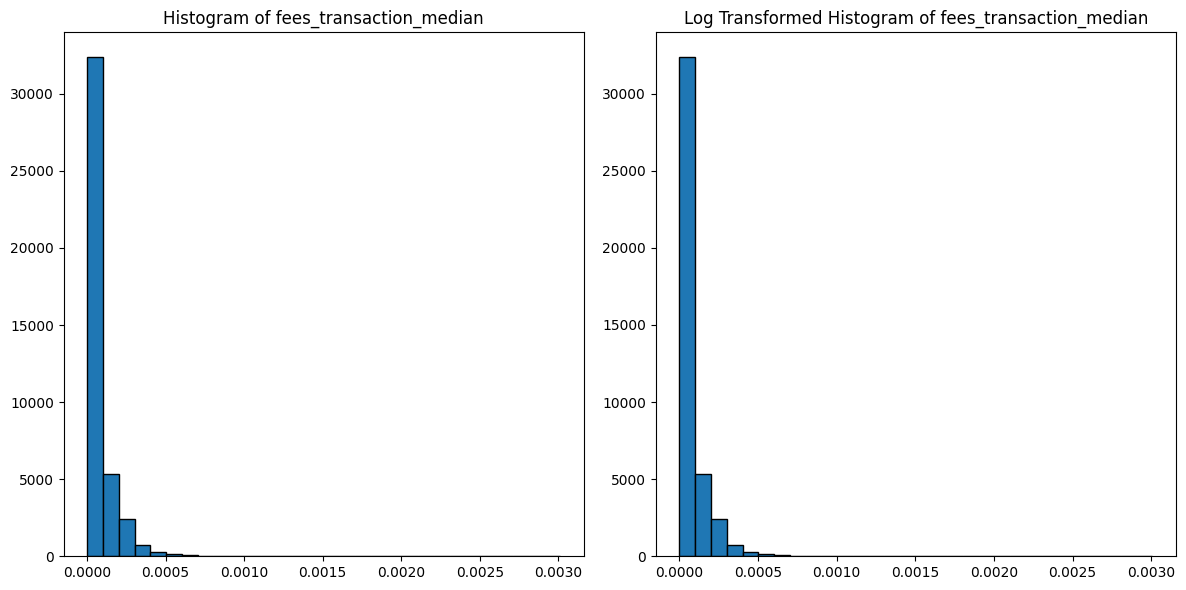

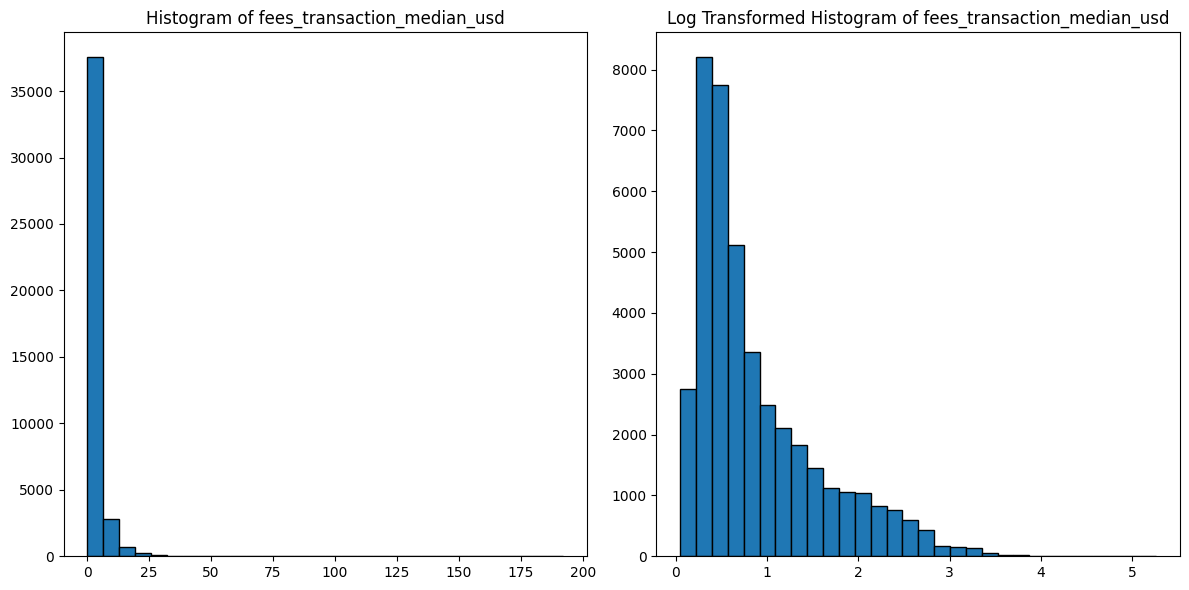

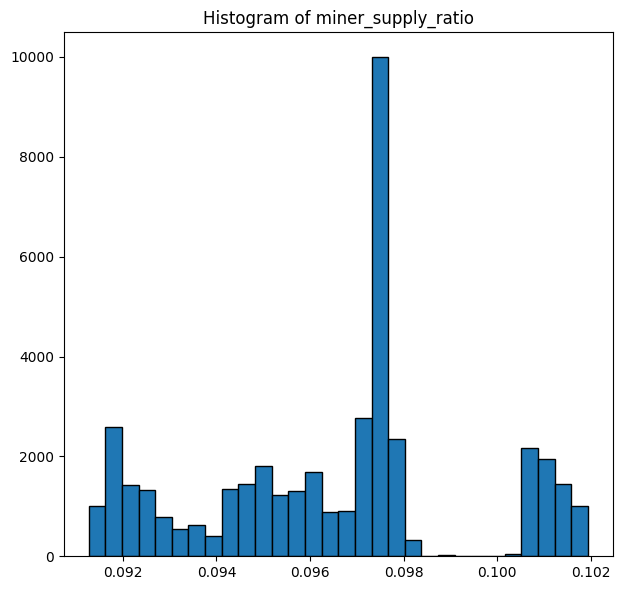

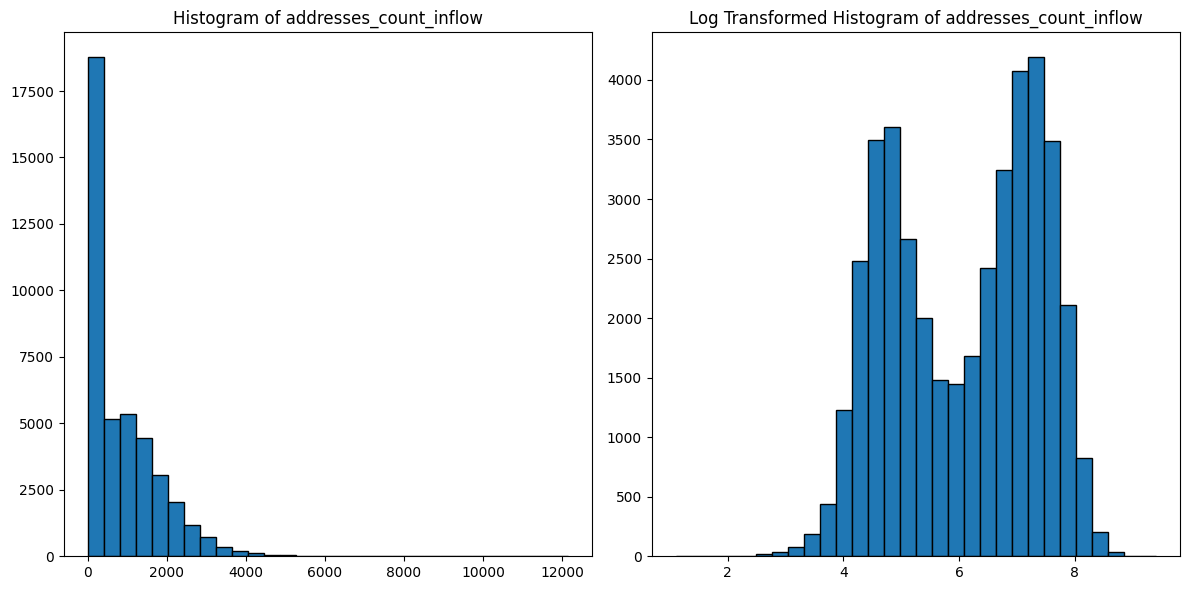

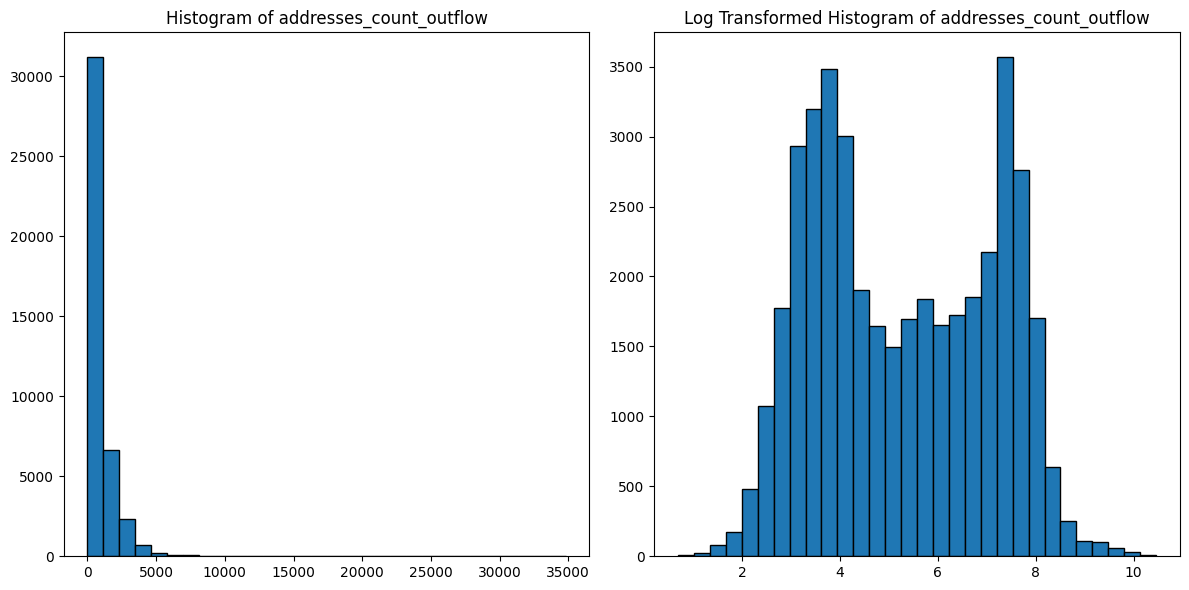

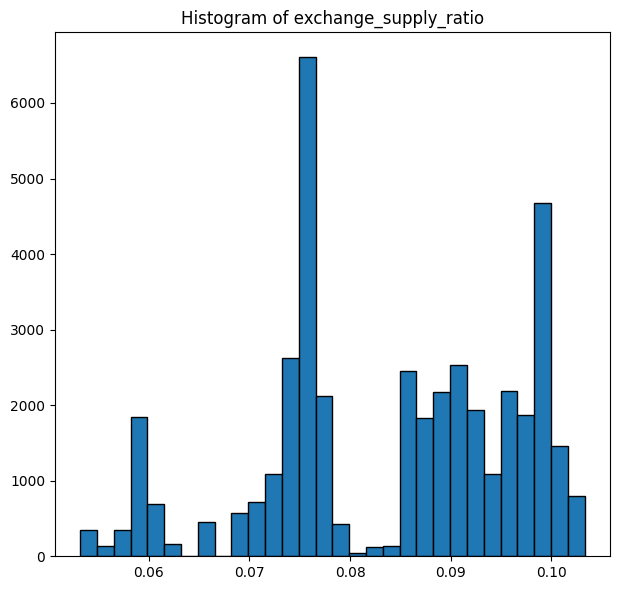

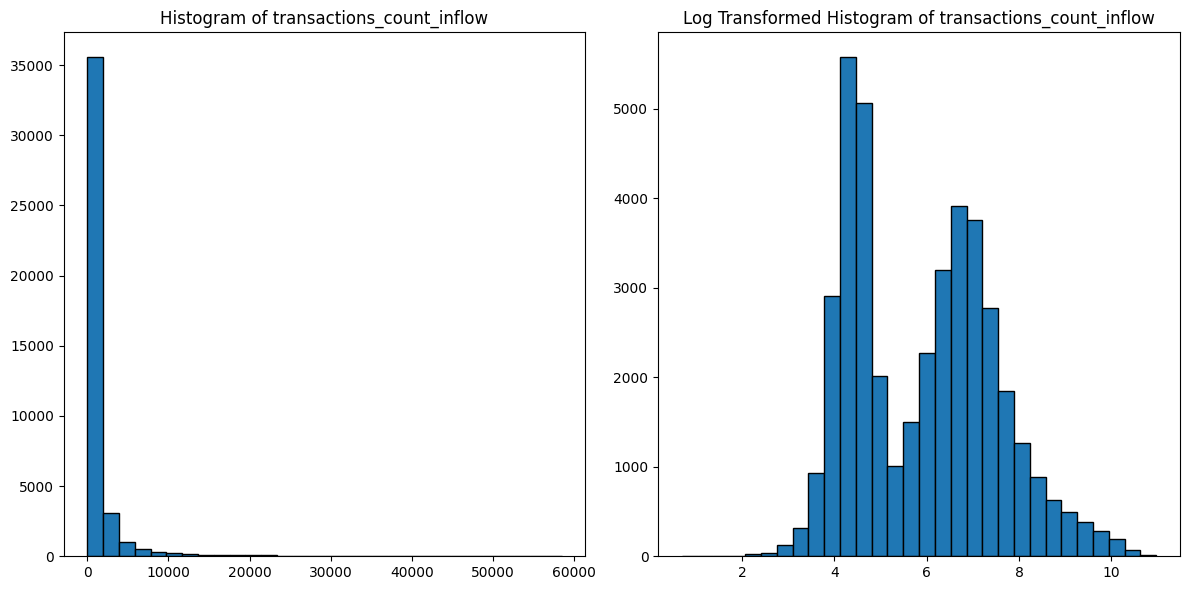

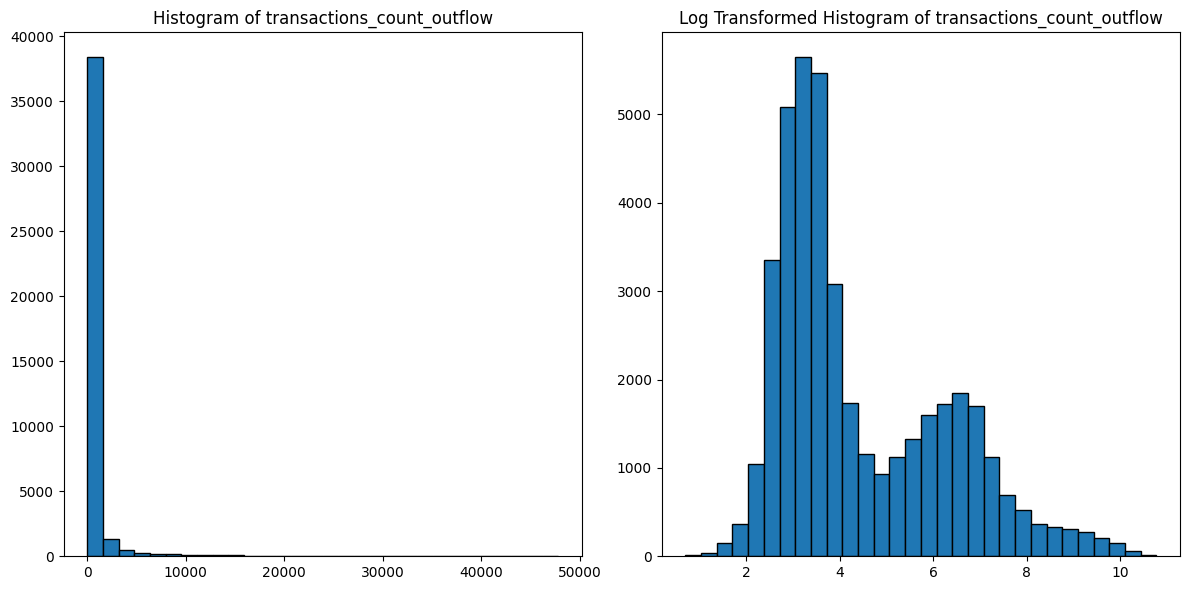

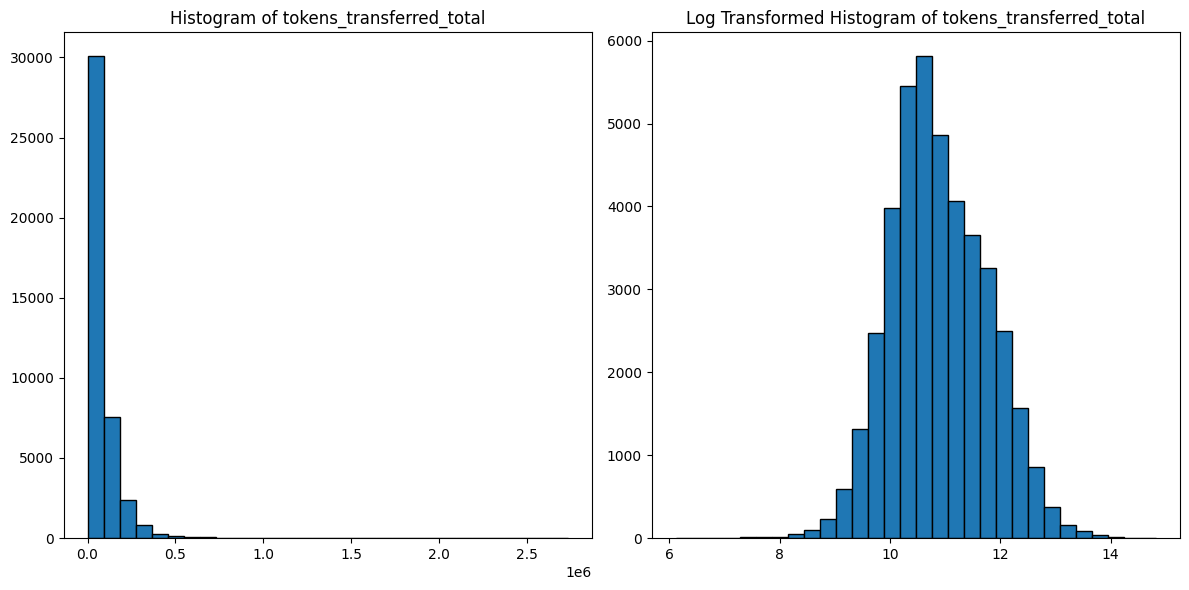

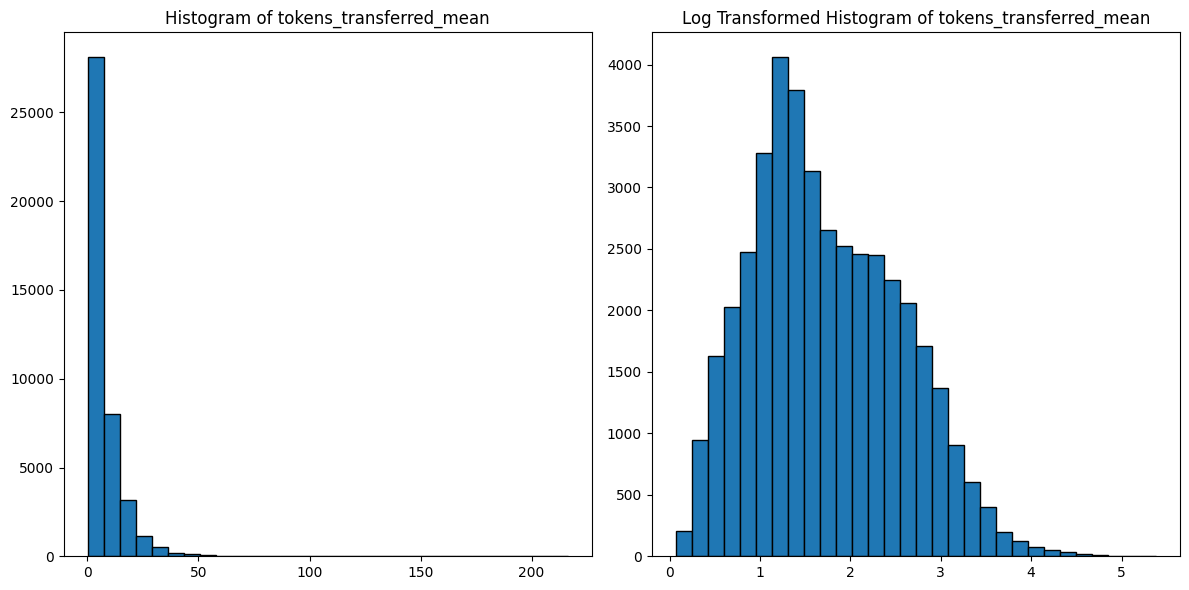

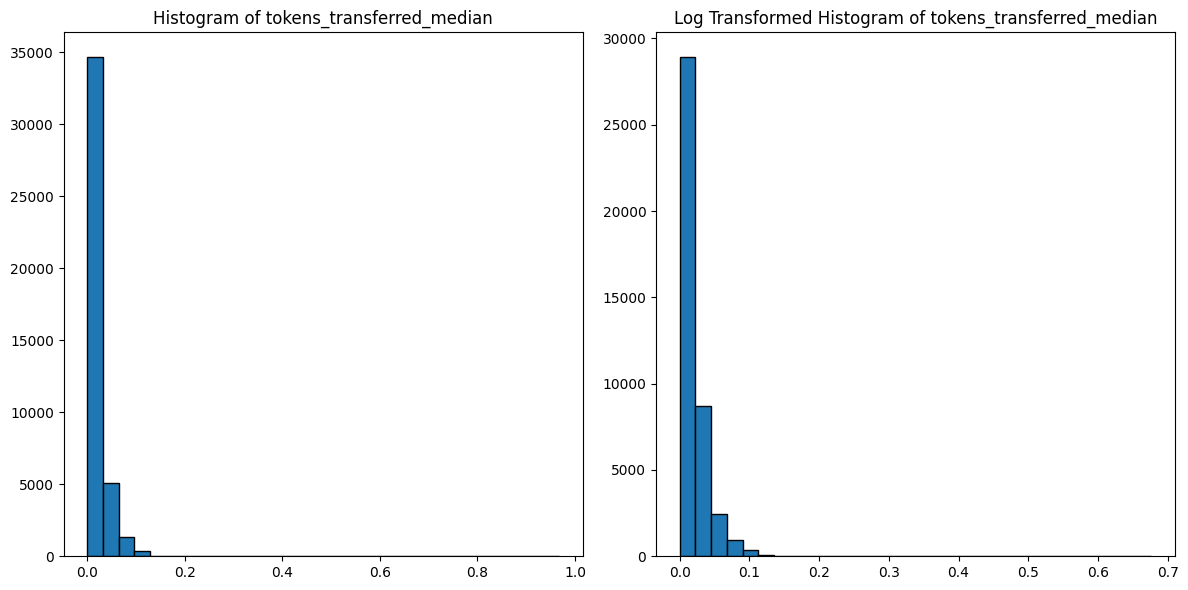

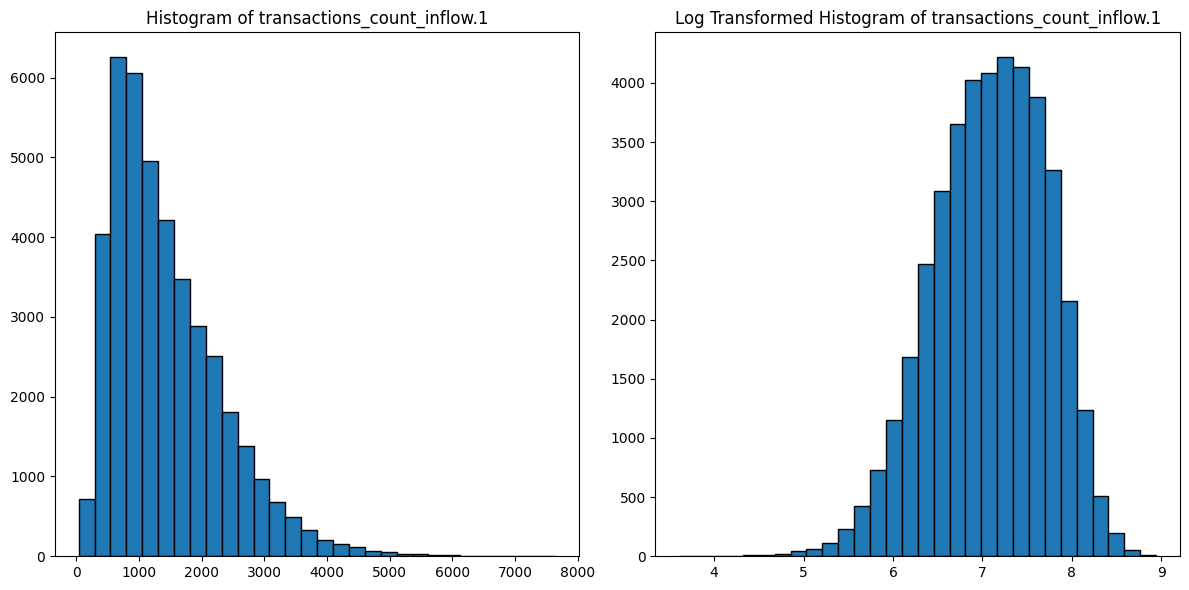

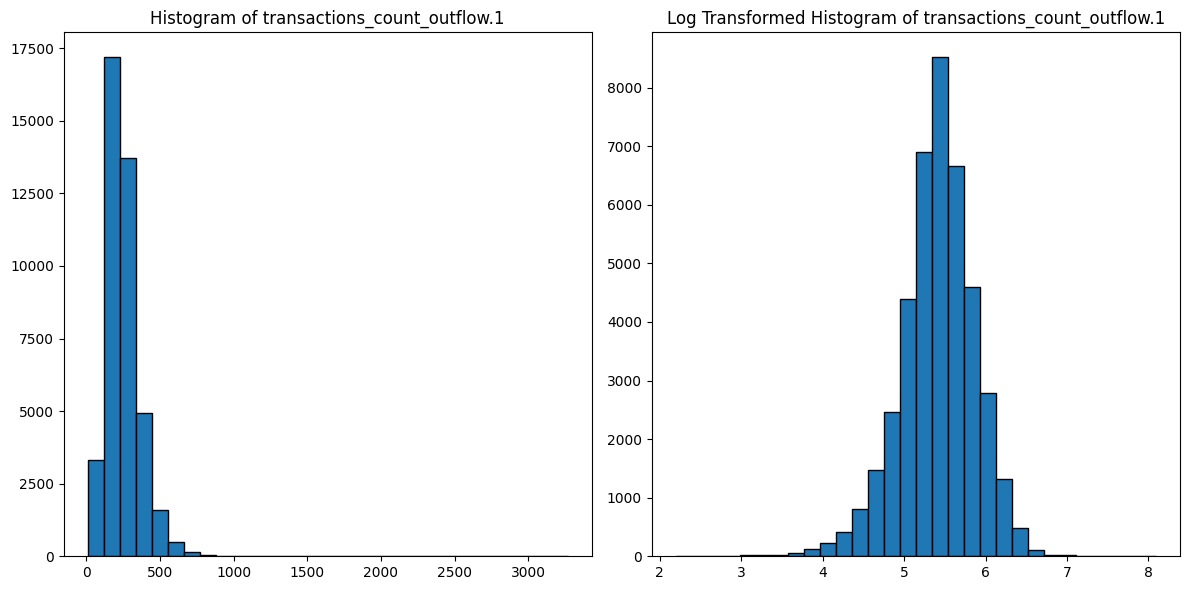

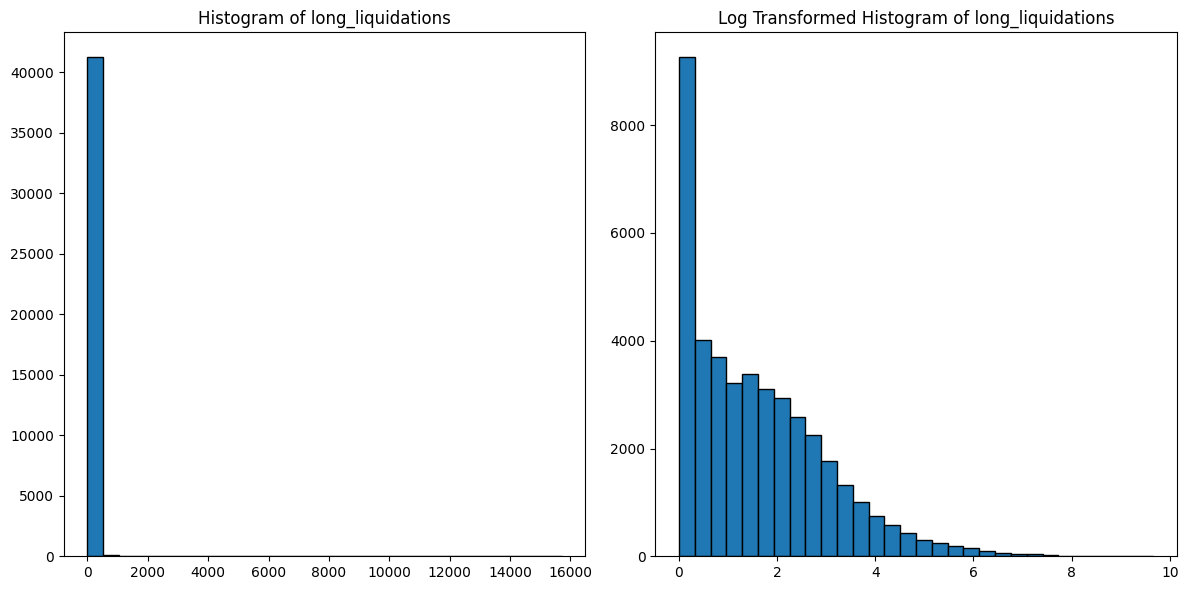

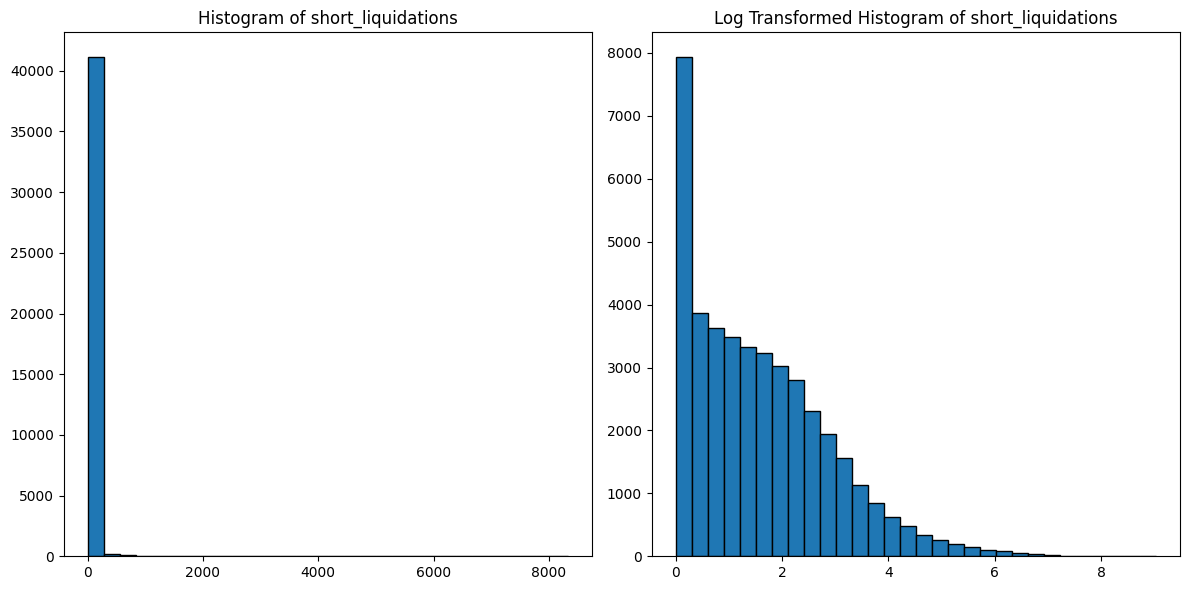

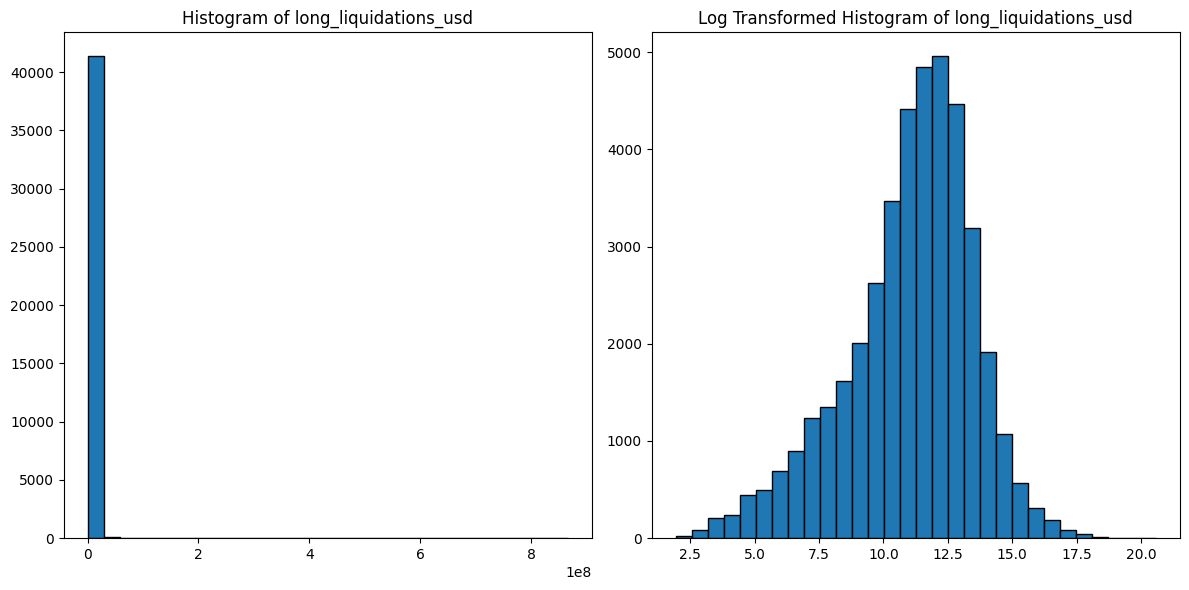

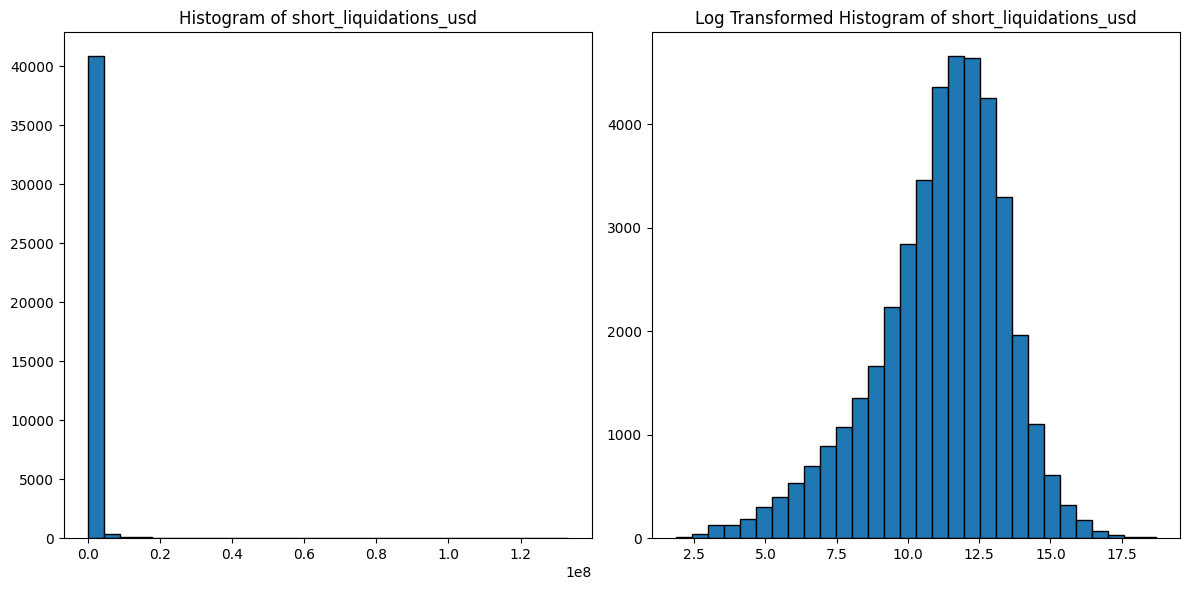

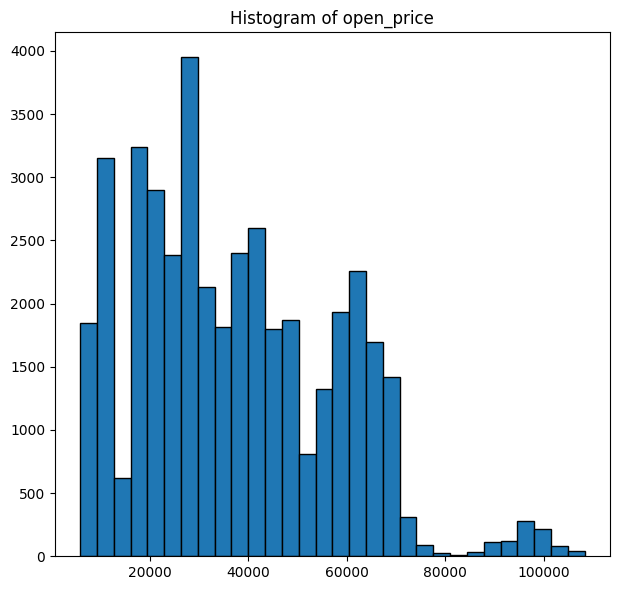

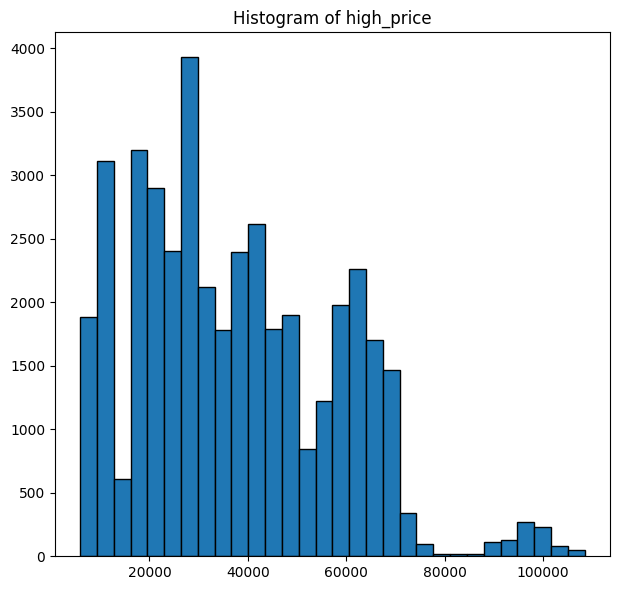

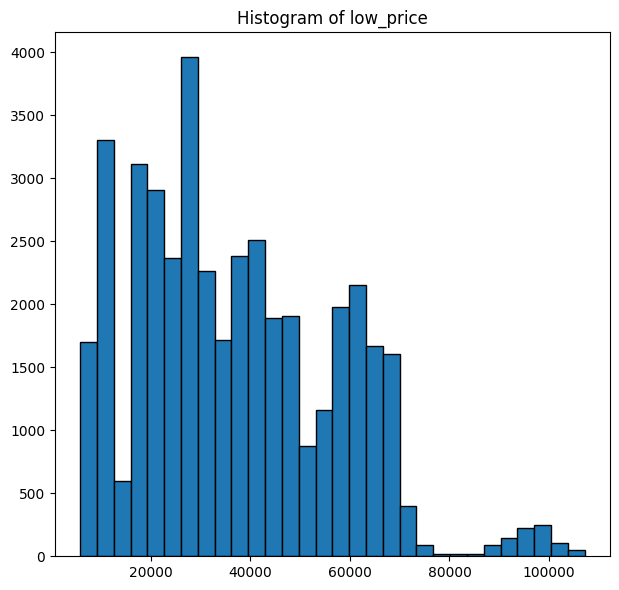

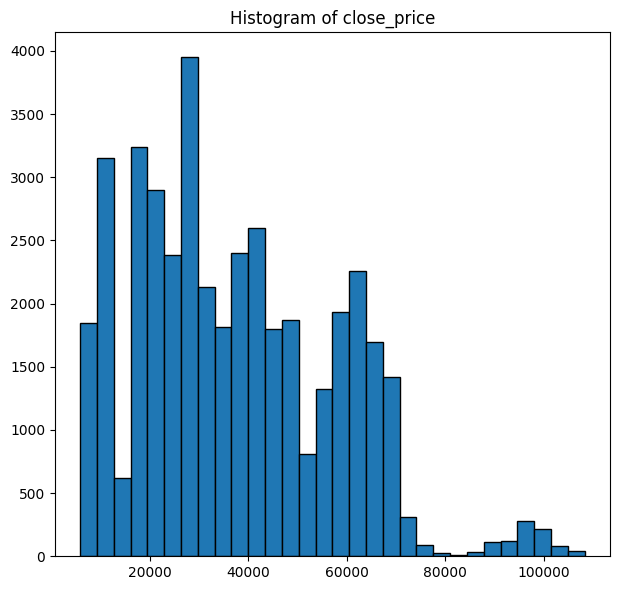

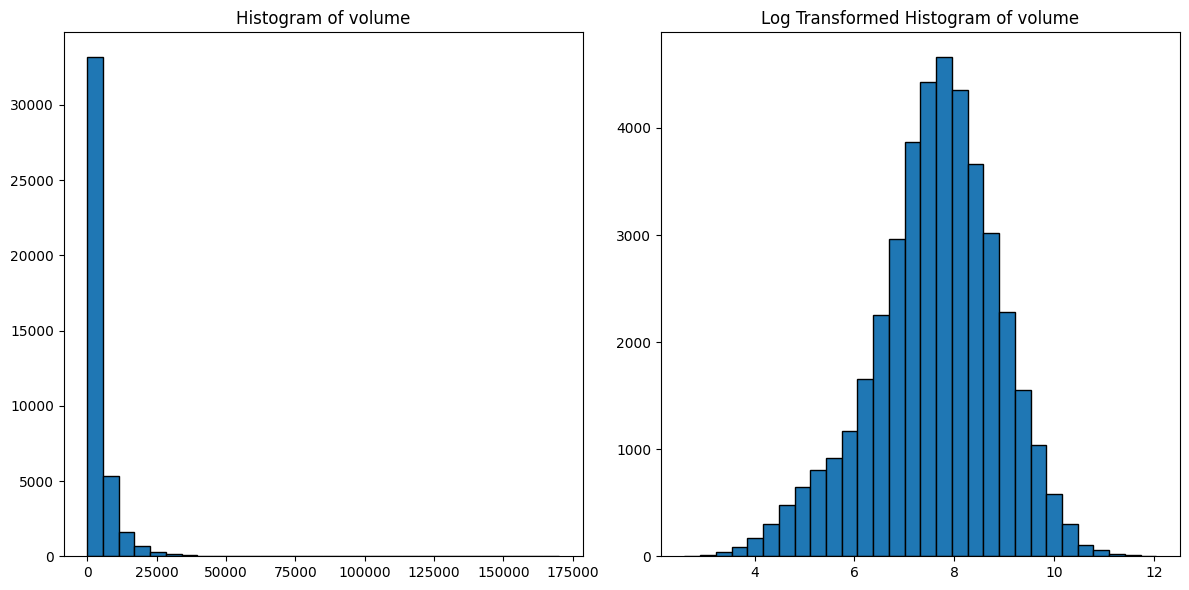

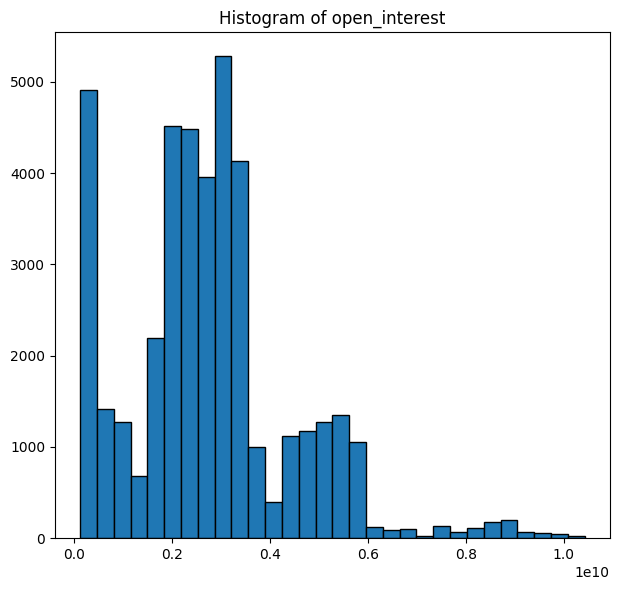

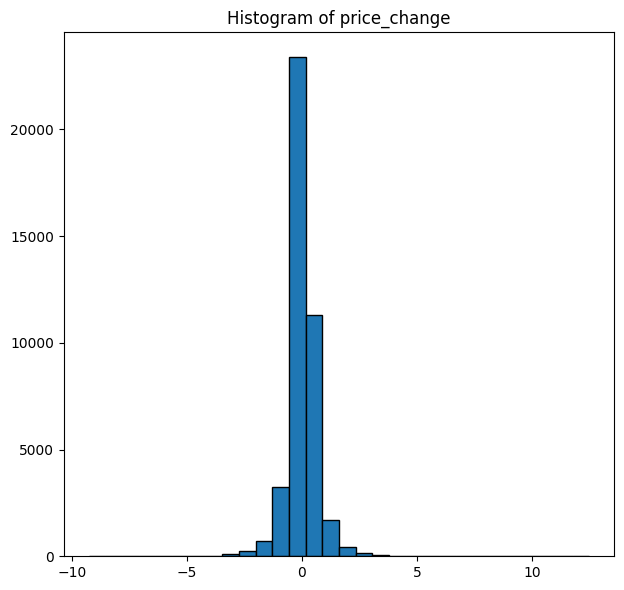

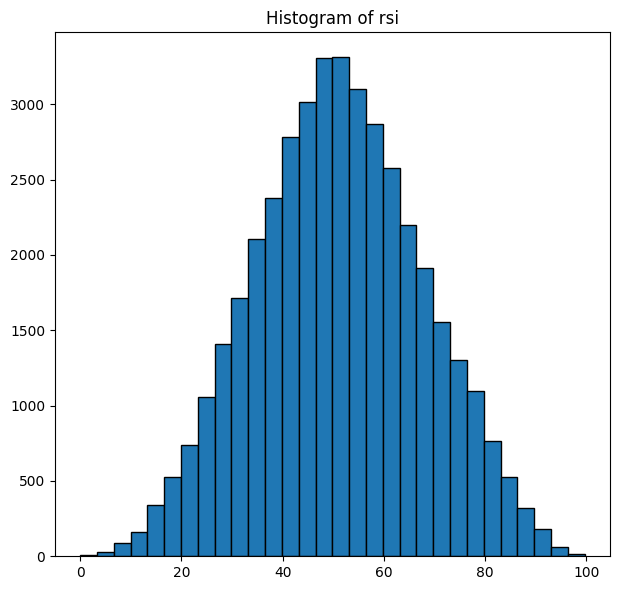

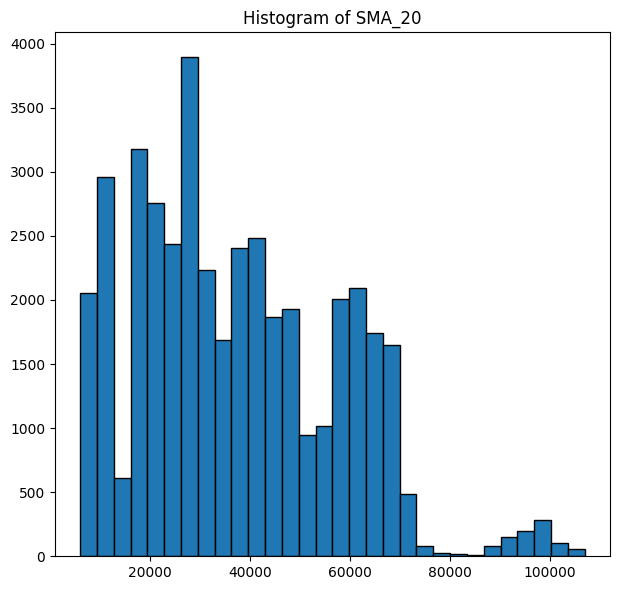

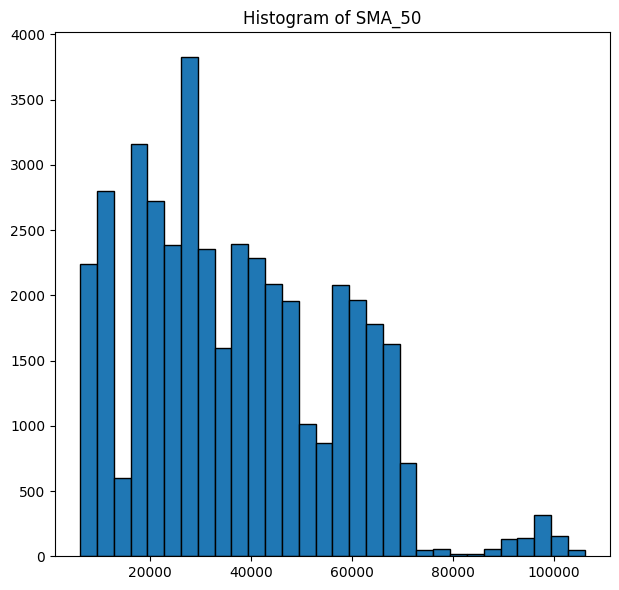

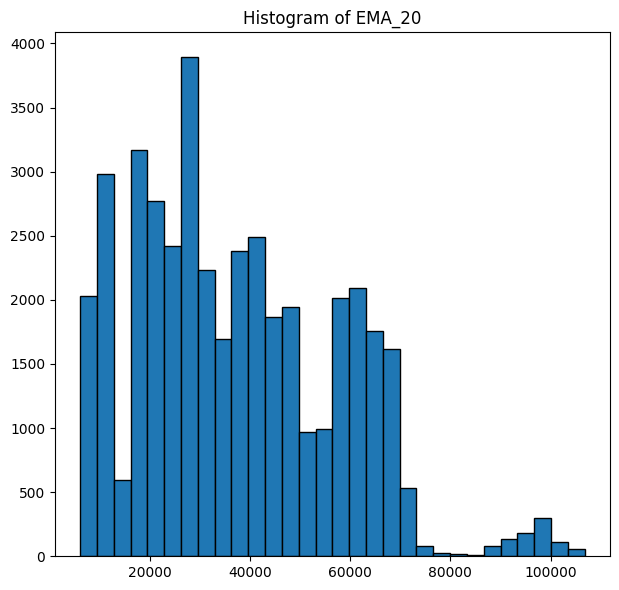

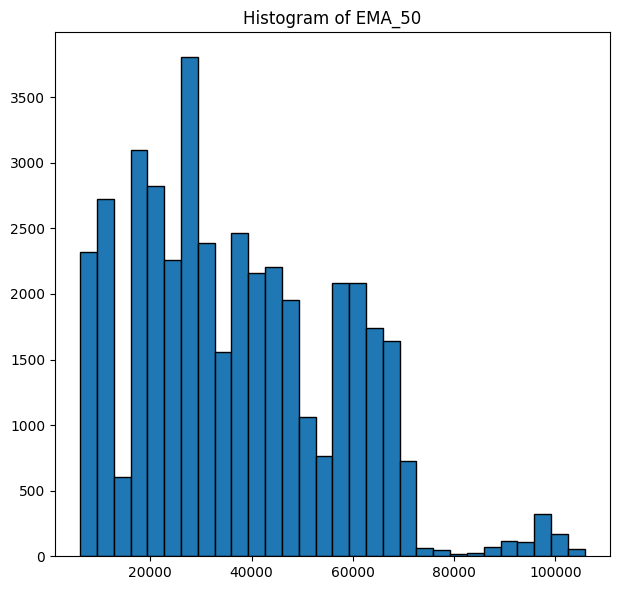

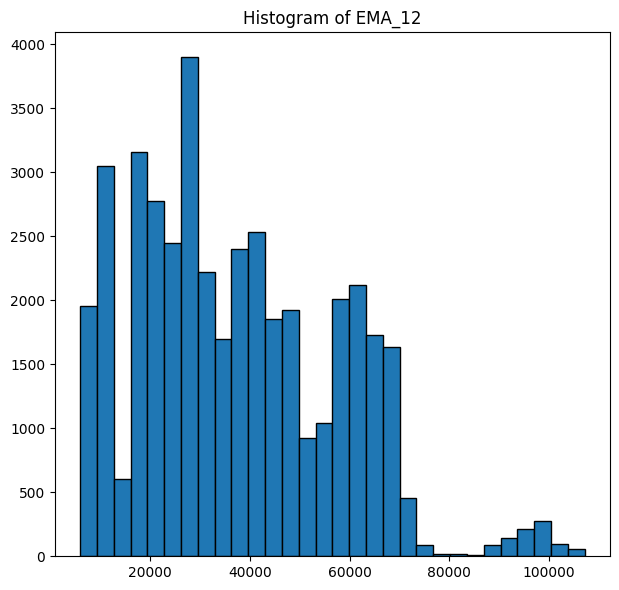

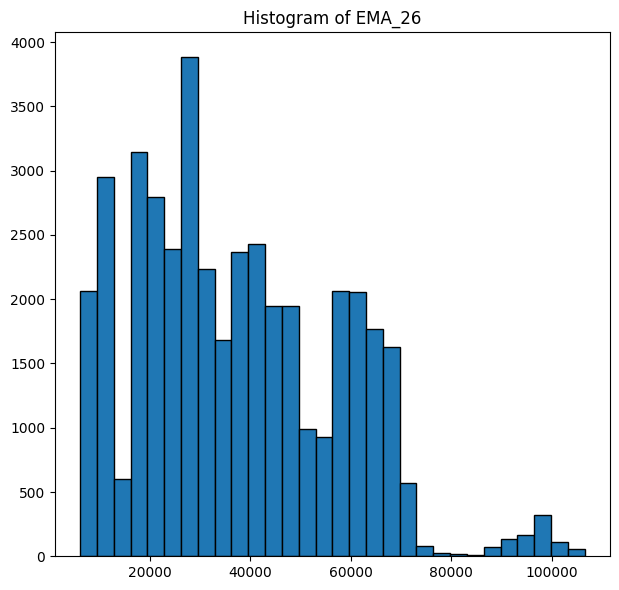

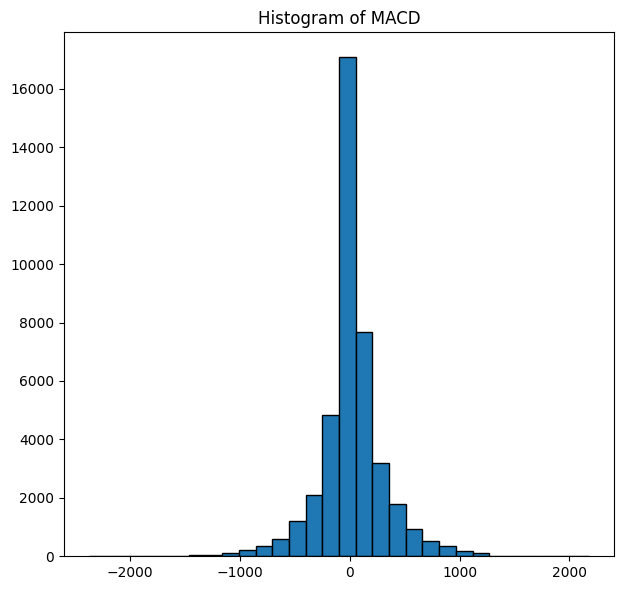

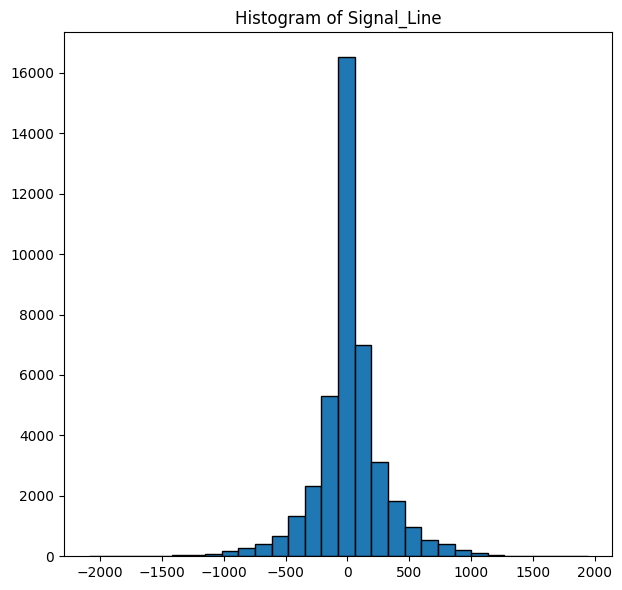

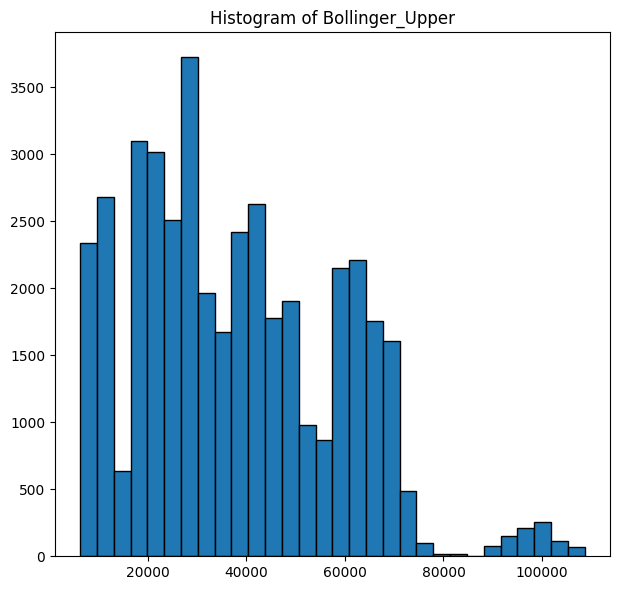

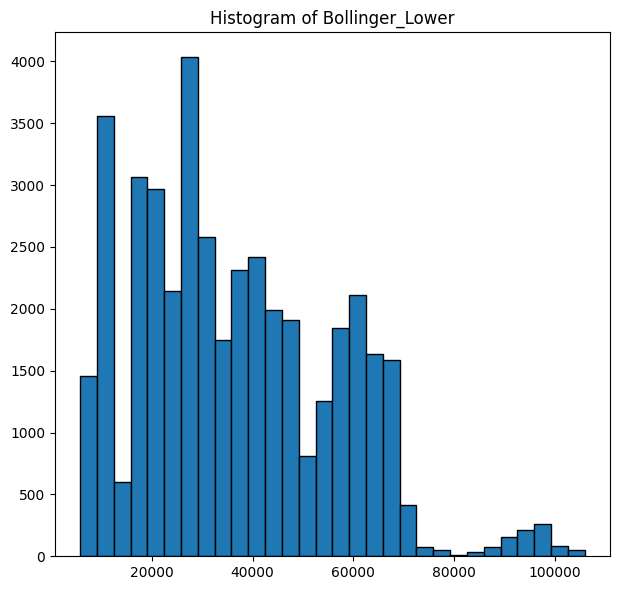

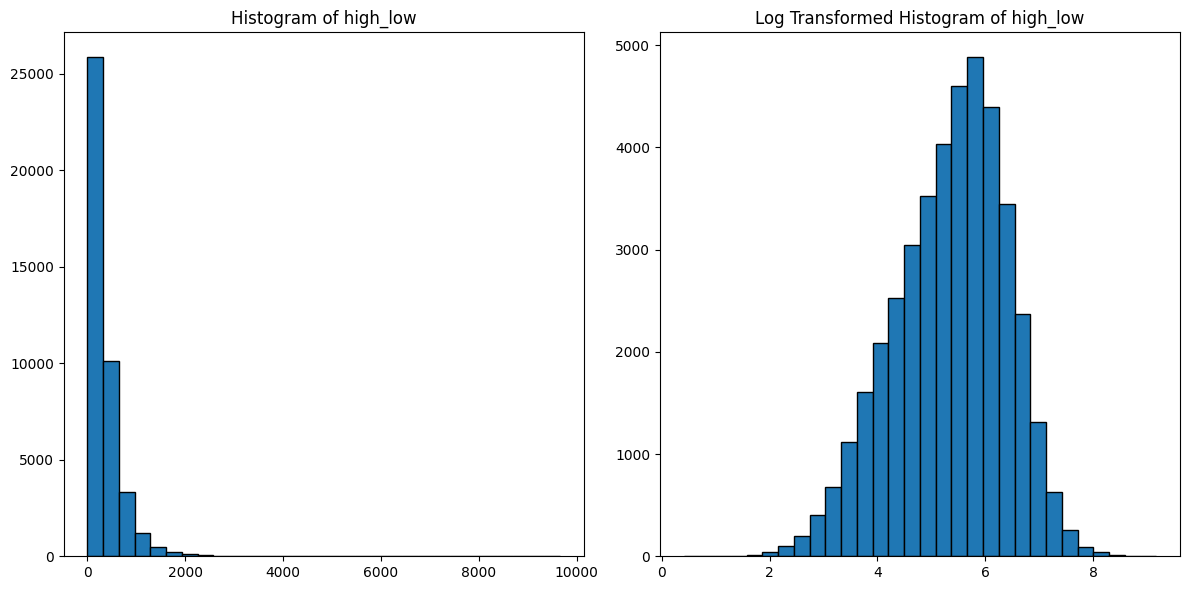

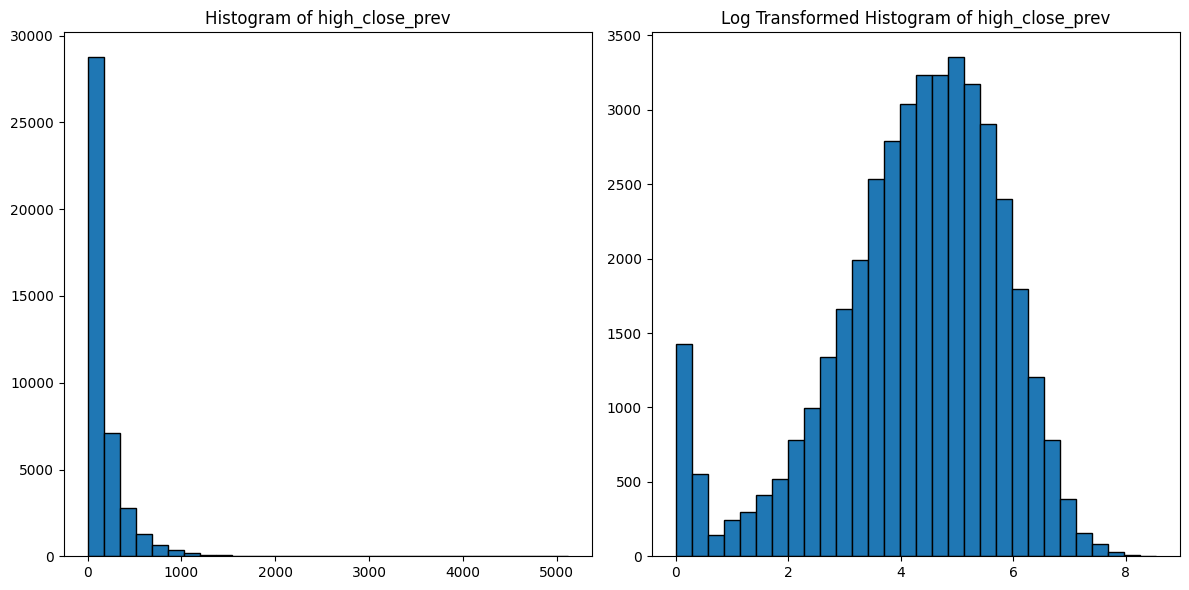

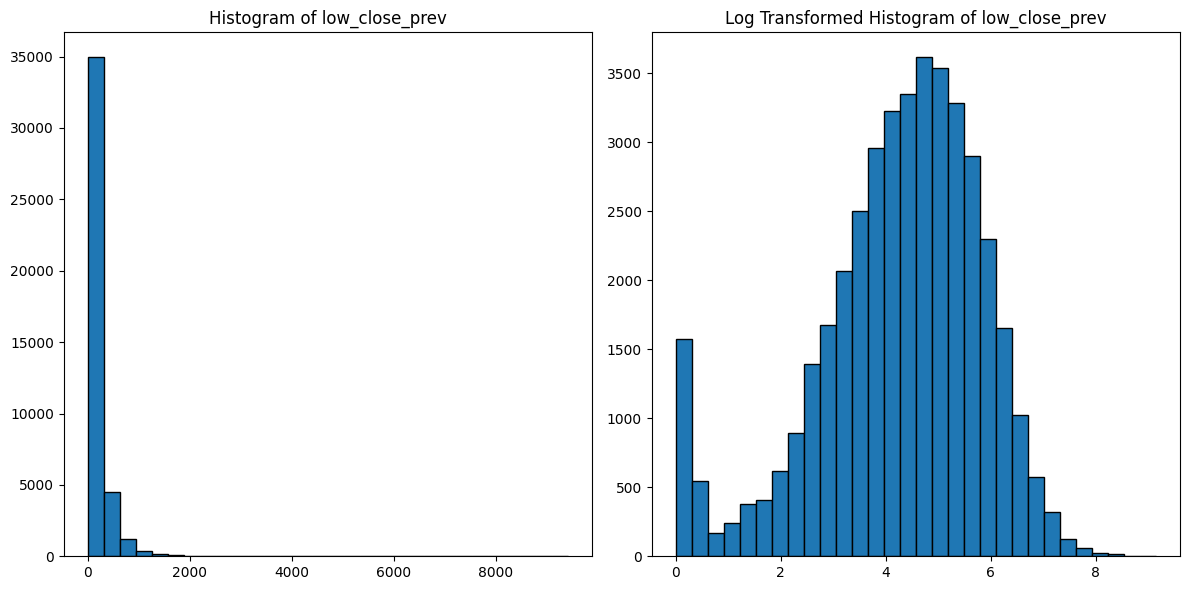

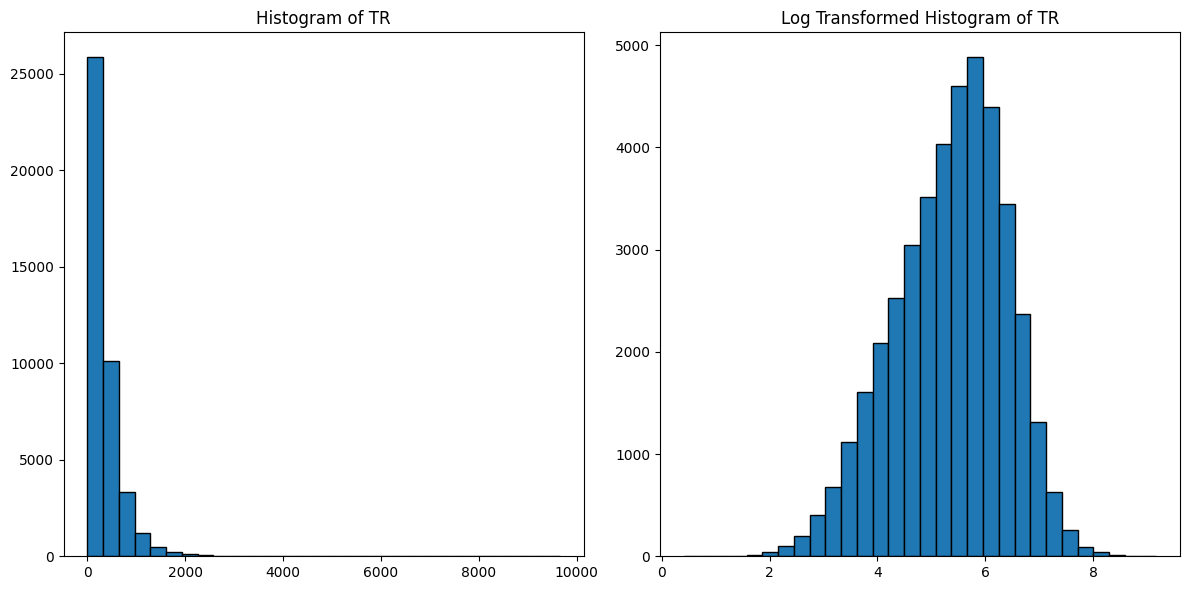

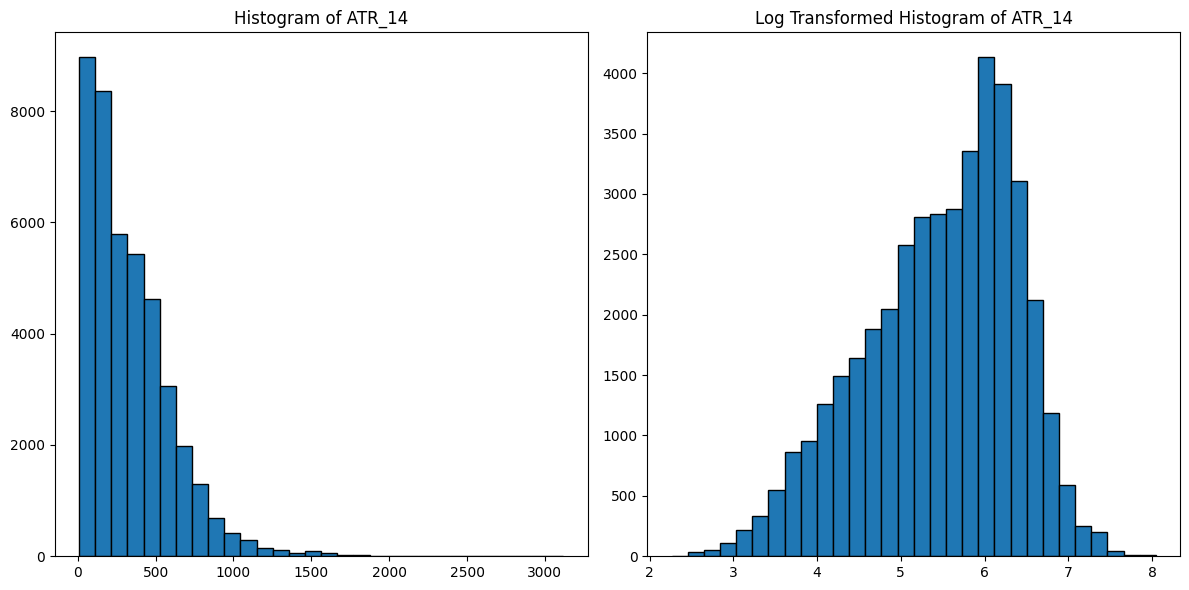

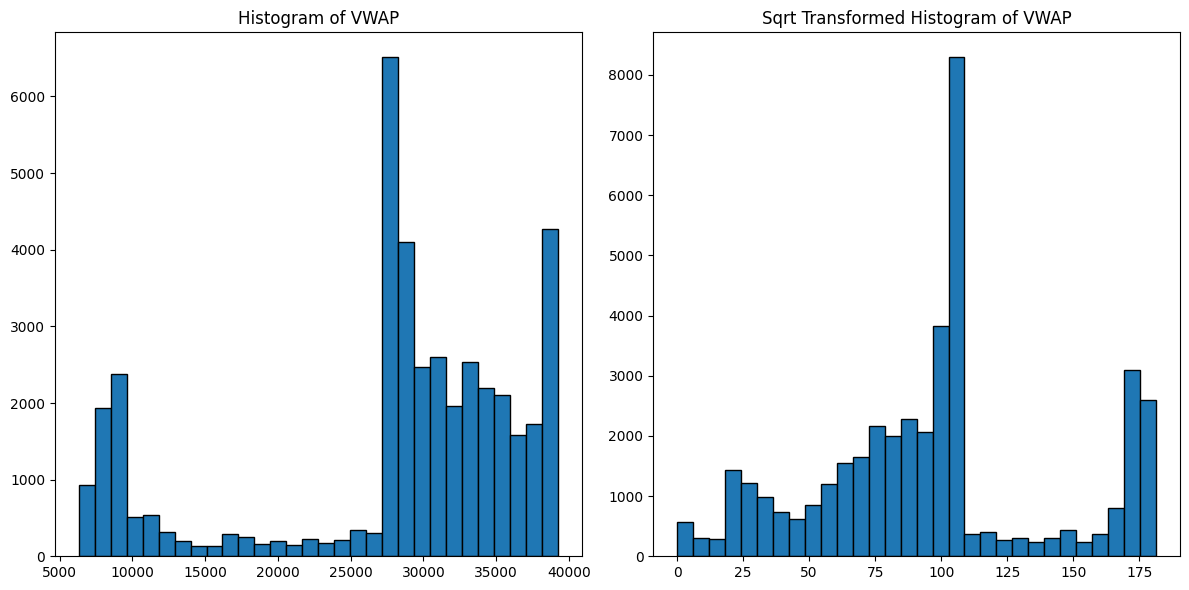

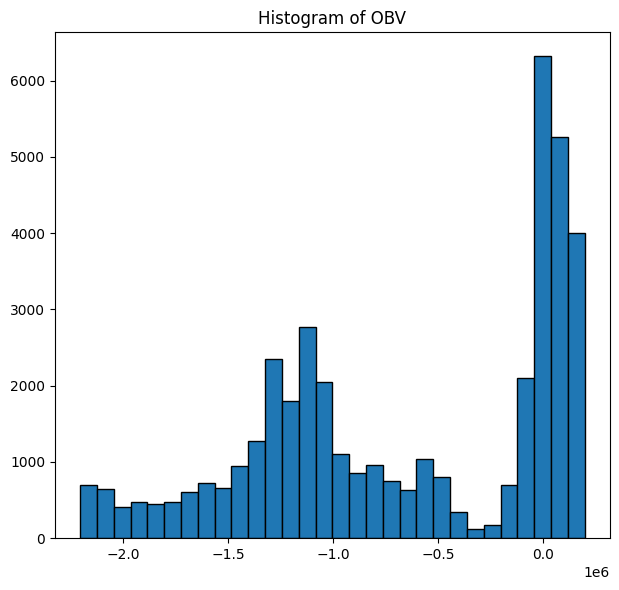

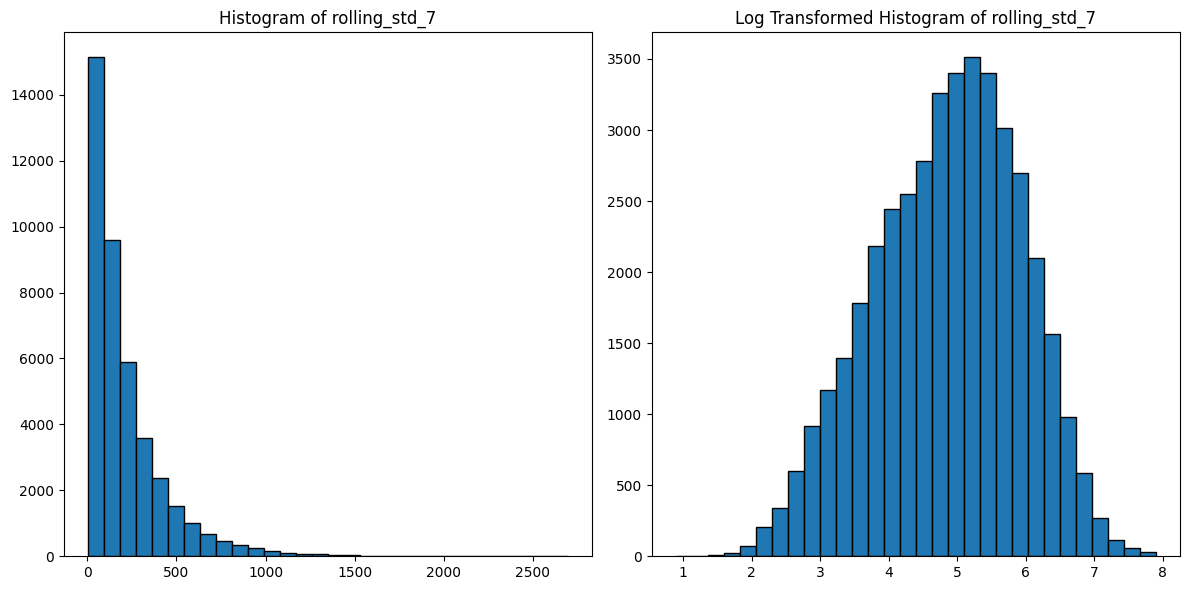

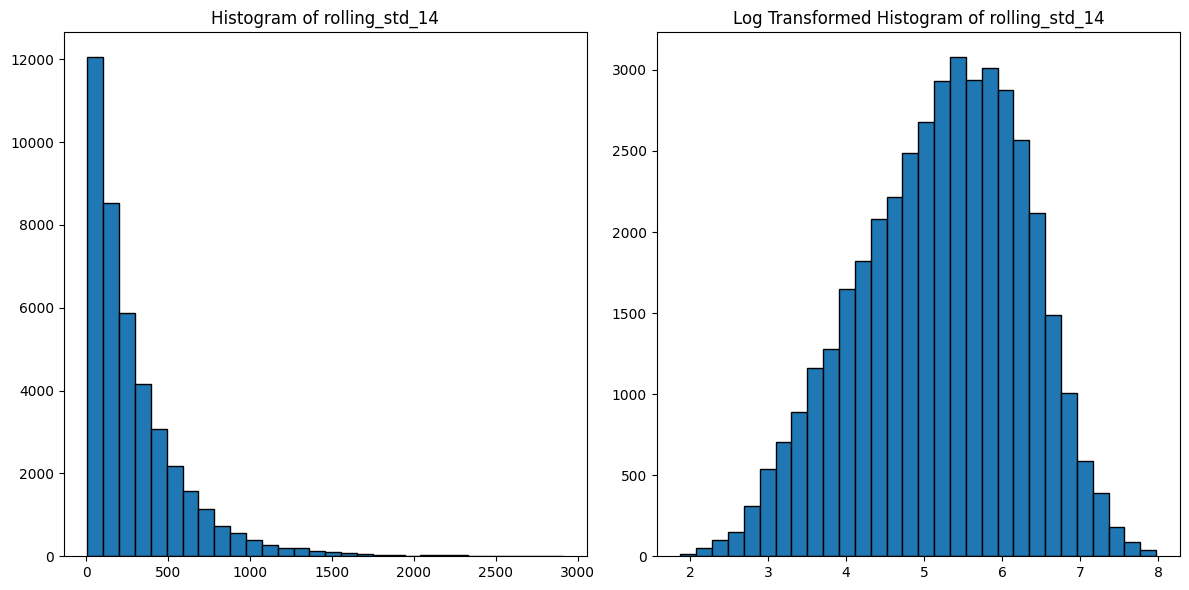

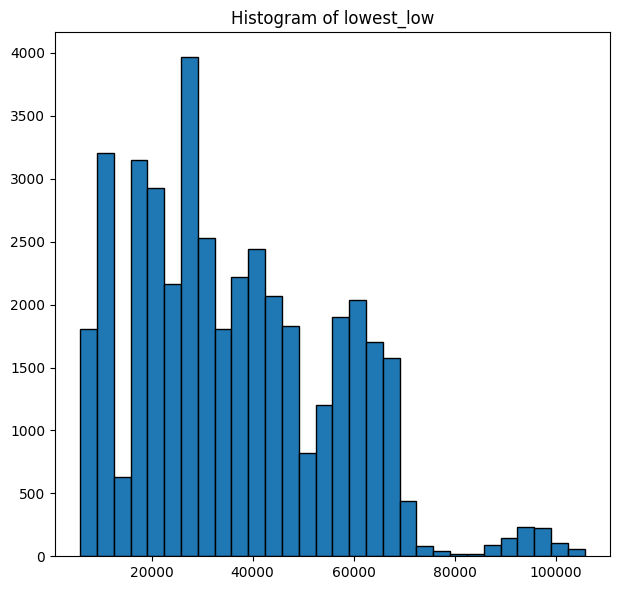

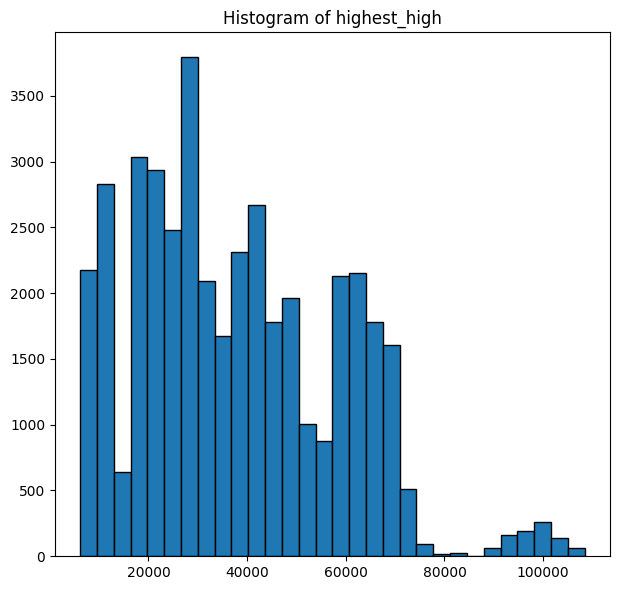

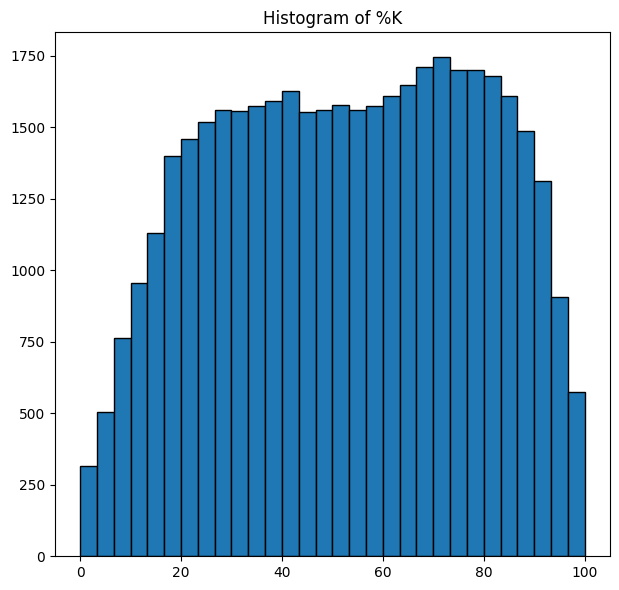

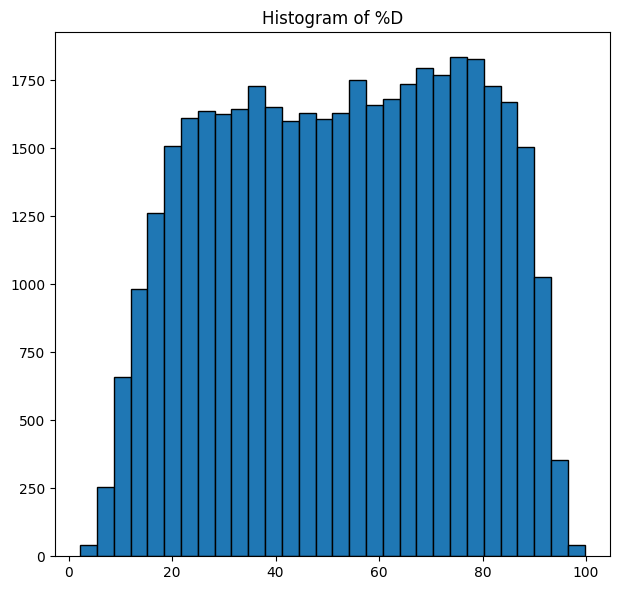

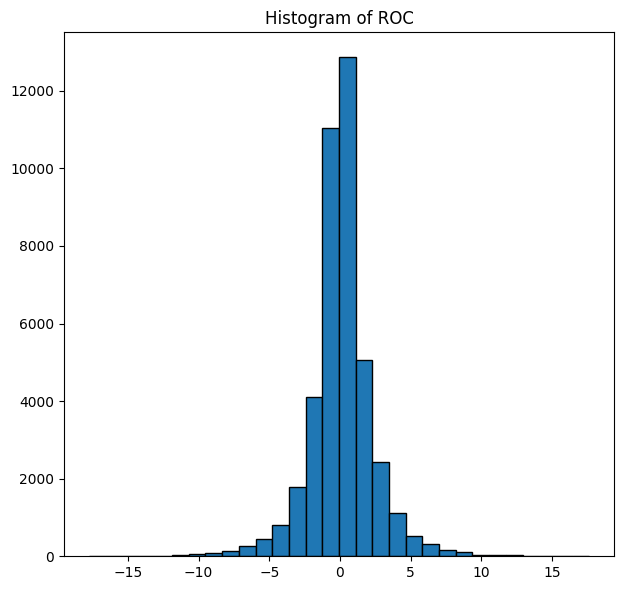

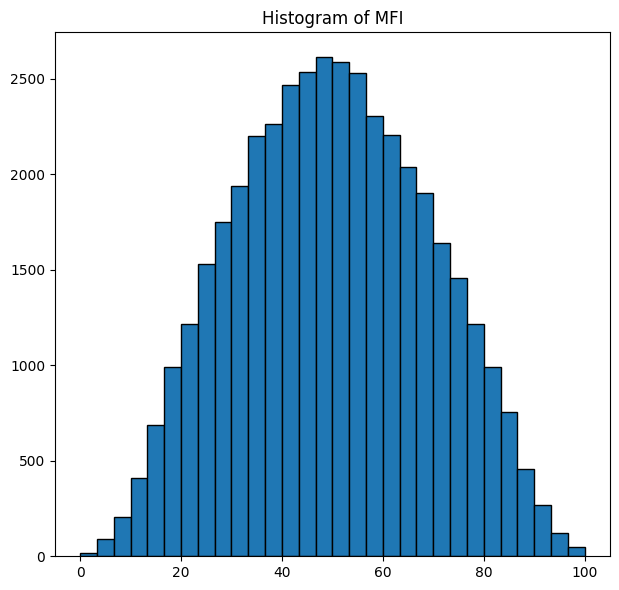

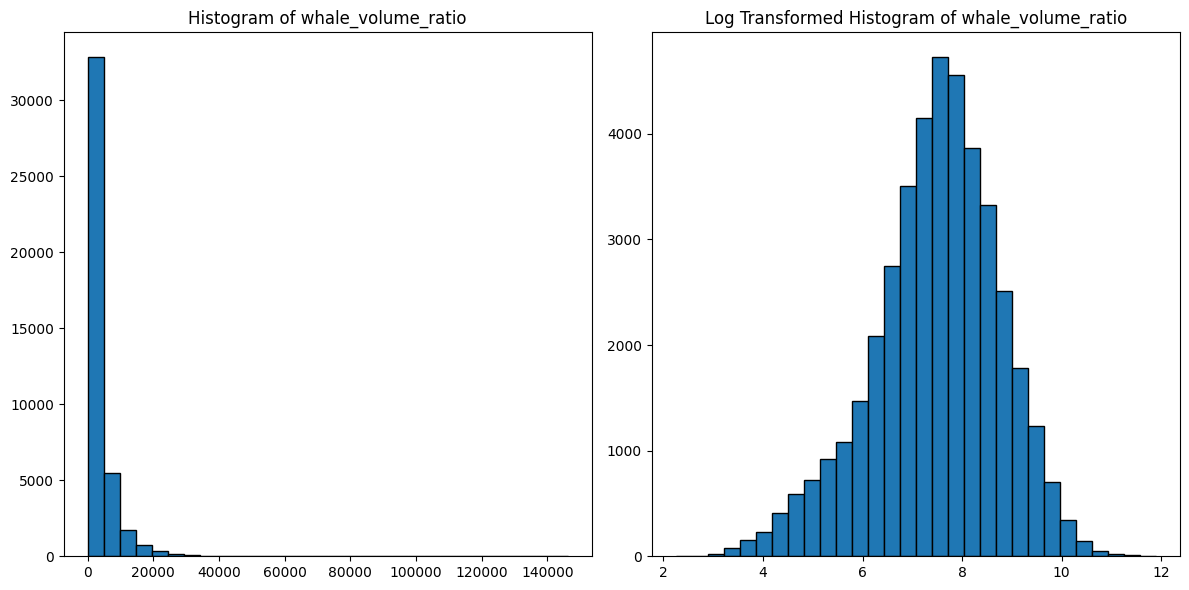

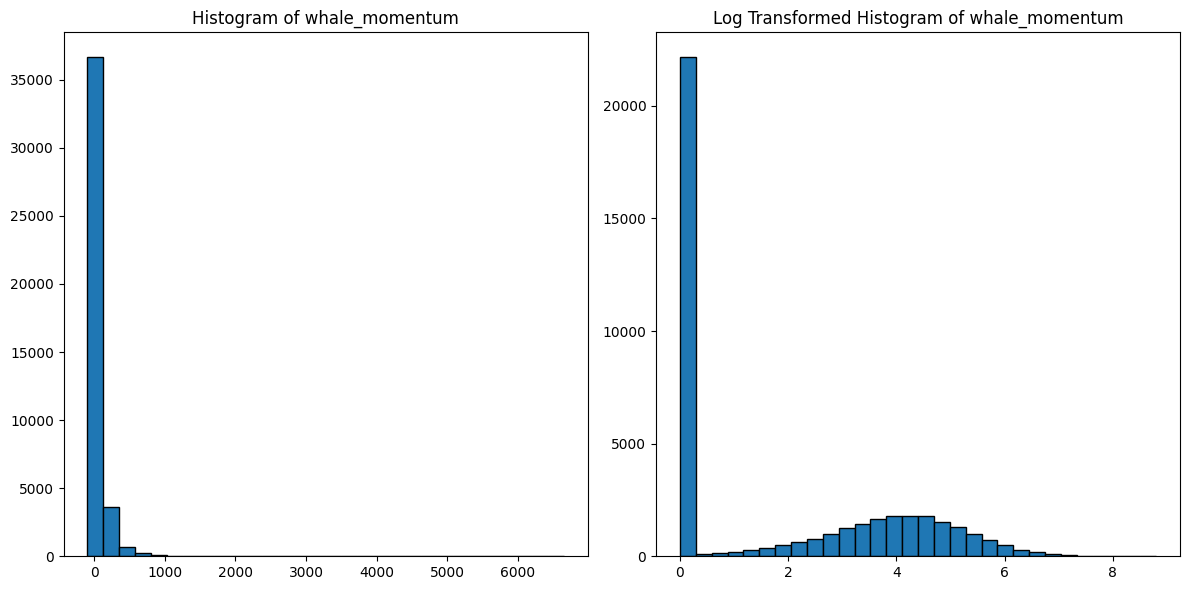

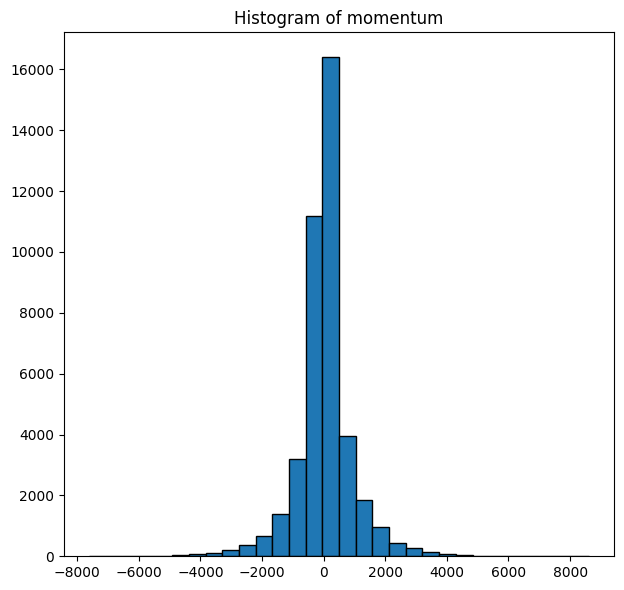

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df is your DataFrame
# Exclude non-numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate skewness for numerical columns
skewness = numerical_df.skew()
print("Skewness of numerical columns:")
print(skewness)

# Apply transformations based on skewness
for column in numerical_df.columns:
    if skewness[column] > 1:  # Highly positively skewed
        # Replace zero or negative values with a small positive number
        df[f'{column}_log'] = np.log1p(df[column].clip(lower=1e-9))
    elif skewness[column] < -1:  # Highly negatively skewed
        # Invert and apply square root transformation
        df[f'{column}_sqrt'] = np.sqrt(df[column].max() - df[column])

# Visualize the original and transformed data
for column in numerical_df.columns:
    plt.figure(figsize=(12, 6))

    # Original Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')

    # Transformed Histogram
    if f'{column}_log' in df.columns:
        plt.subplot(1, 2, 2)
        plt.hist(df[f'{column}_log'].dropna(), bins=30, edgecolor='k')
        plt.title(f'Log Transformed Histogram of {column}')
    elif f'{column}_sqrt' in df.columns:
        plt.subplot(1, 2, 2)
        plt.hist(df[f'{column}_sqrt'].dropna(), bins=30, edgecolor='k')
        plt.title(f'Sqrt Transformed Histogram of {column}')

    plt.tight_layout()
    plt.show()

In [8]:
df.columns

Index(['difficulty', 'estimated_leverage_ratio', 'addresses_count_active',
       'addresses_count_sender', 'addresses_count_receiver',
       'exchange_whale_ratio', 'coinbase_premium_gap',
       'coinbase_premium_index', 'coinbase_premium_gap_usdt_adjusted',
       'coinbase_premium_index_usdt_adjusted',
       ...
       'high_low_log', 'high_close_prev_log', 'low_close_prev_log', 'TR_log',
       'ATR_14_log', 'VWAP_sqrt', 'rolling_std_7_log', 'rolling_std_14_log',
       'whale_volume_ratio_log', 'whale_momentum_log'],
      dtype='object', length=109)

In [9]:
def remove_unnecessary_columns(df):
    # Columns to remove
    columns_to_remove = []

    # 1. Remove original columns that have transformed versions
    # Find columns that have _log or _sqrt versions
    transformed_pairs = []
    for col in df.columns:
        if '_log' in col or '_sqrt' in col:
            original_col = col.replace('_log', '').replace('_sqrt', '')
            if original_col in df.columns:
                transformed_pairs.append(original_col)

    columns_to_remove.extend(transformed_pairs)

    # 2. Remove price-related columns (except the target)
    price_columns = [
        'open_price',
        'high_price',
        'low_price',
        'close_price'
    ]
    columns_to_remove.extend(price_columns)

    # 3. Remove duplicate/redundant information
    duplicate_columns = [
        'taker_sell_ratio',  # Can be derived from taker_buy_ratio
        'coinbase_premium_index_usdt_adjusted',
        'coinbase_premium_gap_usdt_adjusted'
    ]
    columns_to_remove.extend(duplicate_columns)

    # 4. Create list of columns to keep
    columns_to_keep = [col for col in df.columns if col not in columns_to_remove]

    # Add back the target column if it was removed
    if 'price_change' not in columns_to_keep:
        columns_to_keep.append('price_change')

    # Print information about removed columns
    print(f"Removing {len(columns_to_remove)} columns:")
    for col in columns_to_remove:
        print(f"- {col}")

    print(f"\nKeeping {len(columns_to_keep)} columns:")
    for col in columns_to_keep:
        print(f"+ {col}")

    # Return cleaned DataFrame
    return df[columns_to_keep]

# Clean the DataFrame
df_cleaned = remove_unnecessary_columns(df)

Removing 44 columns:
- exchange_whale_ratio
- coinbase_premium_gap
- coinbase_premium_index
- coinbase_premium_gap_usdt_adjusted
- coinbase_premium_index_usdt_adjusted
- taker_buy_volume
- taker_sell_volume
- blockreward
- blockreward_usd
- fees_transaction_mean
- fees_transaction_mean_usd
- fees_transaction_median
- fees_transaction_median_usd
- addresses_count_inflow
- addresses_count_outflow
- transactions_count_inflow
- transactions_count_outflow
- tokens_transferred_total
- tokens_transferred_mean
- tokens_transferred_median
- transactions_count_inflow.1
- transactions_count_outflow.1
- long_liquidations
- short_liquidations
- long_liquidations_usd
- short_liquidations_usd
- volume
- high_low
- high_close_prev
- low_close_prev
- TR
- ATR_14
- VWAP
- rolling_std_7
- rolling_std_14
- whale_volume_ratio
- whale_momentum
- open_price
- high_price
- low_price
- close_price
- taker_sell_ratio
- coinbase_premium_index_usdt_adjusted
- coinbase_premium_gap_usdt_adjusted

Keeping 67 columns

## Data Normalization

### 🎯 4. Justification for Choosing Standard Scaling
#### Advantages of Standard Scaling:
- Broad Applicability: Effective across various models within the ensemble, ensuring consistency.
- Enhances Model Performance: Improves convergence speed for gradient-based algorithms and distance-based models.
- Simplicity: Easy to implement and interpret, reducing the risk of introducing preprocessing errors.

#### Why Not Other Techniques?
- Min-Max Scaling:

  - Pros: Excellent for models requiring scaled inputs within a specific range.
  - Cons: Sensitive to outliers, which might still be present even after data transformations.
  - Justification: While beneficial for certain models, Standard Scaling provides a more generalized approach suitable for the majority of models in the ensemble.

- Robust Scaling:

  - Pros: Exceptional handling of outliers.
  - Cons: Redundant if log/sqrt transformations have effectively reduced skewness and outliers.
  - Justification: Adds complexity without significant performance improvements.

In [10]:
from sklearn.preprocessing import StandardScaler

def split_and_normalize(df, target_column, window_size=30, test_size=0.2):
    # Sort the dataframe by time to maintain the temporal order
    df = df.sort_values('time').reset_index(drop=True)

    # Remove first window_size rows
    df = df.iloc[window_size:].reset_index(drop=True)

    exclude_columns = []

    # Split into features and target
    X = df.drop(columns=[target_column] + [col for col in df.columns if col in exclude_columns])
    y = df[target_column]

    # Split into training and testing sets
    split_index = int(len(df) * (1 - test_size))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # Initialize and fit scaler on training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame for convenience
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Usage
target_column = 'price_change'
X_train, X_test, y_train, y_test = split_and_normalize(df_cleaned, target_column, window_size=30)

## Feature Selection

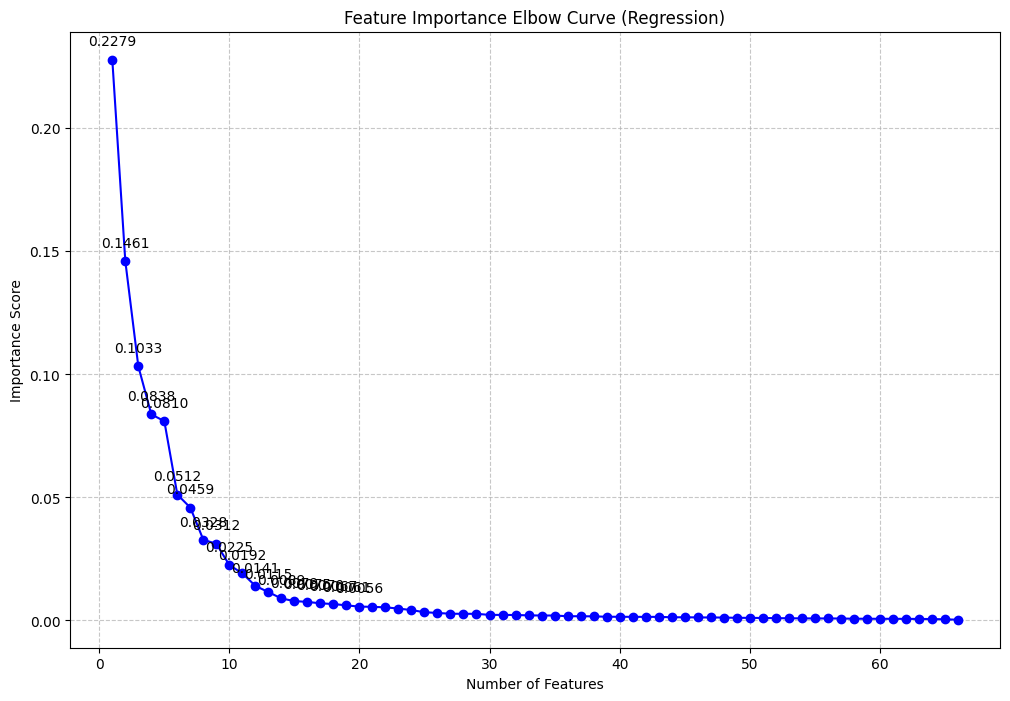


Feature Importance Scores (Top 20):
Feature 1: 0.2279
Feature 2: 0.1461
Feature 3: 0.1033
Feature 4: 0.0838
Feature 5: 0.0810
Feature 6: 0.0512
Feature 7: 0.0459
Feature 8: 0.0328
Feature 9: 0.0312
Feature 10: 0.0225
Feature 11: 0.0192
Feature 12: 0.0141
Feature 13: 0.0115
Feature 14: 0.0089
Feature 15: 0.0079
Feature 16: 0.0075
Feature 17: 0.0070
Feature 18: 0.0067
Feature 19: 0.0061
Feature 20: 0.0056


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_elbow_curve_regression(importance_scores):
    """
    Plot elbow curve for feature importance analysis
    """
    plt.figure(figsize=(12, 8))
    y = sorted(importance_scores, reverse=True)
    x = range(1, len(y) + 1)

    # Plot importance scores
    plt.plot(x, y, 'b-', marker='o')

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.title('Feature Importance Elbow Curve (Regression)')
    plt.xlabel('Number of Features')
    plt.ylabel('Importance Score')

    # Add value annotations for first 20 points
    for i in range(min(20, len(y))):
        plt.annotate(f'{y[i]:.4f}',
                    (x[i], y[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    plt.show()

    # Print importance scores for first 20 features
    print("\nFeature Importance Scores (Top 20):")
    for i in range(min(20, len(y))):
        print(f"Feature {i+1}: {y[i]:.4f}")

def get_feature_importance(X, y):
    """
    Train XGBoost regressor and get feature importance
    """
    # Train XGBoost
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        random_state=42
    )
    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # Plot elbow curve
    plot_elbow_curve_regression(feature_importance['importance'].values)

    return feature_importance

# Run initial feature importance analysis
feature_importance = get_feature_importance(X_train, y_train)


After viewing the elbow curve, enter the number of features to select: 12


<ipython-input-12-f7c5e2b71eab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=data,


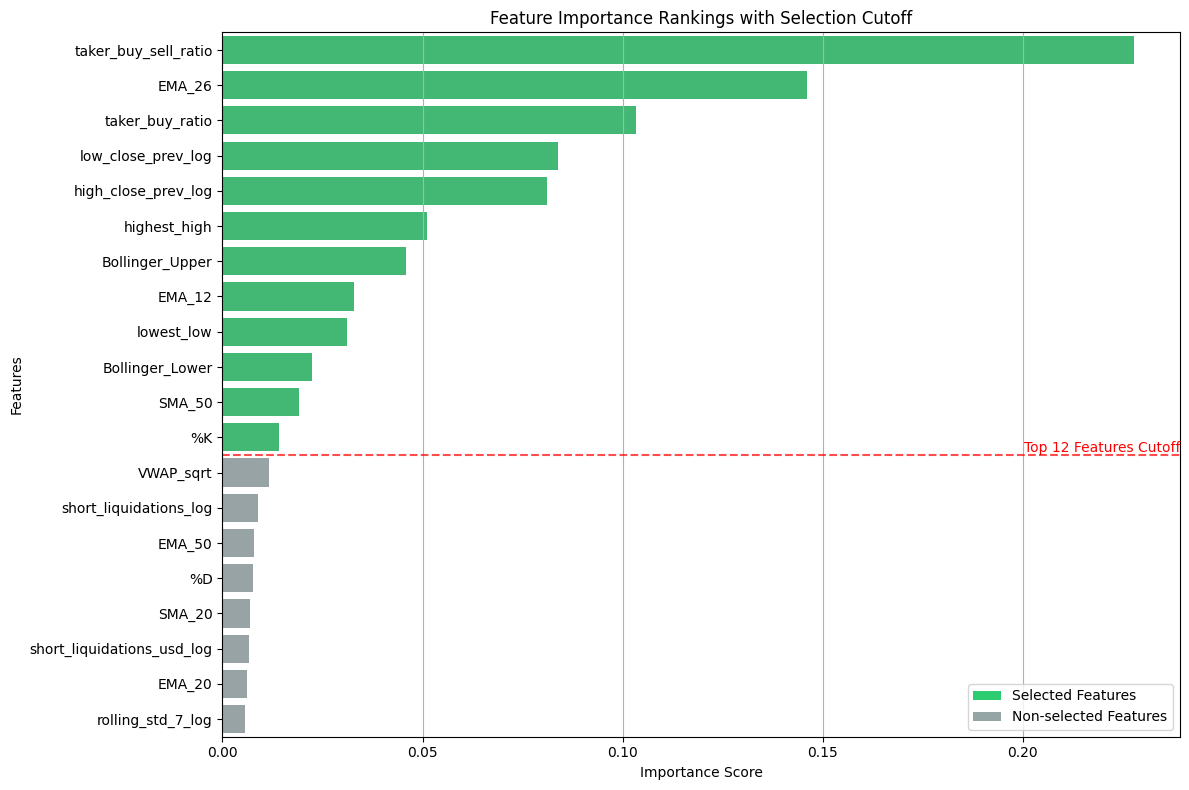


Selected top 12 features:
1. taker_buy_sell_ratio (Importance: 0.2279)
2. EMA_26 (Importance: 0.1461)
3. taker_buy_ratio (Importance: 0.1033)
4. low_close_prev_log (Importance: 0.0838)
5. high_close_prev_log (Importance: 0.0810)
6. highest_high (Importance: 0.0512)
7. Bollinger_Upper (Importance: 0.0459)
8. EMA_12 (Importance: 0.0328)
9. lowest_low (Importance: 0.0312)
10. Bollinger_Lower (Importance: 0.0225)
11. SMA_50 (Importance: 0.0192)
12. %K (Importance: 0.0141)


In [12]:
# After viewing the plots, you can select features with your chosen threshold
n_features = int(input("\nAfter viewing the elbow curve, enter the number of features to select: "))
top_features = feature_importance.head(n_features)['feature'].tolist()

# Plot feature importance with cutoff line
plt.figure(figsize=(12, 8))
data = feature_importance.head(20)  # Show top 20 features for better visualization

# Create color list based on cutoff
colors = ['#2ecc71' if i < n_features else '#95a5a6'
          for i in range(len(data))]  # Green for selected, Gray for non-selected

# Create barplot with custom colors
sns.barplot(x='importance', y='feature', data=data,
            palette=colors)

plt.title('Feature Importance Rankings with Selection Cutoff')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add vertical line after selected number of features
plt.axhline(y=n_features-0.5, color='r', linestyle='--', alpha=0.7)
plt.text(plt.xlim()[1], n_features-0.5, f'Top {n_features} Features Cutoff',
         verticalalignment='bottom', horizontalalignment='right',
         color='red')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='Selected Features'),
                  Patch(facecolor='#95a5a6', label='Non-selected Features')]
plt.legend(handles=legend_elements, loc='lower right')

plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Print selected features
print(f"\nSelected top {n_features} features:")
for i, feature in enumerate(top_features, 1):
    importance_value = feature_importance[feature_importance['feature'] == feature]['importance'].values[0]
    print(f"{i}. {feature} (Importance: {importance_value:.4f})")

# Create final datasets with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

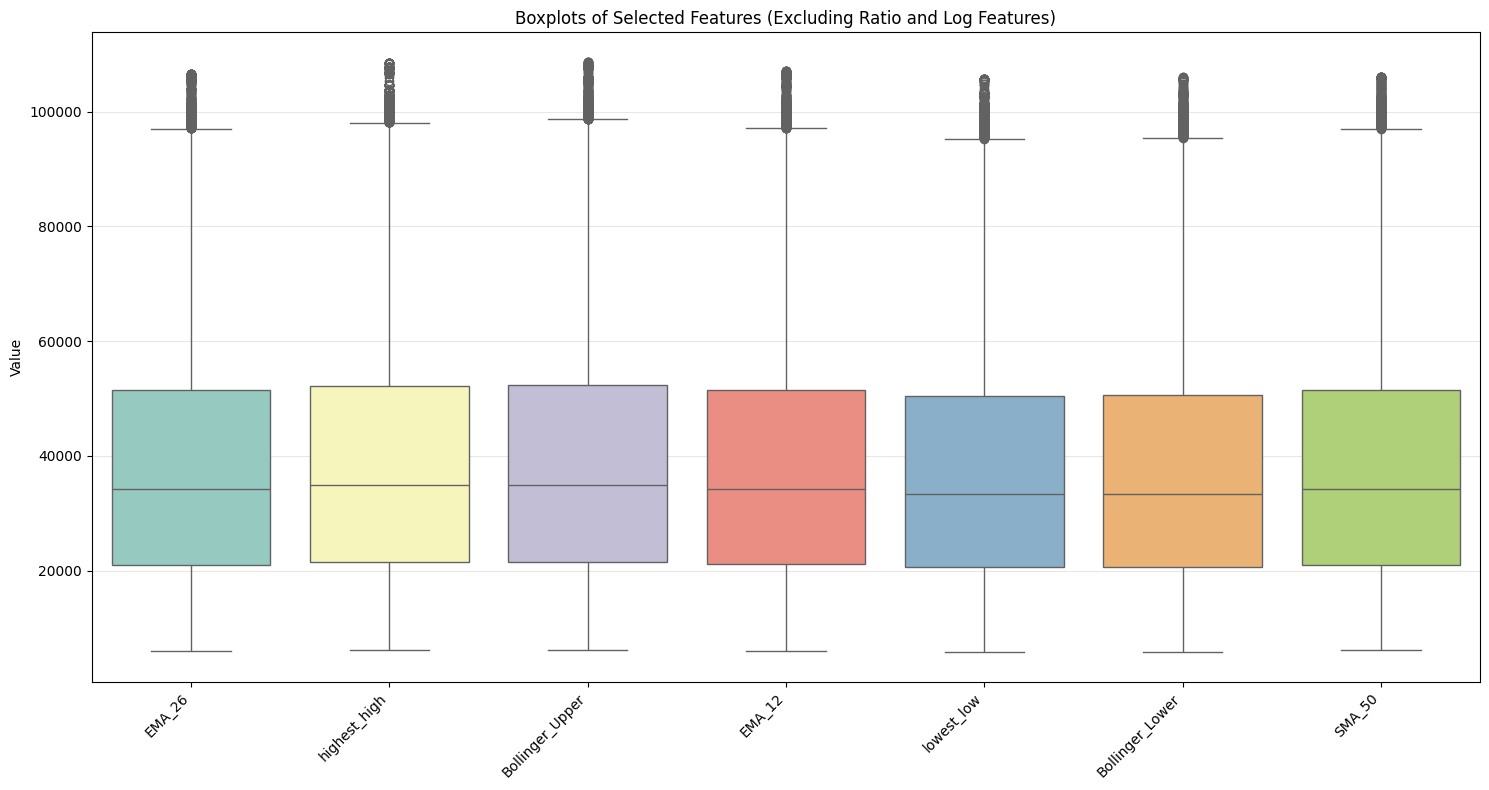


Detailed Outlier Analysis:

Feature: EMA_26
--------------------------------------------------
Total number of outliers: 407 (0.98% of data)
Lower outliers: 0 (0.00% of data)
Upper outliers: 407 (0.98% of data)
Outlier boundaries: [-24535.96, 97063.93]

Outlier Statistics:
Minimum outlier value: 97065.32
Maximum outlier value: 106591.87
Mean of outliers: 100171.45
Median of outliers: 99701.46

Basic Statistics:
Mean: 37173.14
Median: 34233.56
Standard Deviation: 20043.34
Skewness: 0.60
Kurtosis: -0.04

Feature: highest_high
--------------------------------------------------
Total number of outliers: 467 (1.13% of data)
Lower outliers: 0 (0.00% of data)
Upper outliers: 467 (1.13% of data)
Outlier boundaries: [-24504.55, 98094.25]

Outlier Statistics:
Minimum outlier value: 98152.70
Maximum outlier value: 108421.60
Mean of outliers: 101446.49
Median of outliers: 100596.40

Basic Statistics:
Mean: 37840.06
Median: 34913.20
Standard Deviation: 20402.10
Skewness: 0.60
Kurtosis: -0.05

Feat

In [63]:
# Create a list of features to plot (excluding the specified ones)
features_to_plot = [feature for feature in top_features
                   if feature not in ['taker_buy_sell_ratio', 'taker_buy_ratio',
                                    'low_close_prev_log', 'high_close_prev_log', '%K']]

# Create boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features_to_plot], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of Selected Features (Excluding Ratio and Log Features)')
plt.ylabel('Value')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display outlier statistics
print("\nDetailed Outlier Analysis:")
print("=" * 80)

for feature in features_to_plot:
    # Calculate quartiles and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    lower_outliers = df[df[feature] < lower_bound][feature]
    upper_outliers = df[df[feature] > upper_bound][feature]

    print(f"\nFeature: {feature}")
    print("-" * 50)
    print(f"Total number of outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}% of data)")
    print(f"Lower outliers: {len(lower_outliers)} ({(len(lower_outliers)/len(df)*100):.2f}% of data)")
    print(f"Upper outliers: {len(upper_outliers)} ({(len(upper_outliers)/len(df)*100):.2f}% of data)")
    print(f"Outlier boundaries: [{lower_bound:.2f}, {upper_bound:.2f}]")

    if len(outliers) > 0:
        print("\nOutlier Statistics:")
        print(f"Minimum outlier value: {outliers.min():.2f}")
        print(f"Maximum outlier value: {outliers.max():.2f}")
        print(f"Mean of outliers: {outliers.mean():.2f}")
        print(f"Median of outliers: {outliers.median():.2f}")

    # Calculate basic statistics
    print("\nBasic Statistics:")
    print(f"Mean: {df[feature].mean():.2f}")
    print(f"Median: {df[feature].median():.2f}")
    print(f"Standard Deviation: {df[feature].std():.2f}")
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Kurtosis: {df[feature].kurtosis():.2f}")

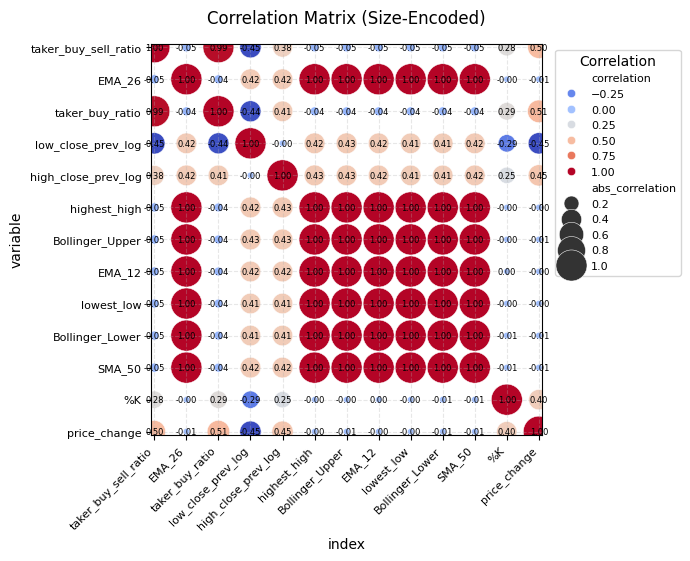

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert correlation matrix to long format
corr_matrix = df[top_features + ['price_change']].corr()
corr_df = corr_matrix.reset_index().melt(id_vars='index', var_name='variable', value_name='correlation')
corr_df['abs_correlation'] = abs(corr_df['correlation'])

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# Create the scatter plot
sns.scatterplot(data=corr_df,
                x='index',
                y='variable',
                size='abs_correlation',
                hue='correlation',
                palette='coolwarm',
                sizes=(20, 500),
                legend='brief',
                ax=ax)

# Add correlation values as annotations
for _, row in corr_df.iterrows():
    ax.text(row['index'], row['variable'],
            f'{row["correlation"]:.2f}',
            ha='center', va='center',
            size=6)

# Customize the plot
ax.set_title('Correlation Matrix (Size-Encoded)', pad=15, size=12)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', size=8)
ax.set_yticklabels(corr_matrix.columns, size=8)

# Make plot square and adjust limits
ax.set_aspect('equal')
margin = 0.1  # Adjust this value to control spacing
ax.set_xlim(-margin, len(corr_matrix.columns) - 1 + margin)
ax.set_ylim(len(corr_matrix.columns) - 1 + margin, -margin)

# Adjust legend
ax.legend(title='Correlation',
         bbox_to_anchor=(1.02, 1),
         loc='upper left',
         fontsize=8)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

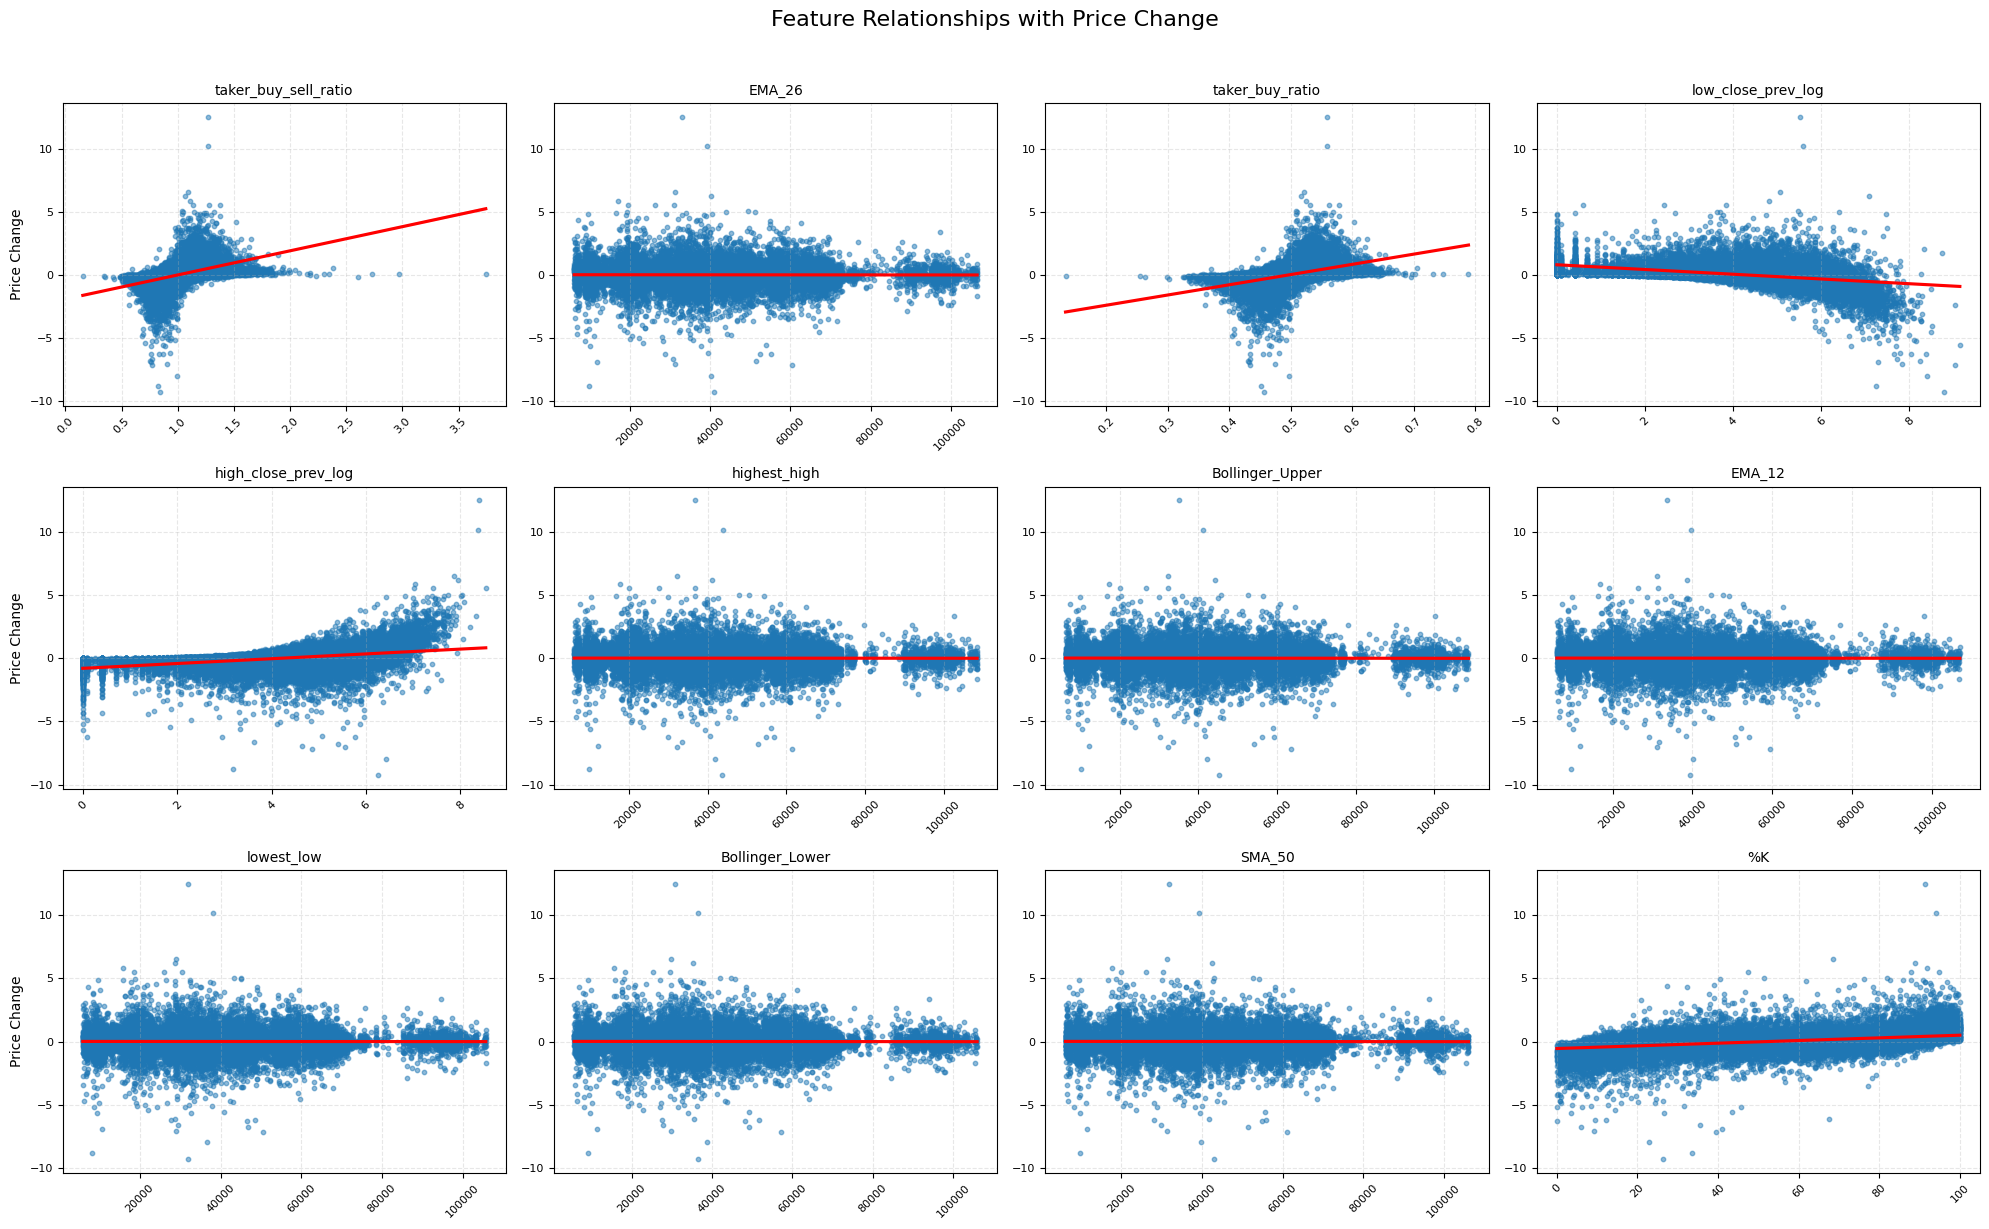

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate optimal grid layout
n_features = len(top_features)
n_cols = min(4, n_features)  # Maximum 4 columns
n_rows = math.ceil(n_features / n_cols)
n_plots = n_features

# Calculate figure size
width_per_plot = 5
height_per_plot = 4
fig_width = width_per_plot * n_cols
fig_height = height_per_plot * n_rows

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
fig.suptitle('Feature Relationships with Price Change', fontsize=16, y=1.02)

# Handle single row case
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Create plots
for i, feature in enumerate(top_features):
    if i < n_plots:
        # Create regression plot
        sns.regplot(data=df,
                   x=feature,
                   y='price_change',
                   ax=axes_flat[i],
                   scatter_kws={'alpha':0.5, 's':10},
                   line_kws={'color': 'red'},
                   scatter=True)

        # Customize each subplot
        axes_flat[i].set_title(feature, fontsize=10)
        axes_flat[i].tick_params(labelsize=8)
        axes_flat[i].set_xlabel('')
        axes_flat[i].set_ylabel('Price Change' if i % n_cols == 0 else '')
        axes_flat[i].tick_params(axis='x', rotation=45)

        # Add grid
        axes_flat[i].grid(True, linestyle='--', alpha=0.3)

# Remove empty subplots
for i in range(n_plots, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Adjust layout
plt.tight_layout()
plt.show()

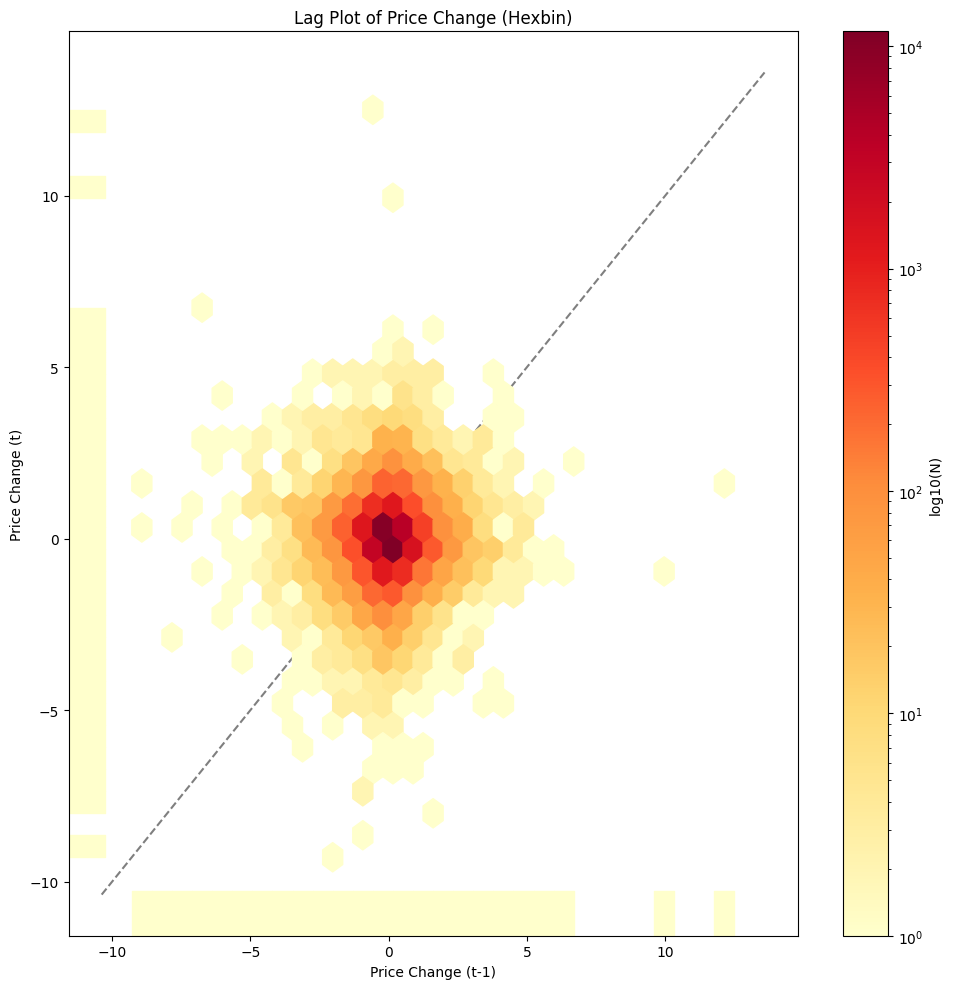

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create lag values
price_change = df['price_change']
price_change_lag = price_change.shift(1)

# Create hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(x=price_change_lag,
          y=price_change,
          gridsize=30,           # Number of hexagons in each direction
          cmap='YlOrRd',        # Color map
          mincnt=1,             # Minimum number of points in a hex
          bins='log',           # Use log scale for coloring
          marginals=True)       # Show marginal distributions

plt.colorbar(label='log10(N)')
plt.xlabel('Price Change (t-1)')
plt.ylabel('Price Change (t)')
plt.title('Lag Plot of Price Change (Hexbin)')

# Add diagonal reference line
ax = plt.gca()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
plt.plot(lims, lims, 'k--', alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import shap
import matplotlib.pyplot as plt
import seaborn as sns

class TimeSeriesWindowPredictor:
    def __init__(self, window_size=30):
        self.window_size = window_size
        self.scaler = StandardScaler()
        self.best_params = None
        self.best_score = None

        # Initialize models
        self.models = {
            'xgb': xgb.XGBRegressor(
                objective='reg:squarederror',
                random_state=42
            )
        }

        # Parameter distributions for random search
        self.param_distributions = {
            'xgb': {
                'n_estimators': randint(50, 200),
                'max_depth': randint(3, 8),
                'learning_rate': uniform(0.01, 0.1),
                'min_child_weight': randint(1, 5),
                'subsample': uniform(0.6, 0.4),
                'colsample_bytree': uniform(0.6, 0.4),
                'gamma': uniform(0, 0.4)
            }
        }

        self.fitted_models = {}
        self.shap_explainers = {}

    def create_window_sequences(self, df, top_features):
        """
        Create sequences using sliding window approach, excluding first window_size rows
        """
        sequences = []
        targets = []

        # Use only selected features
        data = df[top_features].values
        targets_data = df['price_change'].values

        # Start from window_size to exclude incomplete data
        for i in range(self.window_size, len(df) - self.window_size):
            # Get window of data
            window = data[i:(i + self.window_size)]
            # Get target (next time step's price change)
            target = targets_data[i + self.window_size]

            # Flatten the window
            sequences.append(window.flatten())
            targets.append(target)

        return np.array(sequences), np.array(targets)

    def prepare_data(self, df, top_features):
        """
        Prepare data with sliding window approach and scaling
        """
        # Create sequences
        X, y = self.create_window_sequences(df, top_features)

        # Scale the features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, y

    def optimize_model(self, X_train, y_train, model_type='xgb', n_iter=100, cv=5):
        """
        Optimize model using random search CV
        """
        print(f"\nOptimizing {model_type} model...")

        # Create time series split
        def time_series_split(X, n_splits):
            n_samples = len(X)
            k_fold_size = n_samples // n_splits
            indices = np.arange(n_samples)

            for i in range(n_splits):
                if i == n_splits - 1:
                    test_start = k_fold_size * i
                    test_end = n_samples
                else:
                    test_start = k_fold_size * i
                    test_end = k_fold_size * (i + 1)

                train_start = 0
                train_end = test_start

                train_indices = indices[train_start:train_end]
                test_indices = indices[test_start:test_end]

                yield train_indices, test_indices

        # Define parameter grid for XGBoost
        if model_type == 'xgb':
            param_grid = {
                'n_estimators': randint(50, 200),
                'max_depth': randint(3, 8),
                'learning_rate': uniform(0.01, 0.1),
                'min_child_weight': randint(1, 5),
                'subsample': uniform(0.6, 0.4),
                'colsample_bytree': uniform(0.6, 0.4),
                'gamma': uniform(0, 0.4)
            }

            # Create base model
            base_model = xgb.XGBRegressor(
                objective='reg:squarederror',
                random_state=42,
                tree_method='hist'  # Add this parameter
            )
        else:
            raise ValueError("Currently only 'xgb' model type is supported")

        ts_cv = list(time_series_split(X_train, n_splits=cv))

        try:
            # Initialize random search
            random_search = RandomizedSearchCV(
                estimator=base_model,
                param_distributions=param_grid,
                n_iter=n_iter,
                cv=ts_cv,
                scoring='neg_mean_squared_error',
                random_state=42,
                n_jobs=-1,
                verbose=2
            )

            # Fit random search
            random_search.fit(X_train, y_train)

            # Store best parameters and score
            self.best_params = random_search.best_params_
            self.best_score = random_search.best_score_

            # Update model with best parameters
            self.models[model_type] = random_search.best_estimator_

            print("\nBest parameters:")
            for param, value in self.best_params.items():
                print(f"{param}: {value}")
            print(f"\nBest score (neg_mean_squared_error): {self.best_score}")

            return self.models[model_type]

        except Exception as e:
            print(f"Error during optimization: {str(e)}")
            print("Falling back to default parameters...")
            return self.models[model_type]

    def fit(self, X_train, y_train, optimize=False):
        """
        Fit all models with optional optimization
        """
        for name, model in self.models.items():
            print(f"\nTraining {name} model...")

            if optimize:
                model = self.optimize_model(X_train, y_train, model_type=name)

            self.fitted_models[name] = model.fit(X_train, y_train)

            # Create SHAP explainer
            if name in ['xgb', 'rf', 'gb']:
                self.shap_explainers[name] = shap.TreeExplainer(model)

    def predict(self, X_test):
        """
        Make predictions using all models
        """
        predictions = {}
        for name, model in self.fitted_models.items():
            predictions[name] = model.predict(X_test)

        # Ensemble prediction (simple average)
        predictions['ensemble'] = np.mean(list(predictions.values()), axis=0)

        return predictions

    def predict_position(self, X_test, buy_threshold=0.01, sell_threshold=-0.01):
        """
        Predict trading positions based on price change predictions.
        """
        # Get the ensemble prediction
        prediction = self.predict(X_test)['ensemble']

        # Convert predictions to positions
        position = np.zeros_like(prediction)  # Initialize with holds (0)
        position[prediction >= buy_threshold] = 1  # Buy signals
        position[prediction <= sell_threshold] = -1  # Sell signals

        return position

    def explain_predictions(self, X_test, feature_names):
        """
        Generate SHAP explanations
        """
        shap_values = {}

        for name, explainer in self.shap_explainers.items():
            print(f"\nGenerating SHAP values for {name}...")
            shap_values[name] = explainer.shap_values(X_test)

            # Summary plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values[name], X_test,
                            feature_names=feature_names,
                            show=False)
            plt.title(f'SHAP Summary Plot - {name}')
            plt.tight_layout()
            plt.show()

            # Bar plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values[name], X_test,
                            feature_names=feature_names,
                            plot_type="bar",
                            show=False)
            plt.title(f'SHAP Feature Importance - {name}')
            plt.tight_layout()
            plt.show()

        return shap_values

    def get_feature_importance(self, feature_names):
        """
        Get feature importance for each model
        """
        importance_dict = {}

        for name, model in self.fitted_models.items():
            if hasattr(model, 'feature_importances_'):
                importance = pd.DataFrame({
                    'feature': feature_names,
                    'importance': model.feature_importances_
                })
                importance = importance.sort_values('importance', ascending=False)
                importance_dict[name] = importance

                # Plot feature importance
                plt.figure(figsize=(10, 6))
                plt.bar(importance['feature'], importance['importance'])
                plt.xticks(rotation=45, ha='right')
                plt.title(f'Feature Importance - {name}')
                plt.tight_layout()
                plt.show()

        return importance_dict

In [20]:
class TimeSeriesAnalysis:
    def __init__(self, window_size=30, test_size=0.2, initial_capital=1.0):
        self.window_size = window_size
        self.test_size = test_size
        self.initial_capital = initial_capital
        self.model = TimeSeriesWindowPredictor(window_size=window_size)
        self.feature_names = None
        self.top_features = None
        self.predictions = None
        self.shap_values = None
        self.y_test = None
        self.results = None
        self.best_params = None
        self.best_score = None

    def create_feature_names(self, top_features):
        """Create feature names for the windowed data"""
        feature_names = []
        for i in range(self.window_size):
            for feature in top_features:
                feature_names.append(f'{feature}_t-{self.window_size-i}')
        return feature_names

    def run_analysis(self, df, top_features, optimize=True, n_iter=100, cv=5):
        """Run complete analysis including model optimization, training and evaluation"""
        self.top_features = top_features
        self.feature_names = self.create_feature_names(top_features)

        # Prepare windowed data
        X, y = self.model.prepare_data(df, top_features)

        # Split data into train and test
        split_idx = int(len(X) * (1 - self.test_size))
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, self.y_test = y[:split_idx], y[split_idx:]

        try:
            if optimize:
                print("\nPerforming hyperparameter optimization...")
                self.model.optimize_model(X_train, y_train, n_iter=n_iter, cv=cv)
                print("\nOptimization completed.")

            # Fit model
            self.model.fit(X_train, y_train, optimize=False)

            # Make predictions
            self.predictions = self.model.predict(X_test)

            # Generate SHAP explanations
            self.shap_values = self.model.explain_predictions(X_test, self.feature_names)

            # Plot Feature Importance
            self._analyze_temporal_importance()
            self._plot_predictions()

            # Print model performance
            self._print_model_performance()

            return self.model, self.predictions, self.shap_values, self.y_test

        except Exception as e:
            print(f"Error during analysis: {str(e)}")
            return None, None, None, None

    def calculate_trading_metrics(self, df_cleaned, buy_threshold=0.01, sell_threshold=-0.01):
        """Calculate trading metrics and returns"""
        # Create windowed data for prediction
        X_windowed = self._create_windows(df_cleaned)
        X_windowed_scaled = self.model.scaler.transform(X_windowed)

        # Initialize results DataFrame
        self.results = df_cleaned.copy()
        self.results = self.results.iloc[self.window_size:]  # Remove first window_size rows

        # Calculate positions and metrics
        self.results['position'] = self.model.predict_position(
            X_windowed_scaled,
            buy_threshold=buy_threshold,
            sell_threshold=sell_threshold
        )

        # Calculate trading metrics
        self._calculate_trading_statistics()

        # Plot results
        self._plot_trading_results()

        return self.results

    def optimize_thresholds(self, df_cleaned, threshold_range=np.arange(0.01, 0.5, 0.05)):
        """
        Optimize buy/sell thresholds using grid search
        """
        best_sharpe = -np.inf
        best_thresholds = (0.01, -0.01)

        results = []
        for threshold in threshold_range:
            buy_threshold = threshold
            sell_threshold = -threshold

            print("----------------------------------------")
            print("Buy Threshold: " + str(buy_threshold))
            print("Sell Threshold: " + str(sell_threshold))
            print("----------------------------------------")

            # Calculate metrics for these thresholds
            self.calculate_trading_metrics(df_cleaned, buy_threshold, sell_threshold)

            # Calculate Sharpe ratio
            returns = self.results['returns']
            sharpe = returns.mean() / returns.std() * np.sqrt(365 * 24)

            results.append({
                'threshold': threshold,
                'sharpe': sharpe,
                'total_return': (self.results['cumulative_equity'].iloc[-1] - self.initial_capital) / self.initial_capital,
                'max_drawdown': self.results['drawdown_pct'].min()
            })

            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_thresholds = (buy_threshold, sell_threshold)

        # Plot optimization results
        results_df = pd.DataFrame(results)
        fig, ax1 = plt.subplots(figsize=(10, 6))

        ax1.plot(results_df['threshold'], results_df['sharpe'], 'b-', label='Sharpe Ratio')
        ax1.set_xlabel('Threshold')
        ax1.set_ylabel('Sharpe Ratio', color='b')
        ax1.tick_params(axis='y', labelcolor='b')

        ax2 = ax1.twinx()
        ax2.plot(results_df['threshold'], results_df['total_return'], 'r-', label='Total Return')
        ax2.set_ylabel('Total Return', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        plt.title('Threshold Optimization Results')
        plt.tight_layout()
        plt.show()

        print(f"\nBest thresholds found: Buy = {best_thresholds[0]:.3f}, Sell = {best_thresholds[1]:.3f}")
        print(f"Best Sharpe ratio: {best_sharpe:.2f}")
        print(f"Total Return at best threshold: {results_df.loc[results_df['sharpe'].idxmax(), 'total_return'] * 100:.2f}%")
        print(f"Max Drawdown at best threshold: {results_df.loc[results_df['sharpe'].idxmax(), 'max_drawdown'] * 100:.2f}%")

        return best_thresholds, results_df

    def _create_windows(self, df):
        """Create windowed data structure"""
        windows = []
        for i in range(len(df) - self.window_size):
            window = df[self.top_features].iloc[i:(i + self.window_size)].values
            windows.append(window.flatten())
        return np.array(windows)

    def _calculate_trading_statistics(self):
        """Calculate trading statistics and metrics with trading fees for hourly data"""
        # Calculate position changes
        self.results['position_change'] = self.results['position'].diff()

        # Calculate number of trades
        self.results['trades'] = 0
        self.results.loc[abs(self.results['position_change']) == 2, 'trades'] = 2
        self.results.loc[abs(self.results['position_change']) == 1, 'trades'] = 1

        # Calculate trading fees (0.02% per trade)
        self.results['fees'] = self.results['trades'] * 0.0002

        # Calculate PnL using the correct formula (positions.shift(1) * price_change)
        self.results['pnl'] = (self.results['position'].shift(1) - self.results['fees']) * self.results['price_change']

        # Calculate cumulative equity
        self.results['cumulative_equity'] = self.initial_capital + self.results['pnl'].cumsum()

        # Calculate returns and drawdown
        self.results['returns'] = self.results['pnl'] / self.results['cumulative_equity'].shift(1)
        self.results['drawdown'] = self.results['cumulative_equity'] - self.results['cumulative_equity'].cummax()
        self.results['drawdown_pct'] = self.results['drawdown'] / self.results['cumulative_equity'].cummax()

        # Calculate trading metrics
        total_trades = self.results['trades'].sum()
        total_hours = len(self.results)
        trades_per_hour = total_trades / total_hours

        # Calculate annualized Sharpe ratio for hourly data
        hourly_sharpe = (self.results['returns'].mean() / self.results['returns'].std() * np.sqrt(365 * 24))

        # Calculate profit factor
        profit_factor = abs(self.results['pnl'][self.results['pnl'] > 0].sum() /
                          self.results['pnl'][self.results['pnl'] < 0].sum())

        print("\nTrading Statistics:")
        print(f"Total Return: {(self.results['cumulative_equity'].iloc[-1] - self.initial_capital) / self.initial_capital:.2f}%")
        print(f"Sharpe Ratio (Annualized): {hourly_sharpe:.2f}")
        print(f"Max Drawdown: {self.results['drawdown_pct'].min():.2f}%")
        print(f"Win Rate: {(self.results['pnl'] > 0).mean() * 100:.2f}%")
        print(f"Total Number of Trades: {total_trades:.0f}")
        print(f"Total Trading Fees: {self.results['fees'].sum():.4f}")
        print(f"Trading Period (hours): {total_hours}")
        print(f"Trades per Hour: {trades_per_hour:.4f}")
        print(f"Profit Factor: {profit_factor:.2f}")

    def _plot_predictions(self):
        """Plot predictions vs actual values"""
        plt.figure(figsize=(15, 6))

        # Plot actual values
        plt.plot(self.y_test, label='Actual', color='black', alpha=0.7)

        # Plot predictions for each model
        colors = ['blue', 'green', 'red', 'purple']
        for (name, pred), color in zip(self.predictions.items(), colors):
            plt.plot(pred, label=f'{name} Prediction',
                    color=color, alpha=0.5)

        plt.title('Time Series Predictions')
        plt.xlabel('Time Steps')
        plt.ylabel('Price Change')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def _analyze_temporal_importance(self):
        """Analyze feature importance across time steps"""
        for model_name, model_shap in self.shap_values.items():
            # Calculate average absolute SHAP values
            feature_importance = np.abs(model_shap).mean(0)

            # Reshape importance values
            importance_matrix = feature_importance.reshape(self.window_size, len(self.top_features))

            # Create heatmap
            plt.figure(figsize=(12, 8))
            sns.heatmap(importance_matrix,
                      xticklabels=self.top_features,
                      yticklabels=range(self.window_size, 0, -1),
                      cmap='YlOrRd')
            plt.title(f'Feature Importance Across Time Steps - {model_name}')
            plt.xlabel('Features')
            plt.ylabel('Time Steps Ago')
            plt.tight_layout()
            plt.show()

    def _plot_trading_results(self):
        """Plot trading results"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Equity curve
        self.results['cumulative_equity'].plot(ax=ax1)
        ax1.set_title('Equity Curve')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Equity')
        ax1.grid(True)

        # Drawdown
        self.results['drawdown_pct'].plot(ax=ax2)
        ax2.set_title('Drawdown')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Drawdown %')
        ax2.grid(True)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def _print_model_performance(self):
        """Print model performance metrics"""
        print("\nModel Performance:")
        for name, pred in self.predictions.items():
            mse = mean_squared_error(self.y_test, pred)
            r2 = r2_score(self.y_test, pred)
            print(f"\n{name}:")
            print(f"MSE: {mse:.4f}")
            print(f"R2 Score: {r2:.4f}")


Performing hyperparameter optimization...

Optimizing xgb model...
Fitting 1 folds for each of 5 candidates, totalling 5 fits

Best parameters:
colsample_bytree: 0.749816047538945
gamma: 0.3802857225639665
learning_rate: 0.0831993941811405
max_depth: 7
min_child_weight: 1
n_estimators: 152
subsample: 0.7783331011414365

Best score (neg_mean_squared_error): -0.5462217215666016

Optimization completed.

Training xgb model...

Generating SHAP values for xgb...


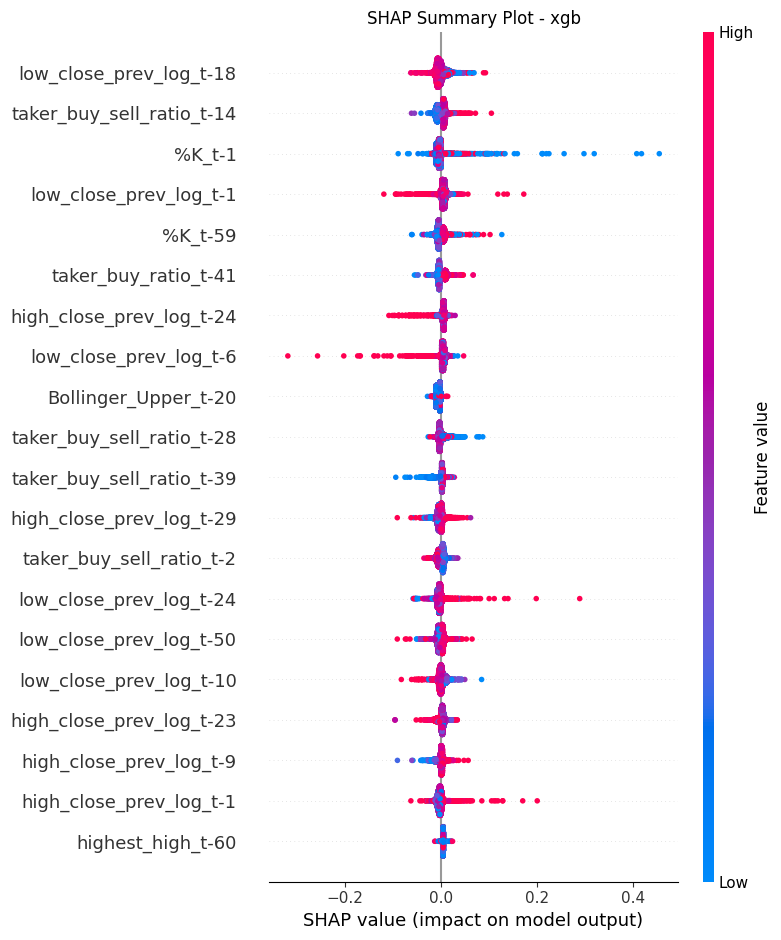

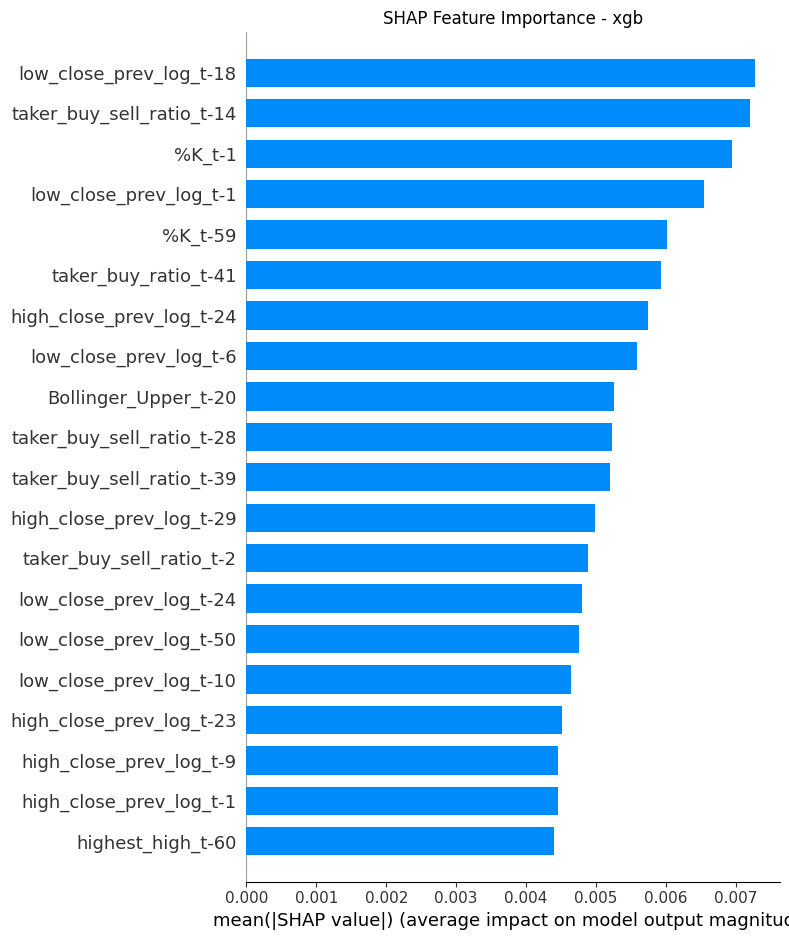

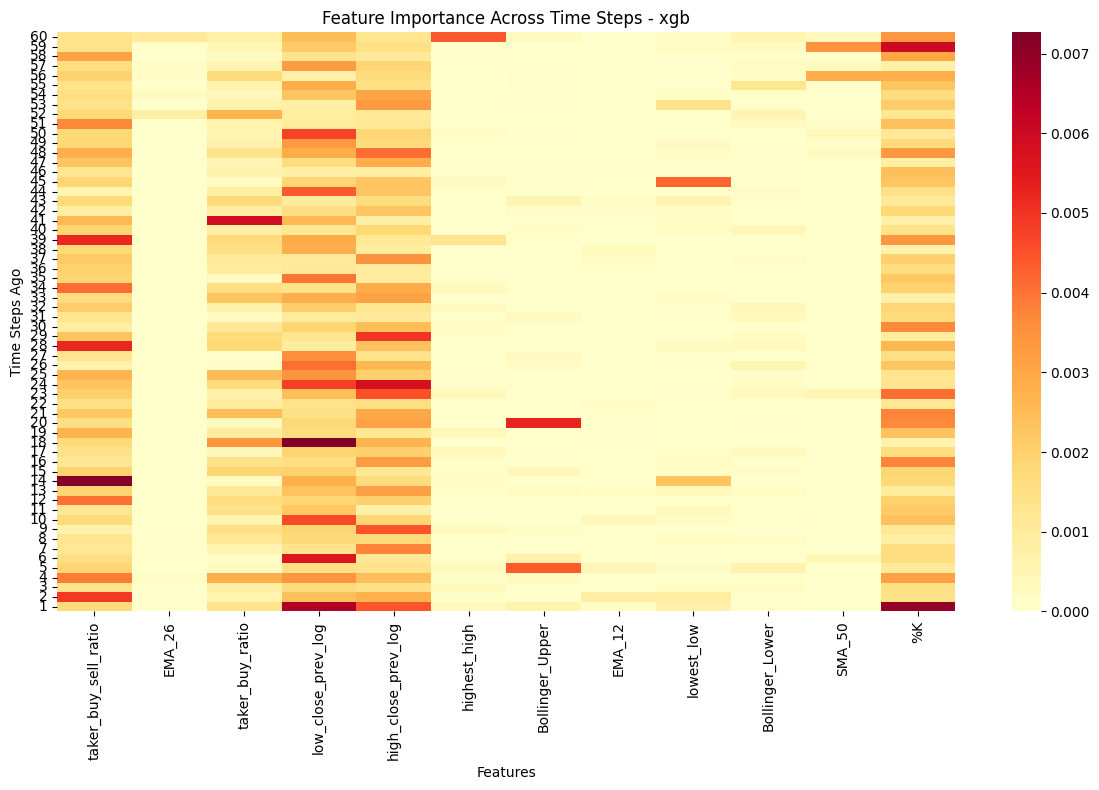

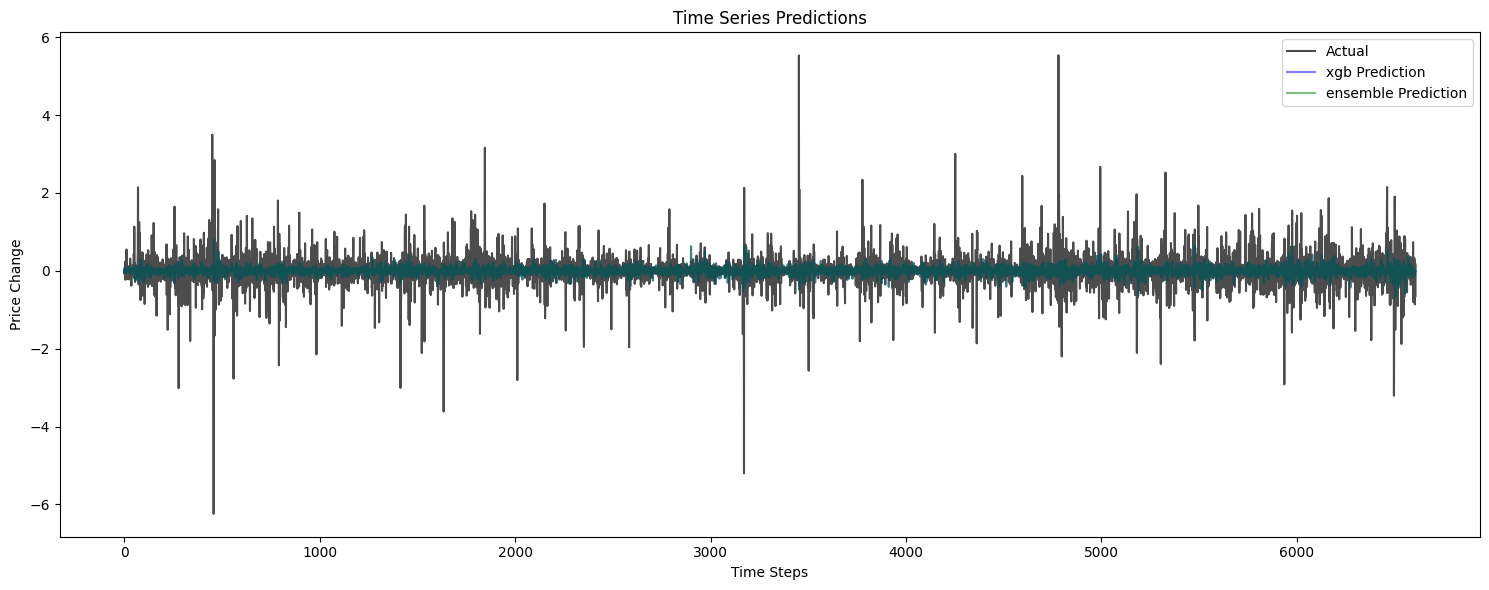


Model Performance:

xgb:
MSE: 0.1846
R2 Score: -0.0575

ensemble:
MSE: 0.1846
R2 Score: -0.0575


In [24]:
# Usage example:
window_size = 60
test_size = 0.2

# First, split the data
split_index = int(len(df_cleaned) * (1 - test_size))
df_train = df_cleaned.iloc[:split_index].copy()
df_test = df_cleaned.iloc[split_index:].copy()

# Initialize analysis
analysis = TimeSeriesAnalysis(window_size=window_size, test_size=test_size)

# Run analysis with optimization
model, predictions, shap_values, y_test = analysis.run_analysis(
    df_train,
    top_features,
    optimize=True,
    n_iter=5,
    cv=2
)


Optimized Model Hyperparameters:
colsample_bytree: 0.749816047538945
gamma: 0.3802857225639665
learning_rate: 0.0831993941811405
max_depth: 7
min_child_weight: 1
n_estimators: 152
subsample: 0.7783331011414365
Best Score (neg_mean_squared_error): -0.546222
----------------------------------------
Buy Threshold: 0.05
Sell Threshold: -0.05
----------------------------------------

Trading Statistics:
Total Return: 334.05%
Sharpe Ratio (Annualized): 1.41
Max Drawdown: -0.72%
Win Rate: 37.85%
Total Number of Trades: 24972
Total Trading Fees: 4.9944
Trading Period (hours): 33099
Trades per Hour: 0.7545
Profit Factor: 1.07


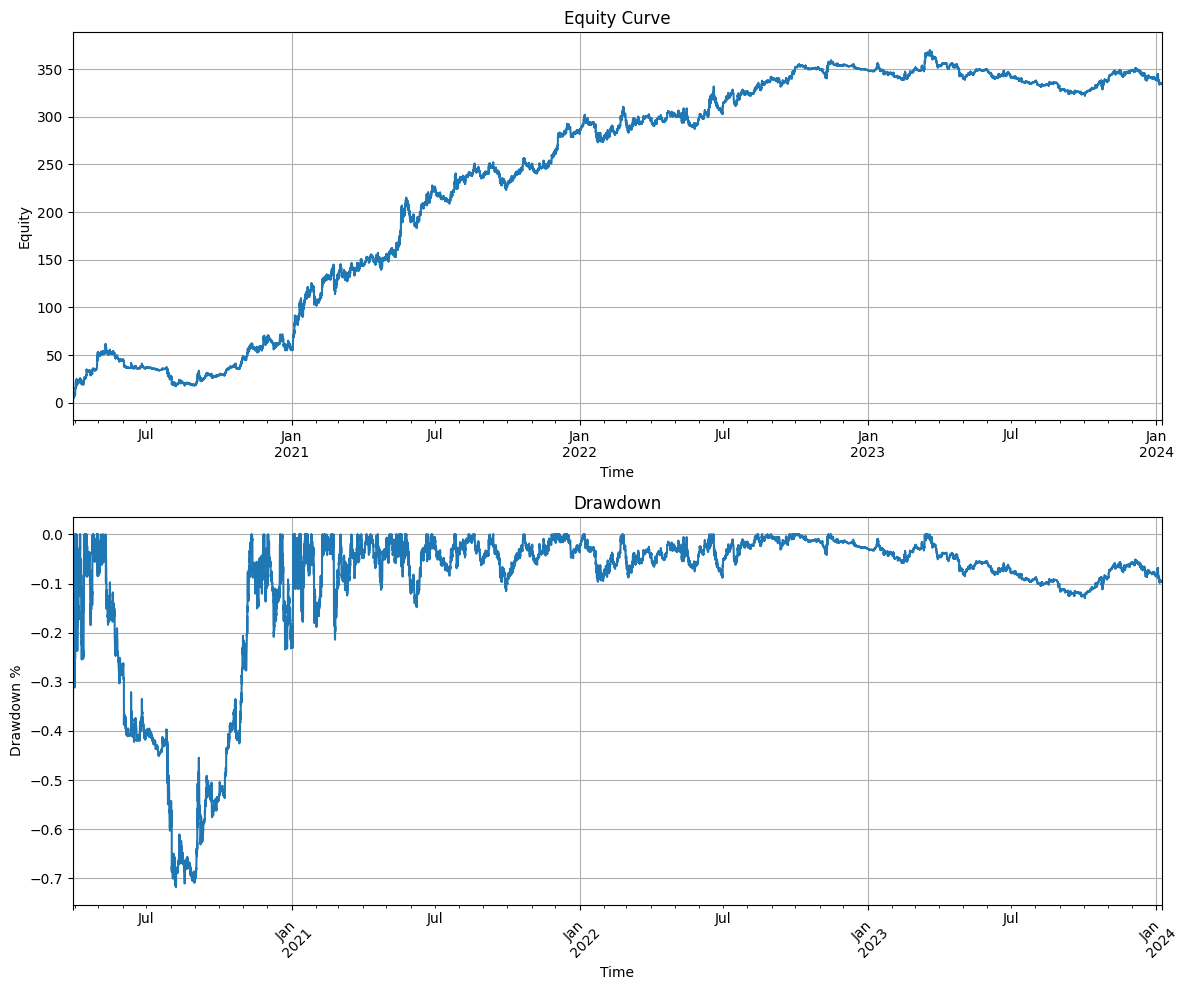

----------------------------------------
Buy Threshold: 0.07
Sell Threshold: -0.07
----------------------------------------

Trading Statistics:
Total Return: 283.13%
Sharpe Ratio (Annualized): 1.40
Max Drawdown: -0.77%
Win Rate: 31.83%
Total Number of Trades: 21228
Total Trading Fees: 4.2456
Trading Period (hours): 33099
Trades per Hour: 0.6413
Profit Factor: 1.07


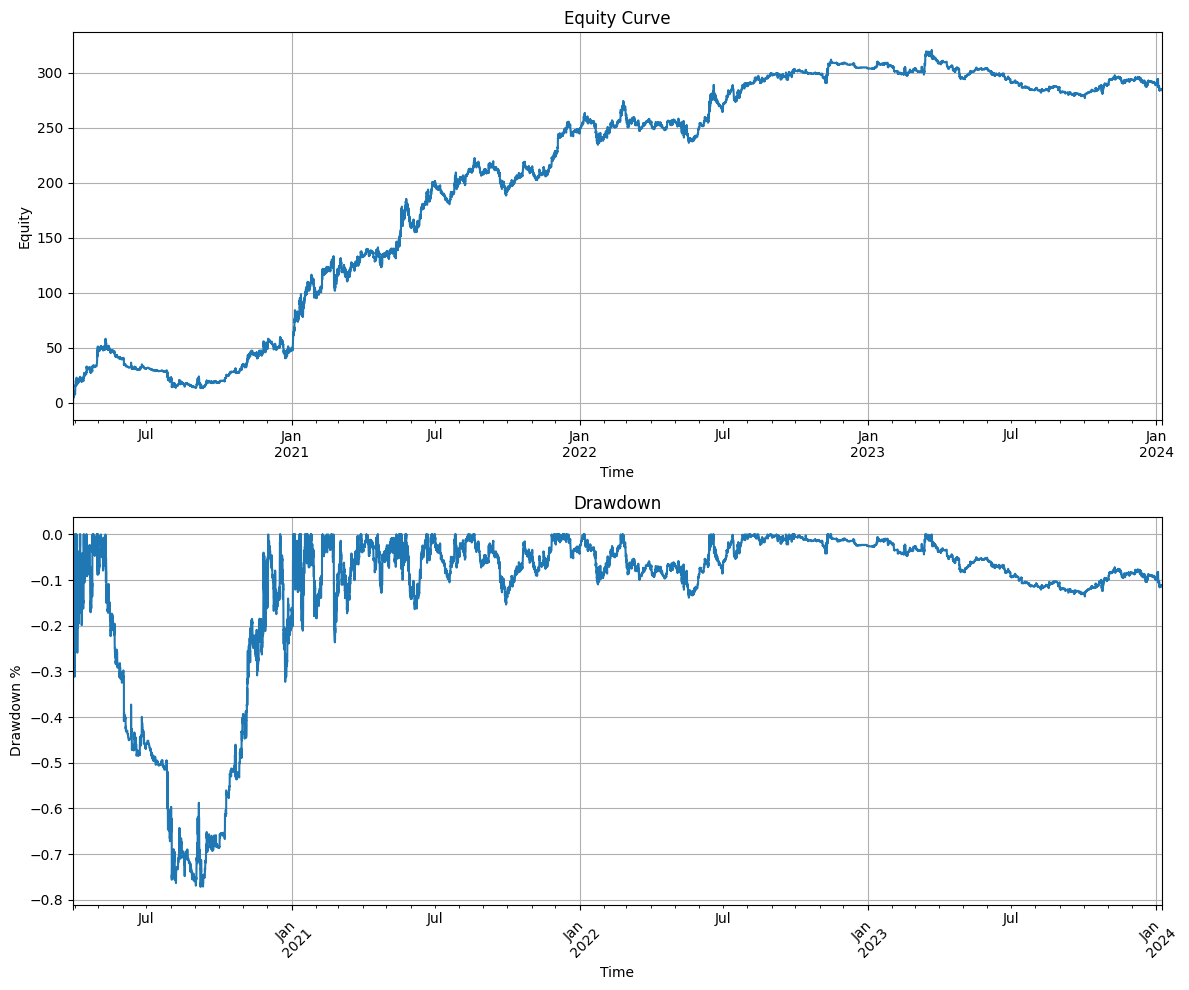

----------------------------------------
Buy Threshold: 0.09000000000000001
Sell Threshold: -0.09000000000000001
----------------------------------------

Trading Statistics:
Total Return: 264.70%
Sharpe Ratio (Annualized): 1.44
Max Drawdown: -0.93%
Win Rate: 27.14%
Total Number of Trades: 18154
Total Trading Fees: 3.6308
Trading Period (hours): 33099
Trades per Hour: 0.5485
Profit Factor: 1.08


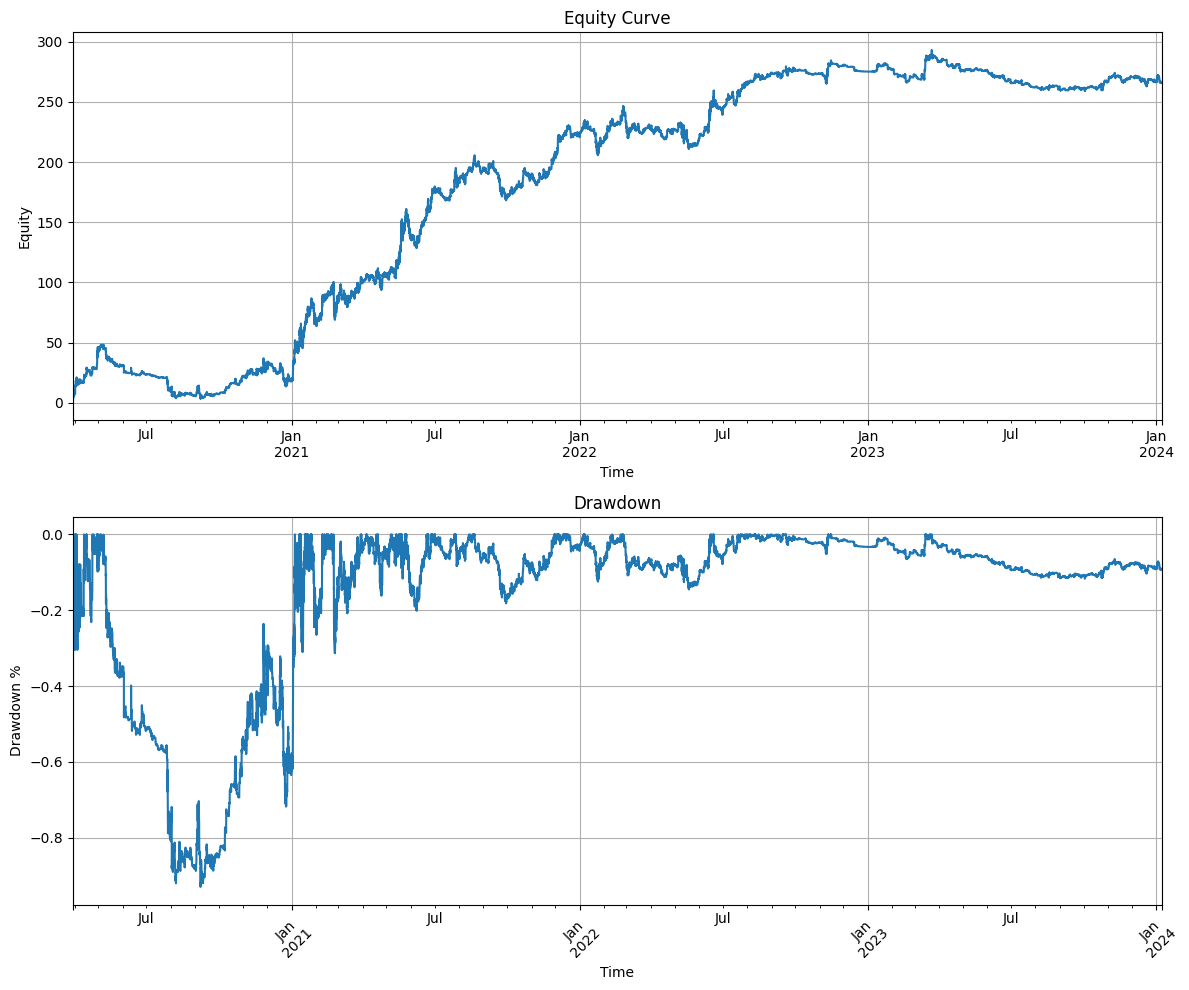

----------------------------------------
Buy Threshold: 0.11000000000000001
Sell Threshold: -0.11000000000000001
----------------------------------------

Trading Statistics:
Total Return: 227.93%
Sharpe Ratio (Annualized): 1.66
Max Drawdown: -0.78%
Win Rate: 23.17%
Total Number of Trades: 15498
Total Trading Fees: 3.0996
Trading Period (hours): 33099
Trades per Hour: 0.4682
Profit Factor: 1.08


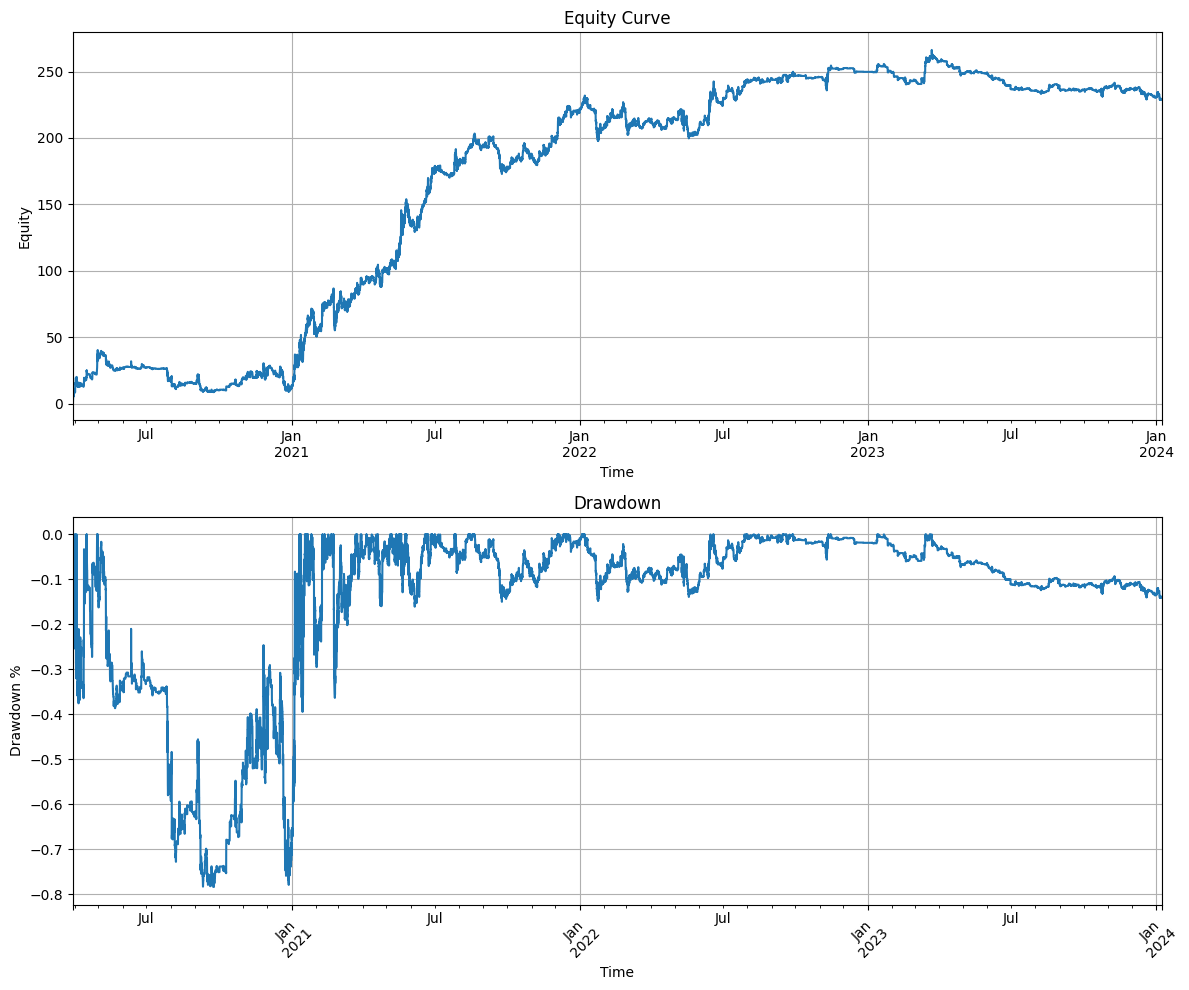

----------------------------------------
Buy Threshold: 0.13
Sell Threshold: -0.13
----------------------------------------

Trading Statistics:
Total Return: 190.93%
Sharpe Ratio (Annualized): 1.62
Max Drawdown: -0.82%
Win Rate: 20.14%
Total Number of Trades: 13418
Total Trading Fees: 2.6836
Trading Period (hours): 33099
Trades per Hour: 0.4054
Profit Factor: 1.07


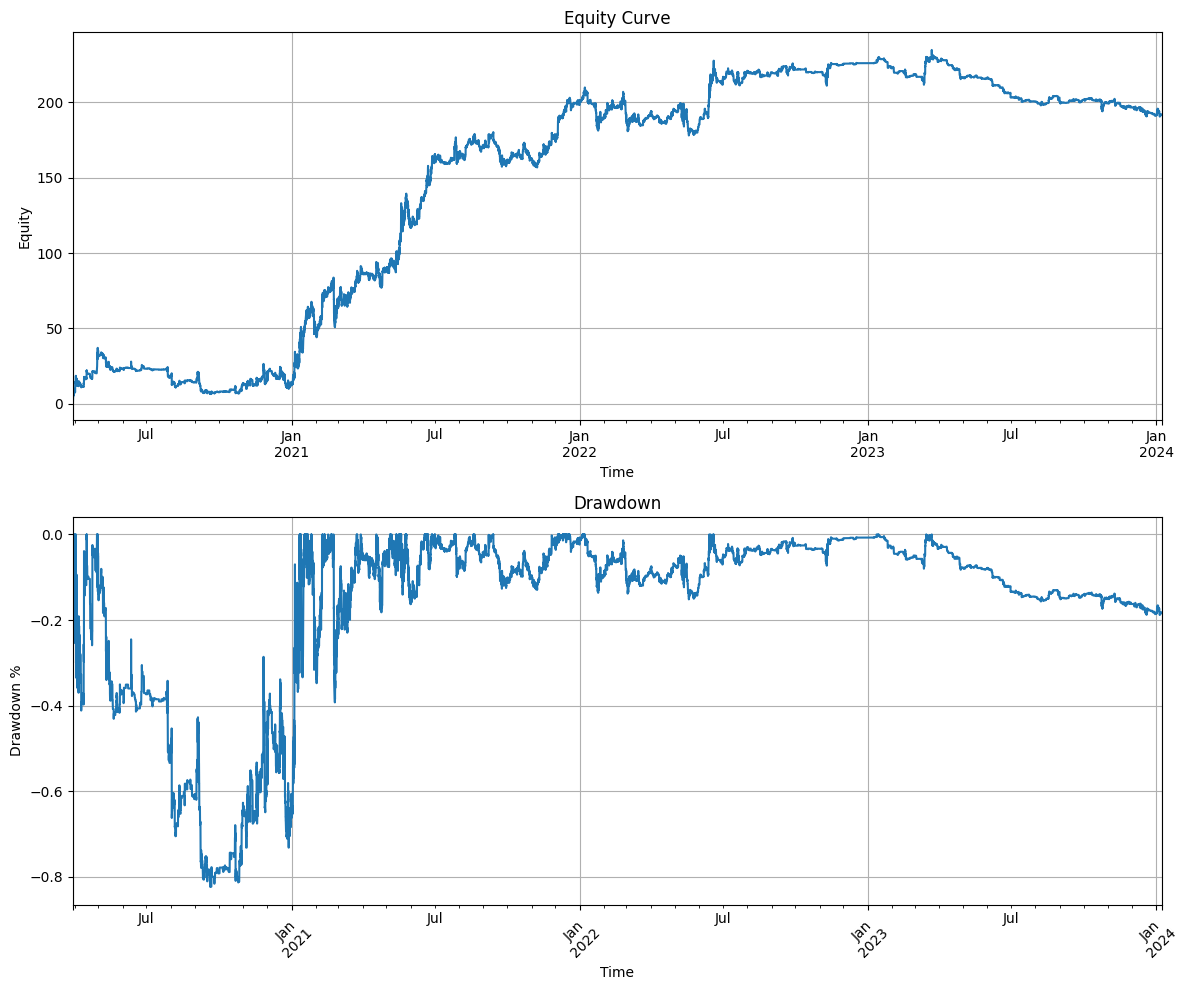

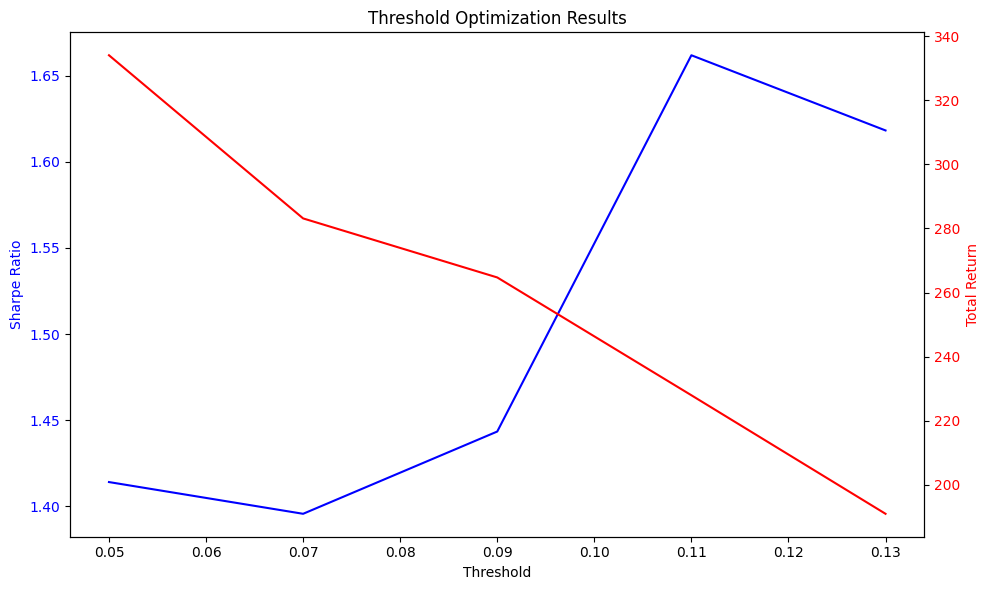


Best thresholds found: Buy = 0.110, Sell = -0.110
Best Sharpe ratio: 1.66
Total Return at best threshold: 22793.15%
Max Drawdown at best threshold: -78.32%


In [28]:
# Print optimized hyperparameters
print("\nOptimized Model Hyperparameters:")
for param, value in analysis.model.best_params.items():
    print(f"{param}: {value}")
print(f"Best Score (neg_mean_squared_error): {analysis.model.best_score:.6f}")

# Optimize thresholds
best_thresholds, threshold_results = analysis.optimize_thresholds(
    df_train,
    threshold_range=np.arange(0.05, 0.15, 0.02)
)


Trading Statistics:
Total Return: 227.93%
Sharpe Ratio (Annualized): 1.66
Max Drawdown: -0.78%
Win Rate: 23.17%
Total Number of Trades: 15498
Total Trading Fees: 3.0996
Trading Period (hours): 33099
Trades per Hour: 0.4682
Profit Factor: 1.08


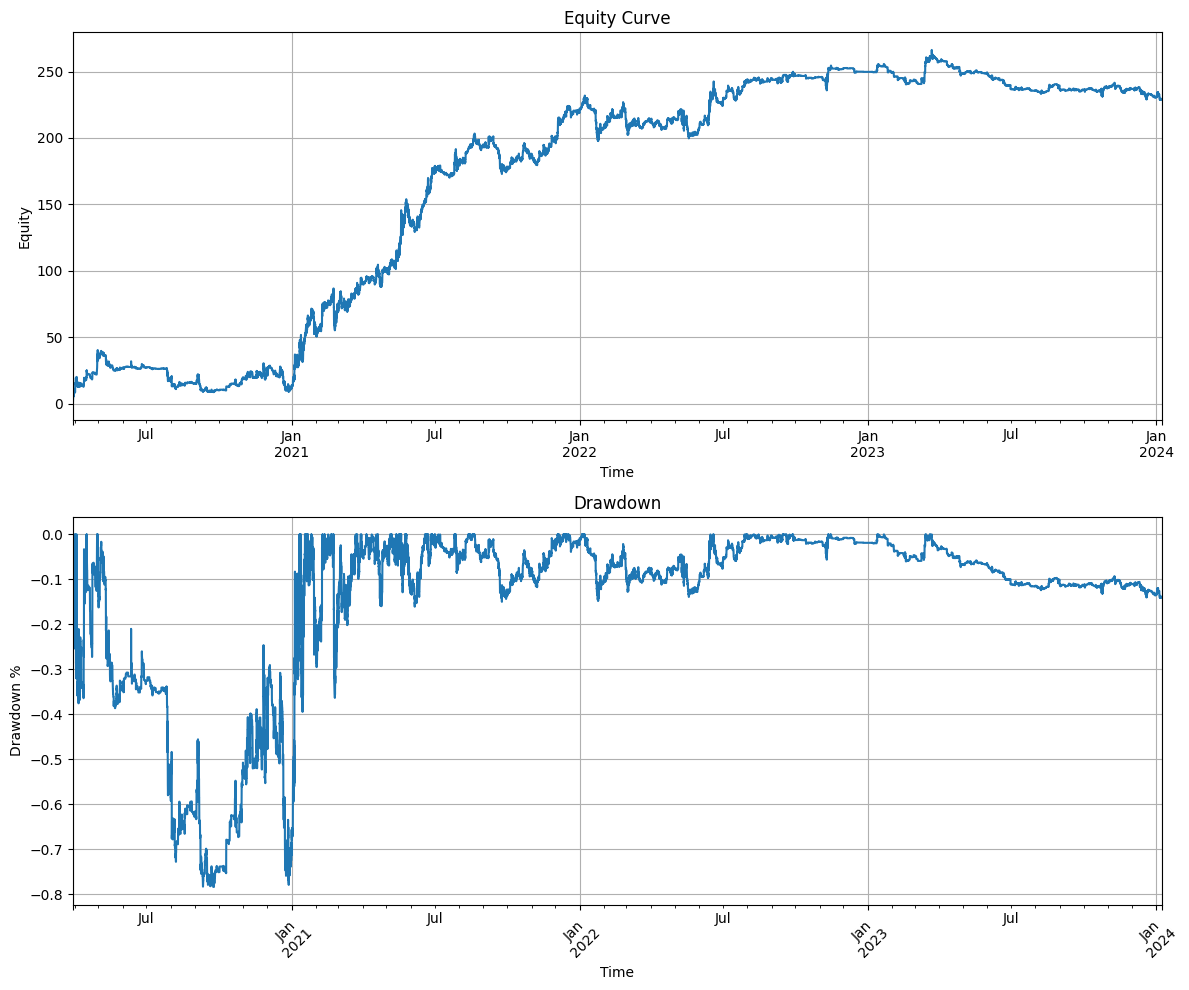

In [39]:
# Calculate trading metrics with optimized thresholds
back_test_results = analysis.calculate_trading_metrics(
    df_train,
    buy_threshold=best_thresholds[0],
    sell_threshold=best_thresholds[1]
)


Trading Statistics:
Total Return: 21.75%
Sharpe Ratio (Annualized): -1.00
Max Drawdown: -2.10%
Win Rate: 37.18%
Total Number of Trades: 5726
Total Trading Fees: 1.1452
Trading Period (hours): 8230
Trades per Hour: 0.6957
Profit Factor: 1.03


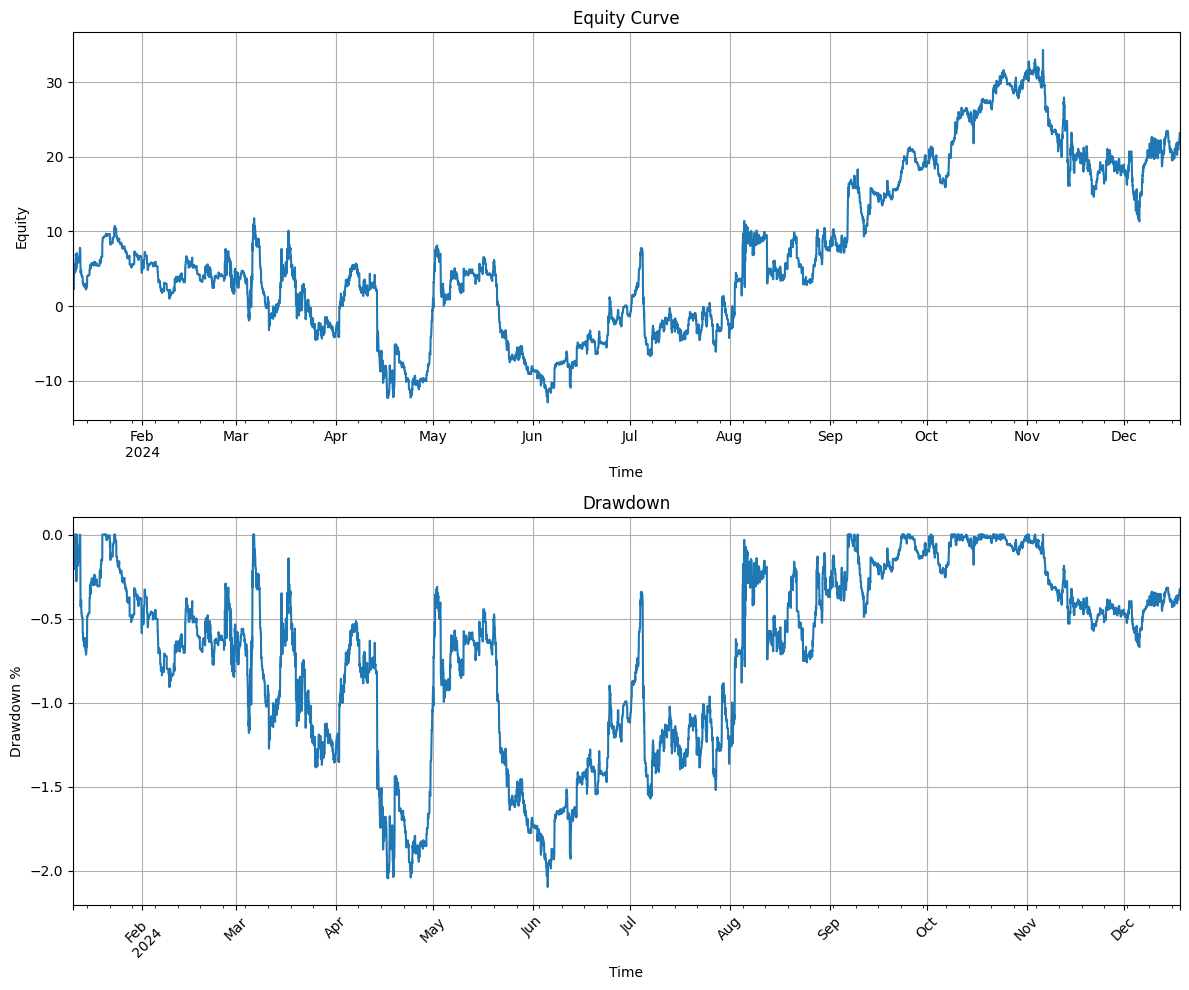

In [40]:
# Calculate trading metrics with optimized thresholds on test data
forward_test_results = analysis.calculate_trading_metrics(
    df_test,
    buy_threshold=best_thresholds[0],
    sell_threshold=best_thresholds[1]
)

In [41]:
forward_test_results.columns

Index(['difficulty', 'estimated_leverage_ratio', 'addresses_count_active',
       'addresses_count_sender', 'addresses_count_receiver', 'taker_buy_ratio',
       'taker_buy_sell_ratio', 'miner_supply_ratio', 'exchange_supply_ratio',
       'open_interest', 'price_change', 'rsi', 'SMA_20', 'SMA_50', 'EMA_20',
       'EMA_50', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line', 'Bollinger_Upper',
       'Bollinger_Lower', 'OBV', 'lowest_low', 'highest_high', '%K', '%D',
       'ROC', 'MFI', 'momentum', 'exchange_whale_ratio_sqrt',
       'coinbase_premium_gap_log', 'coinbase_premium_index_log',
       'coinbase_premium_gap_usdt_adjusted_log',
       'coinbase_premium_index_usdt_adjusted_log', 'taker_buy_volume_log',
       'taker_sell_volume_log', 'blockreward_log', 'blockreward_usd_log',
       'fees_transaction_mean_log', 'fees_transaction_mean_usd_log',
       'fees_transaction_median_log', 'fees_transaction_median_usd_log',
       'addresses_count_inflow_log', 'addresses_count_outflow_log',
 

In [43]:
results_show = forward_test_results[['price_change', 'position', 'trades', 'fees', 'pnl', 'cumulative_equity']]

In [44]:
results_show.head(30)

price_change  position  trades    fees       pnl  \
time                                                                    
2024-01-10 14:00:00     -0.513782       1.0       0  0.0000       NaN   
2024-01-10 15:00:00      1.501871       0.0       1  0.0002  1.501570   
2024-01-10 16:00:00     -0.546750       0.0       0  0.0000 -0.000000   
2024-01-10 17:00:00      2.419632      -1.0       1  0.0002 -0.000484   
2024-01-10 18:00:00      0.293155       0.0       1  0.0002 -0.293213   
2024-01-10 19:00:00     -0.120055      -1.0       1  0.0002  0.000024   
2024-01-10 20:00:00     -0.793443       0.0       1  0.0002  0.793601   
2024-01-10 21:00:00     -0.360880       1.0       1  0.0002  0.000072   
2024-01-10 22:00:00      2.065011      -1.0       2  0.0004  2.064185   
2024-01-10 23:00:00     -0.554348       0.0       1  0.0002  0.554459   
2024-01-11 00:00:00      0.047578       1.0       1  0.0002 -0.000010   
2024-01-11 01:00:00     -0.368450       0.0       1  0.0002 -0.368376   
2024-01-11 02:00:00      0.131799      -1.0       1  0.0002 -0.000026   
2024-01-11 03:00:00     -0.134417       1.0       2  0.0004  0.134471   
2024-01-11 04:00:00     -0.198242       1.0       0  0.0000 -0.198242   
2024-01-11 05:00:00     -0.724956       0.0       1  0.0002 -0.724811   
2024-01-11 06:00:00     -0.386718       0.0       0  0.0000 -0.000000   
2024-01-11 07:00:00      0.460330       1.0       1  0.0002 -0.000092   
2024-01-11 08:00:00      0.375597       1.0       0  0.0000  0.375597   
2024-01-11 09:00:00     -0.135677       1.0       0  0.0000 -0.135677   
2024-01-11 10:00:00      1.420270       0.0       1  0.0002  1.419986   
2024-01-11 11:00:00      0.398890       1.0       1  0.0002 -0.000080   
2024-01-11 12:00:00      0.833066       1.0       0  0.0000  0.833066   
2024-01-11 13:00:00     -0.266123       0.0       1  0.0002 -0.266070   
2024-01-11 14:00:00      2.630940       0.0       0  0.0000  0.000000   
2024-01-11 15:00:00     -3.614584       1.0       1  0.0002  0.000723   
2024-01-11 16:00:00     -1.670358       1.0       0  0.0000 -1.670358   
2024-01-11 17:00:00      1.060378       0.0       1  0.0002  1.060166   
2024-01-11 18:00:00      0.216212       0.0       0  0.0000  0.000000   
2024-01-11 19:00:00      0.184006      -1.0       1  0.0002 -0.000037   

                     cumulative_equity  
time                                    
2024-01-10 14:00:00                NaN  
2024-01-10 15:00:00           2.501570  
2024-01-10 16:00:00           2.501570  
2024-01-10 17:00:00           2.501086  
2024-01-10 18:00:00           2.207873  
2024-01-10 19:00:00           2.207897  
2024-01-10 20:00:00           3.001498  
2024-01-10 21:00:00           3.001570  
2024-01-10 22:00:00           5.065755  
2024-01-10 23:00:00           5.620214  
2024-01-11 00:00:00           5.620205  
2024-01-11 01:00:00           5.251829  
2024-01-11 02:00:00           5.251802  
2024-01-11 03:00:00           5.386273  
2024-01-11 04:00:00           5.188031  
2024-01-11 05:00:00           4.463220  
2024-01-11 06:00:00           4.463220  
2024-01-11 07:00:00           4.463128  
2024-01-11 08:00:00           4.838726  
2024-01-11 09:00:00           4.703049  
2024-01-11 10:00:00           6.123035  
2024-01-11 11:00:00           6.122955  
2024-01-11 12:00:00           6.956021  
2024-01-11 13:00:00           6.689951  
2024-01-11 14:00:00           6.689951  
2024-01-11 15:00:00           6.690674  
2024-01-11 16:00:00           5.020316  
2024-01-11 17:00:00           6.080481  
2024-01-11 18:00:00           6.080481  
2024-01-11 19:00:00           6.080445

In [45]:
results_show.tail(30)

price_change  position  trades    fees       pnl  \
time                                                                    
2024-12-17 06:00:00     -0.270124      -1.0       0  0.0000  0.270124   
2024-12-17 07:00:00      0.264755      -1.0       0  0.0000 -0.264755   
2024-12-17 08:00:00      0.554602       1.0       2  0.0004 -0.554824   
2024-12-17 09:00:00     -0.093367       0.0       1  0.0002 -0.093348   
2024-12-17 10:00:00     -0.083484       1.0       1  0.0002  0.000017   
2024-12-17 11:00:00     -0.391660       0.0       1  0.0002 -0.391581   
2024-12-17 12:00:00      0.297802      -1.0       1  0.0002 -0.000060   
2024-12-17 13:00:00      0.168294       0.0       1  0.0002 -0.168327   
2024-12-17 14:00:00      0.896431      -1.0       1  0.0002 -0.000179   
2024-12-17 15:00:00     -1.682546      -1.0       0  0.0000  1.682546   
2024-12-17 16:00:00      0.586729      -1.0       0  0.0000 -0.586729   
2024-12-17 17:00:00      0.398957       0.0       1  0.0002 -0.399037   
2024-12-17 18:00:00     -0.878924      -1.0       1  0.0002  0.000176   
2024-12-17 19:00:00     -0.062593       0.0       1  0.0002  0.062605   
2024-12-17 20:00:00      0.220292       0.0       0  0.0000  0.000000   
2024-12-17 21:00:00     -0.318375       0.0       0  0.0000 -0.000000   
2024-12-17 22:00:00     -0.431809       0.0       0  0.0000 -0.000000   
2024-12-17 23:00:00      0.145756      -1.0       1  0.0002 -0.000029   
2024-12-18 00:00:00     -0.018759      -1.0       0  0.0000  0.018759   
2024-12-18 01:00:00     -0.735683      -1.0       0  0.0000  0.735683   
2024-12-18 02:00:00     -0.013487       0.0       1  0.0002  0.013490   
2024-12-18 03:00:00     -0.519330       0.0       0  0.0000 -0.000000   
2024-12-18 04:00:00     -0.850525      -1.0       1  0.0002  0.000170   
2024-12-18 05:00:00     -0.297498       1.0       2  0.0004  0.297617   
2024-12-18 06:00:00      0.219080       0.0       1  0.0002  0.219036   
2024-12-18 07:00:00      0.450407      -1.0       1  0.0002 -0.000090   
2024-12-18 08:00:00     -0.419026       0.0       1  0.0002  0.419109   
2024-12-18 09:00:00      0.225281       1.0       1  0.0002 -0.000045   
2024-12-18 10:00:00      0.480988      -1.0       2  0.0004  0.480795   
2024-12-18 11:00:00      0.436395       1.0       2  0.0004 -0.436570   

                     cumulative_equity  
time                                    
2024-12-17 06:00:00          21.716014  
2024-12-17 07:00:00          21.451258  
2024-12-17 08:00:00          20.896435  
2024-12-17 09:00:00          20.803087  
2024-12-17 10:00:00          20.803103  
2024-12-17 11:00:00          20.411522  
2024-12-17 12:00:00          20.411463  
2024-12-17 13:00:00          20.243135  
2024-12-17 14:00:00          20.242956  
2024-12-17 15:00:00          21.925502  
2024-12-17 16:00:00          21.338773  
2024-12-17 17:00:00          20.939736  
2024-12-17 18:00:00          20.939912  
2024-12-17 19:00:00          21.002517  
2024-12-17 20:00:00          21.002517  
2024-12-17 21:00:00          21.002517  
2024-12-17 22:00:00          21.002517  
2024-12-17 23:00:00          21.002488  
2024-12-18 00:00:00          21.021247  
2024-12-18 01:00:00          21.756930  
2024-12-18 02:00:00          21.770420  
2024-12-18 03:00:00          21.770420  
2024-12-18 04:00:00          21.770590  
2024-12-18 05:00:00          22.068206  
2024-12-18 06:00:00          22.287242  
2024-12-18 07:00:00          22.287152  
2024-12-18 08:00:00          22.706262  
2024-12-18 09:00:00          22.706217  
2024-12-18 10:00:00          23.187012  
2024-12-18 11:00:00          22.750442

In [54]:
def plot_trading_results_with_events(results):
    """
    Plot trading results with Bitcoin events annotations

    Parameters:
    results (pd.DataFrame): DataFrame with 'time' index and columns including
                          'cumulative_equity', 'drawdown_pct'
    """
    # Define major Bitcoin events
    bitcoin_events = {
        '2020-03-12': 'Black Thursday Crash',
        '2020-05-11': 'Bitcoin Halving',
        '2020-12-16': 'BTC breaks $20K',
        '2021-01-07': 'BTC breaks $40K',
        '2021-02-08': 'Tesla $1.5B BTC Purchase',
        '2021-04-14': 'Coinbase IPO',
        '2021-05-19': 'China Mining Ban',
        '2021-09-07': 'El Salvador BTC Legal Tender',
        '2021-10-19': 'First Bitcoin ETF',
        '2021-11-10': 'BTC ATH $69K',
        '2022-05-09': 'LUNA/UST Collapse',
        '2022-06-18': 'BTC below $20K',
        '2022-11-11': 'FTX Collapse',
        '2023-01-21': 'BTC Recovery Above $20K',
        '2023-03-10': 'Silicon Valley Bank Collapse',
        '2023-06-10': 'SEC vs Crypto Exchanges',
        '2024-01-10': 'Spot Bitcoin ETF Approval',
        '2024-03-14': 'BTC New ATH $73K',
        '2024-04-19': 'Bitcoin Halving'
    }

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # Plot equity curve
    results['cumulative_equity'].plot(ax=ax1, color='blue', linewidth=1.5)
    ax1.set_title('Equity Curve with Major Bitcoin Events', fontsize=12, pad=20)
    ax1.set_xlabel('')
    ax1.set_ylabel('Equity', fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Plot drawdown
    results['drawdown_pct'].plot(ax=ax2, color='red', linewidth=1.5)
    ax2.set_title('Drawdown with Major Bitcoin Events', fontsize=12, pad=20)
    ax2.set_xlabel('Time', fontsize=10)
    ax2.set_ylabel('Drawdown %', fontsize=10)
    ax2.grid(True, alpha=0.3)

    # Add events to both plots
    for date_str, event in bitcoin_events.items():
        date = pd.to_datetime(date_str)
        if date in results.index:
            # Annotations for equity plot
            equity_value = results['cumulative_equity'][date]
            ax1.axvline(x=date, color='gray', linestyle='--', alpha=0.3)
            ax1.annotate(event,
                        xy=(date, equity_value),
                        xytext=(10, 10),
                        textcoords='offset points',
                        rotation=90,
                        fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

            # Annotations for drawdown plot
            drawdown_value = results['drawdown_pct'][date]
            ax2.axvline(x=date, color='gray', linestyle='--', alpha=0.3)
            ax2.annotate(event,
                        xy=(date, drawdown_value),
                        xytext=(10, 10),
                        textcoords='offset points',
                        rotation=90,
                        fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    # Rotate x-axis labels
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)

    # Adjust layout to prevent label overlap
    plt.tight_layout()
    plt.show()

    # Print summary of events that occurred during the trading period
    print("\nMajor Bitcoin Events during trading period:")
    trading_period_events = [
        (date, event) for date, event in bitcoin_events.items()
        if pd.to_datetime(date) in results.index
    ]
    for date, event in trading_period_events:
        print(f"{date}: {event}")

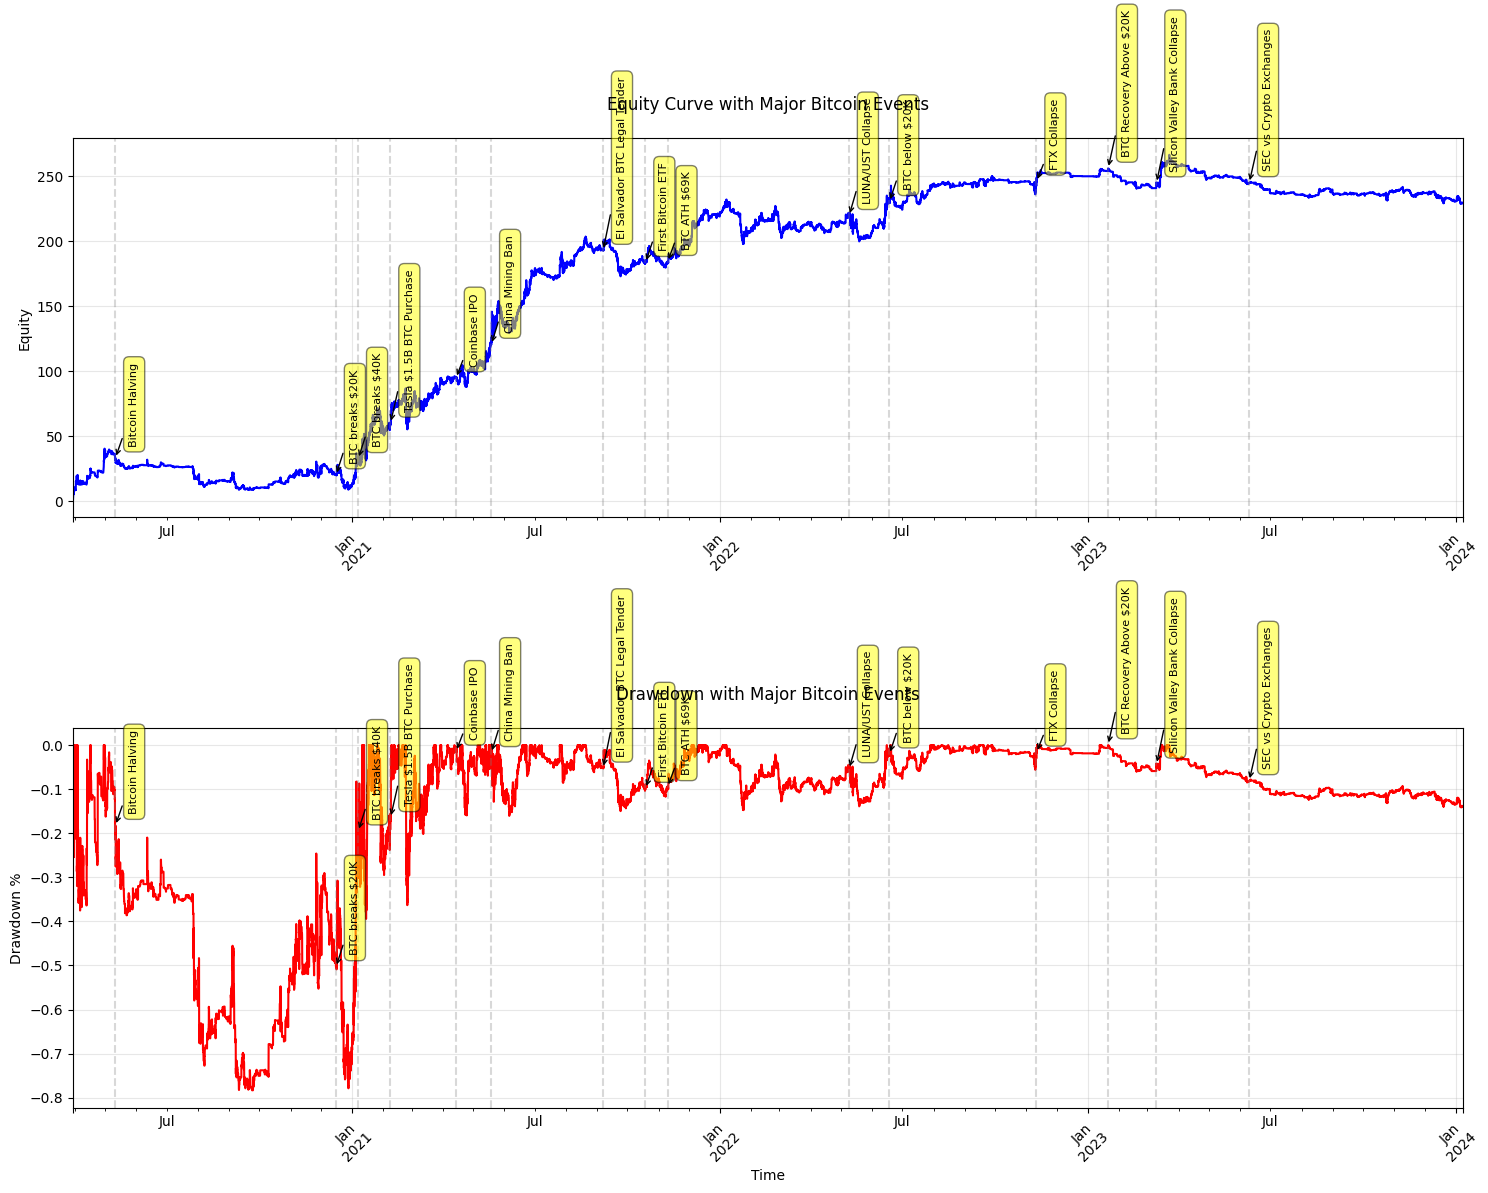


Major Bitcoin Events during trading period:
2020-05-11: Bitcoin Halving
2020-12-16: BTC breaks $20K
2021-01-07: BTC breaks $40K
2021-02-08: Tesla $1.5B BTC Purchase
2021-04-14: Coinbase IPO
2021-05-19: China Mining Ban
2021-09-07: El Salvador BTC Legal Tender
2021-10-19: First Bitcoin ETF
2021-11-10: BTC ATH $69K
2022-05-09: LUNA/UST Collapse
2022-06-18: BTC below $20K
2022-11-11: FTX Collapse
2023-01-21: BTC Recovery Above $20K
2023-03-10: Silicon Valley Bank Collapse
2023-06-10: SEC vs Crypto Exchanges


In [55]:
plot_trading_results_with_events(back_test_results)

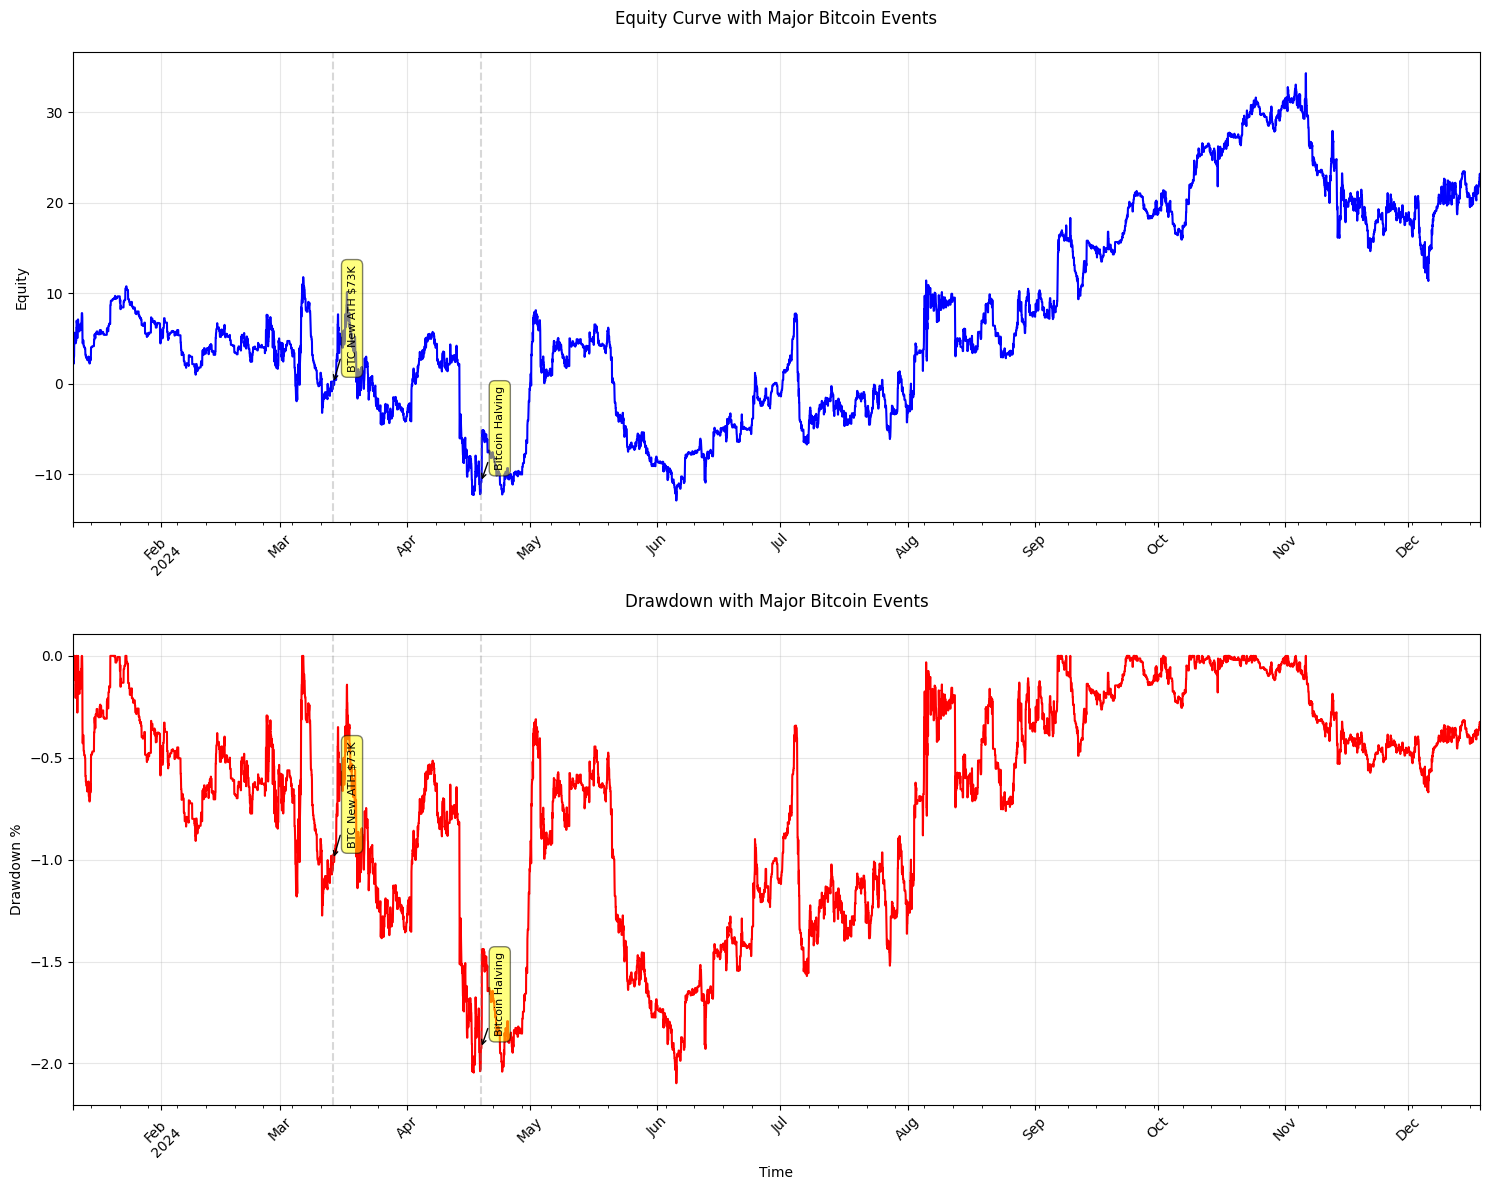


Major Bitcoin Events during trading period:
2024-03-14: BTC New ATH $73K
2024-04-19: Bitcoin Halving


In [56]:
plot_trading_results_with_events(forward_test_results)